<a href="https://colab.research.google.com/github/ibe-abu-chi/python_EDA/blob/master/ARTProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
#importing all libraries and data needed for this analysis
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import datetime
df = pd.read_excel('Adolescent_Peads_DTG.xlsx')

In [26]:
df.shape

(6215, 19)

In [58]:
# Delete multiple columns from the dataframe
df1 = df.drop(['LGA', 'Datim_Code', 'FacilityName', 'PepID', 'CurrentARTStatuse', 'CurAge_Months',
                'VL_30Jun2019', 'VL_31Dec2019', 'VL_30Jun2020','VL_31Dec2020' ], axis=1)

In [63]:
#creating a dataframe for the unsuppressed as at june 2021
df2 = df1.loc[df1['VL_30Jun2021'] >= 1000] 

In [64]:
#creating a new data column for suppression after 6 months
df2['FIRST_STATUS'] = np.where(df2['VL_31Dec2021'] >= 1000, "UNSUPPRESSED", "SUPPRESSED")

#creating a new data column for suppression after 12 months
df2['SECOND_STATUS'] = np.where(df2['VL_30Jun2022'] >= 1000, "UNSUPPRESSED", "SUPPRESSED")

#extracting the quaters from ART start date
df2['QStart'] = df2['ARTStartDate'].dt.to_period('Q')

#extracting the quaters from TLD start date
df2['QTLD'] = df2['DateofFirstTLD_Pickup'].dt.to_period('Q')

#dividing ages into under 9 and over 9 years respectively
df2["AgeGroup"] = np.where(df2['CurAge_Years'] <10, "UNDER 9","OVER 9")

#Extracting difference in the commencement of TLD to Initial ART Start
df2['DateDiff'] = df2['DateofFirstTLD_Pickup'] - df2['ARTStartDate']

#Creating a dummy variable for first vl status
df2['FSR'] = np.where(df2['FIRST_STATUS'] == "UNSUPPRESSED", 1, 0) 

#Creating a dummy variable for second vl status
df2['SSR'] = np.where(df2['FIRST_STATUS'] == "UNSUPPRESSED", 1, 0) 

#Creating a dummy variable for sex status
df2['SEXR'] = np.where(df2['Sex'] == "M", 1, 0) 

#Creating a dummy variable for Age Group
df2['AGR'] = np.where(df2['AgeGroup'] == "OVER 9", 1, 0) 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [85]:
df3 = df2[['SEXR', 'AGR', 'CurAge_Years', 'FSR']]

In [84]:
df4 = df2[['SEXR', 'AGR', 'CurAge_Years', 'SSR']]

In [86]:
#statistical summary of age
df2['CurAge_Years'].describe() 

count    904.000000
mean      10.556416
std        4.064421
min        2.000000
25%        8.000000
50%       10.000000
75%       13.000000
max       19.000000
Name: CurAge_Years, dtype: float64

In [89]:
#replacing missing values with mean of distribution
df2['VL_30Jun2022'].fillna(df2['VL_30Jun2022'].mean(), inplace=True)

df2['VL_30Jun2021'].fillna(df2['VL_30Jun2021'].mean(), inplace=True)

df2['VL_31Dec2021'].fillna(df2['VL_31Dec2021'].mean(), inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


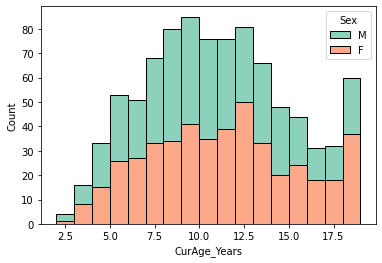

In [42]:
sns.histplot(data=df2, x="CurAge_Years", hue="Sex", multiple="stack", palette='Set2' )


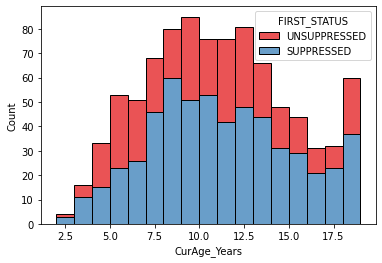

In [44]:
sns.histplot(data=df2, x="CurAge_Years", hue="FIRST_STATUS", multiple="stack", palette='Set1')


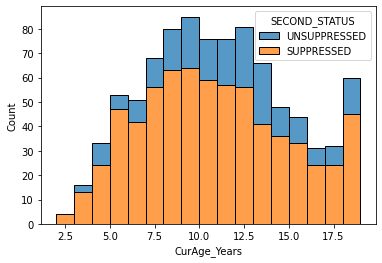

In [48]:
sns.histplot(data=df2, x="CurAge_Years", hue="SECOND_STATUS", multiple="stack")


In [ ]:
#variance of age
df2['CurAge_Years'].var()

16.51951582238164

In [ ]:
#standard error mean of age
df2['CurAge_Years'].sem()

0.1351806224592684

In [ ]:
#kurtosis of age
df2['CurAge_Years'].kurtosis()

-0.7002612348995836

In [ ]:
#skewness of age
df2['CurAge_Years'].skew()

0.21034513369147728

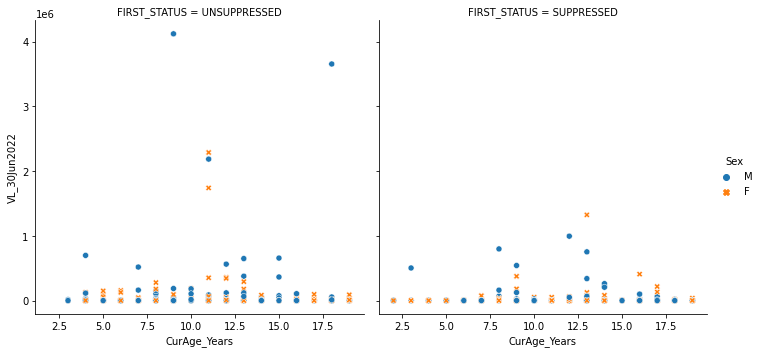

In [49]:

sns.relplot(x='CurAge_Years', y='VL_30Jun2022', col="FIRST_STATUS", hue="Sex", style="Sex",
    kind="scatter", data = df2)

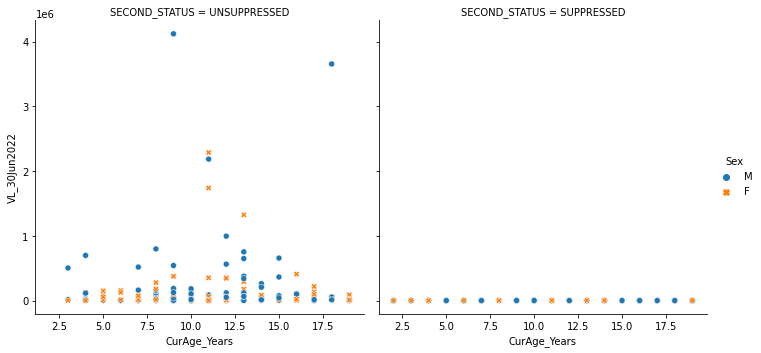

In [50]:
sns.relplot(x='CurAge_Years', y='VL_30Jun2022', col="SECOND_STATUS", style="Sex", hue="Sex",
    kind="scatter", data = df2)

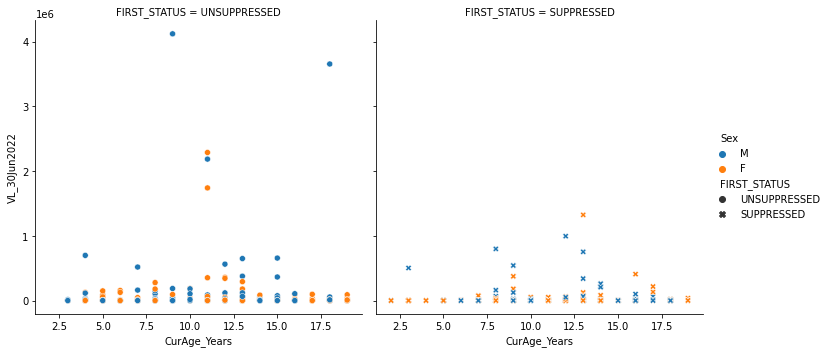

In [51]:
sns.relplot(x='CurAge_Years', y='VL_30Jun2022', col="FIRST_STATUS", style="FIRST_STATUS", hue="Sex",
    kind="scatter", data = df2)

Text(0.5, 1.0, 'SUPPRESSION BASED ON PCK-UP QUATER AFTER FIRST VL')

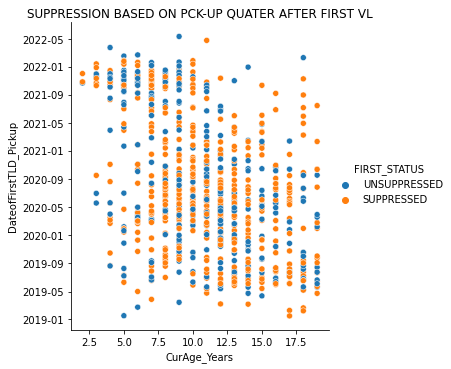

In [44]:
sns.relplot(y=df2.DateofFirstTLD_Pickup, x=df2.CurAge_Years, hue=df2.FIRST_STATUS)
plt.title("SUPPRESSION BASED ON PCK-UP QUATER AFTER FIRST VL")

Text(0.5, 1.0, 'SUPPRESSION BASED ON PCK-UP QUATER AFTER SECOND VL')

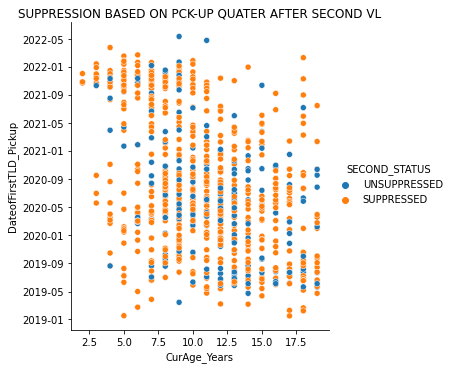

In [139]:
sns.relplot(y=df2.DateofFirstTLD_Pickup, x=df2.CurAge_Years, hue=df2.SECOND_STATUS)
plt.title("SUPPRESSION BASED ON PCK-UP QUATER AFTER SECOND VL")

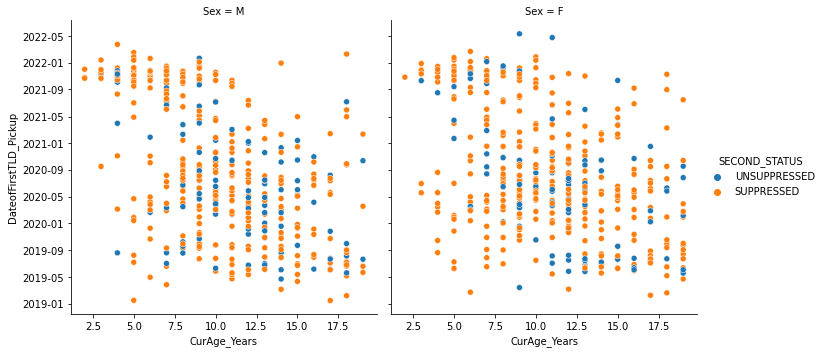

In [52]:
sns.relplot(data=df2, x="CurAge_Years", y="DateofFirstTLD_Pickup", hue="SECOND_STATUS", col="Sex")


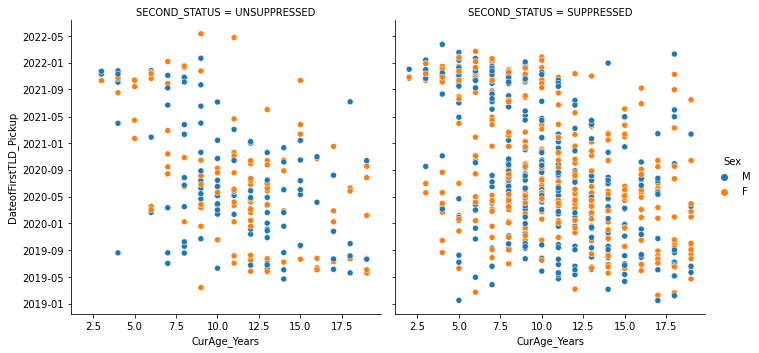

In [48]:
sns.relplot(data=df2, x="CurAge_Years", y="DateofFirstTLD_Pickup", hue="Sex", col="SECOND_STATUS")


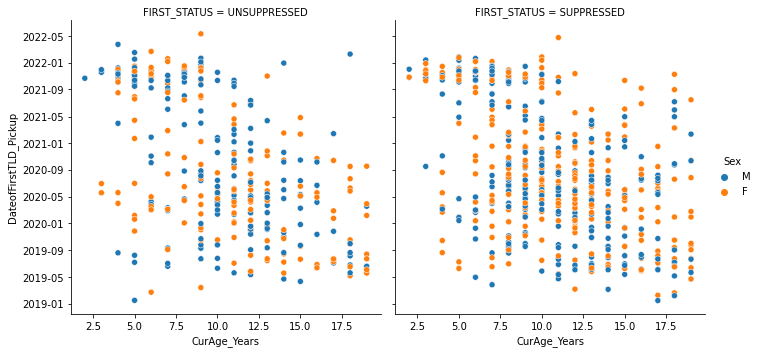

In [50]:
sns.relplot(data=df2, x="CurAge_Years", y="DateofFirstTLD_Pickup", hue="Sex", col="FIRST_STATUS")


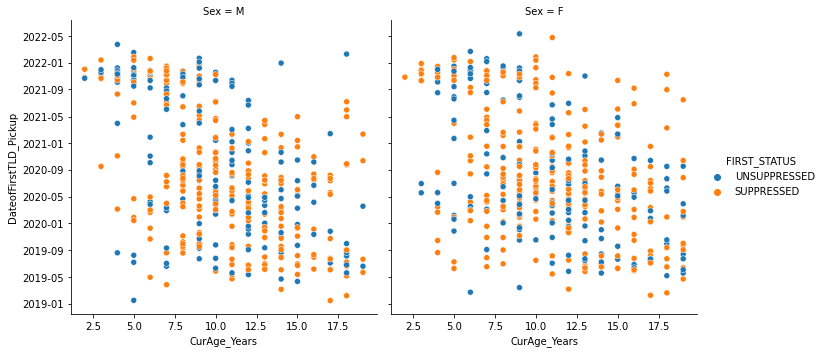

In [51]:
sns.relplot(data=df2, x="CurAge_Years", y="DateofFirstTLD_Pickup", hue="FIRST_STATUS", col="Sex")


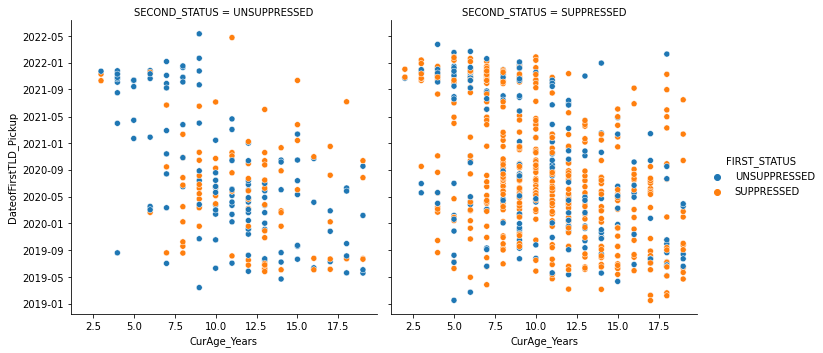

In [52]:
sns.relplot(data=df2, x="CurAge_Years", y="DateofFirstTLD_Pickup", hue="FIRST_STATUS", col="SECOND_STATUS")


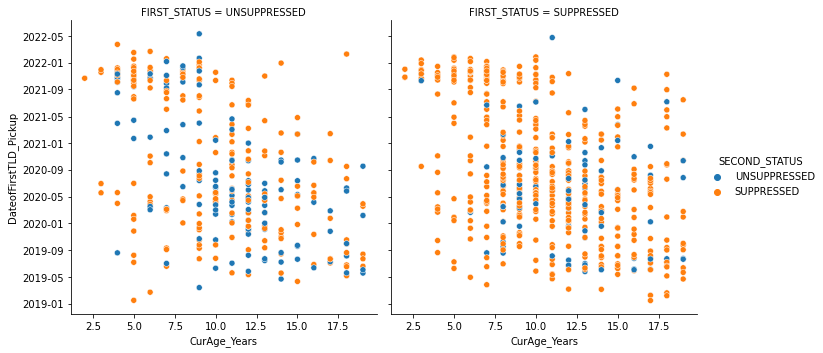

In [53]:
sns.relplot(data=df2, x="CurAge_Years", y="DateofFirstTLD_Pickup", col="FIRST_STATUS", hue="SECOND_STATUS")


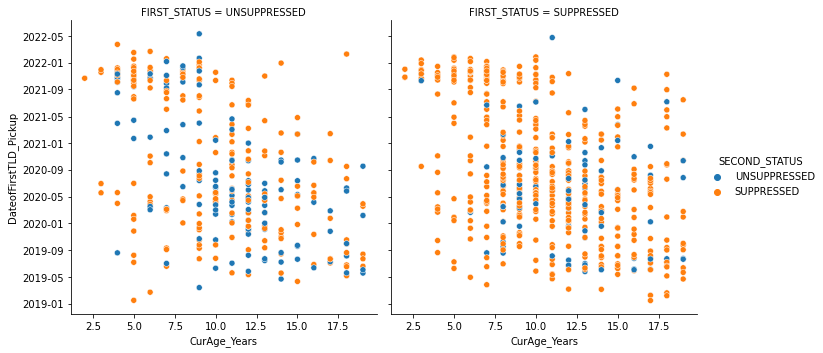

In [111]:
sns.relplot(data=df2, x="CurAge_Years", y="DateofFirstTLD_Pickup", hue="SECOND_STATUS", col="FIRST_STATUS")


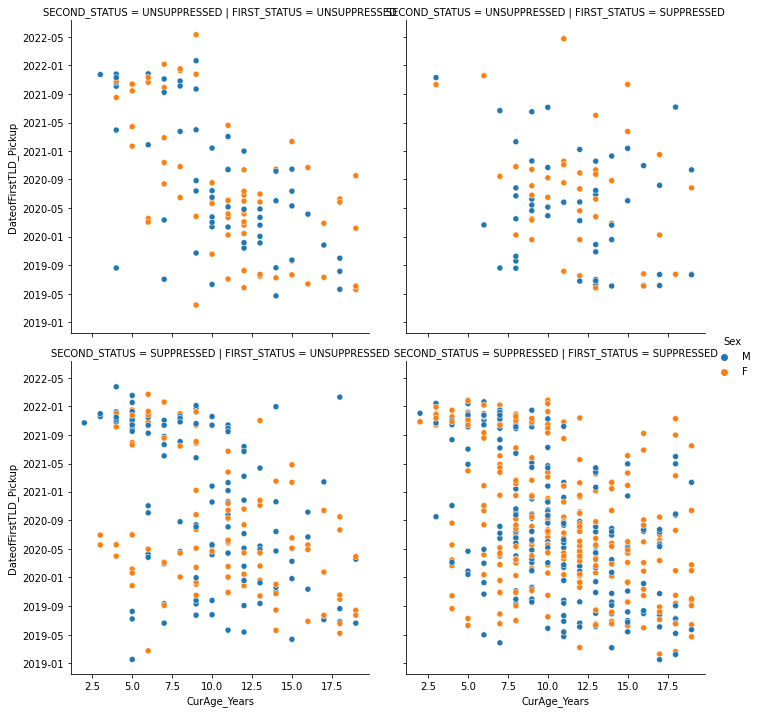

In [54]:
sns.relplot(data=df2, x="CurAge_Years", y="DateofFirstTLD_Pickup", hue='Sex', col="FIRST_STATUS", row="SECOND_STATUS")


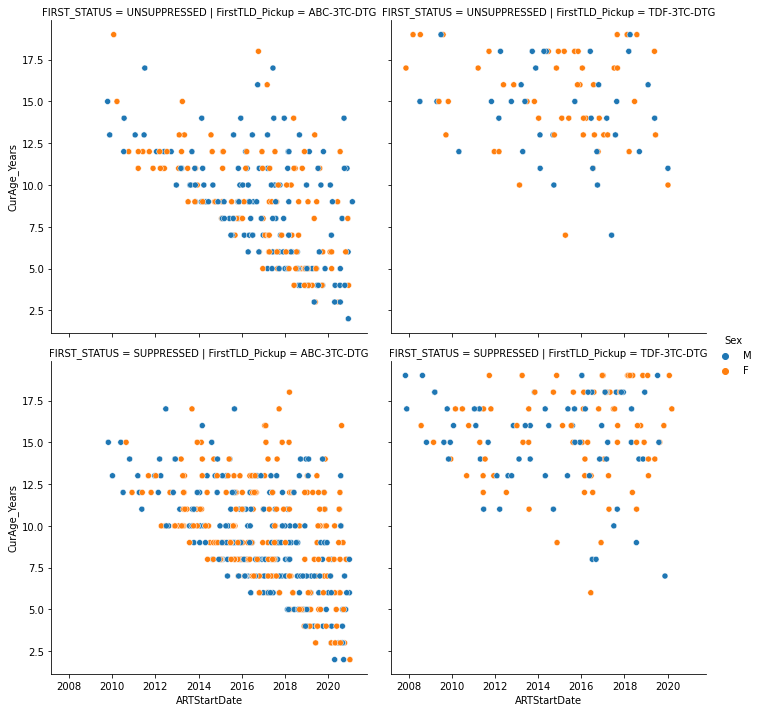

In [73]:
sns.relplot(data=df2, y="CurAge_Years", x="ARTStartDate", hue='Sex', col="FirstTLD_Pickup", row="FIRST_STATUS")


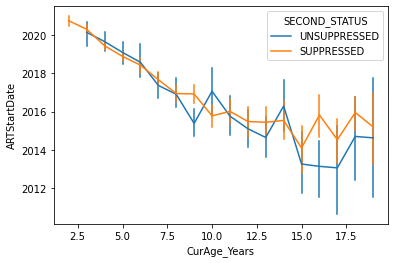

In [76]:
sns.lineplot(data=df2, x="CurAge_Years", y="ARTStartDate", hue='SECOND_STATUS', err_style="bars")

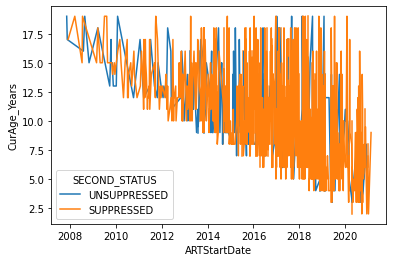

In [77]:
sns.lineplot(data=df2, y="CurAge_Years", x="ARTStartDate", hue='SECOND_STATUS', err_style="bars")

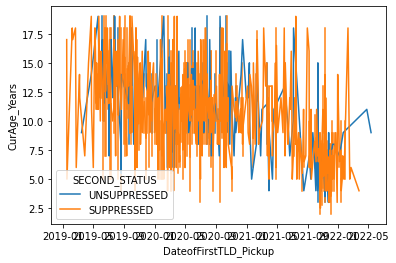

In [142]:
sns.lineplot(data=df2, y="CurAge_Years", x="DateofFirstTLD_Pickup", hue='SECOND_STATUS', err_style="bars")

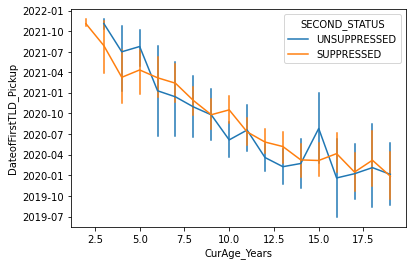

In [143]:
sns.lineplot(data=df2, x="CurAge_Years", y="DateofFirstTLD_Pickup", hue='SECOND_STATUS', err_style="bars")

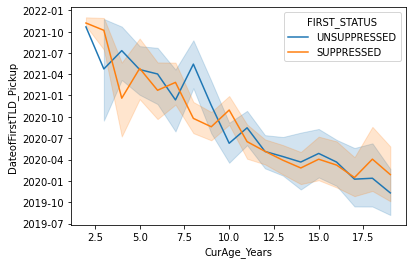

In [151]:
sns.lineplot(data=df2, x="CurAge_Years", y="DateofFirstTLD_Pickup", hue='FIRST_STATUS')

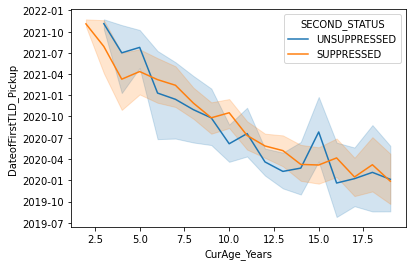

In [150]:
sns.lineplot(data=df2, x="CurAge_Years", y="DateofFirstTLD_Pickup", hue='SECOND_STATUS')

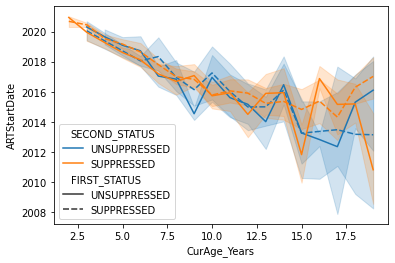

In [85]:
sns.lineplot(data=df2, x="CurAge_Years", y="ARTStartDate", hue='SECOND_STATUS', style="FIRST_STATUS")

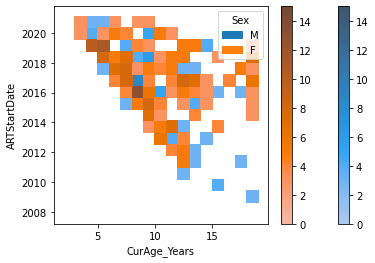

In [90]:
sns.histplot(data=df2, x="CurAge_Years",y="ARTStartDate", hue='Sex', log_scale=False, 
             cbar=True, fill=False, pthresh=.05, pmax=.9)


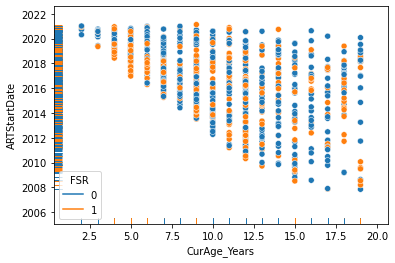

In [92]:
sns.scatterplot(data=df2, x="CurAge_Years", y="ARTStartDate", hue='SSR')
sns.rugplot(data=df2, x="CurAge_Years", y="ARTStartDate", hue='FSR')


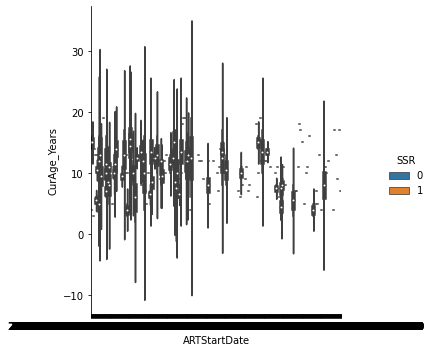

In [96]:
sns.catplot(data=df2, y="CurAge_Years", x="ARTStartDate", hue='SSR', kind="violin")

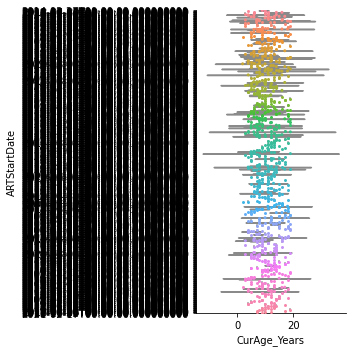

In [98]:
sns.catplot(data=df2, x="CurAge_Years", y="ARTStartDate", kind="violin", color=".9", inner=None)
sns.swarmplot(data=df2, x="CurAge_Years", y="ARTStartDate", size=3)


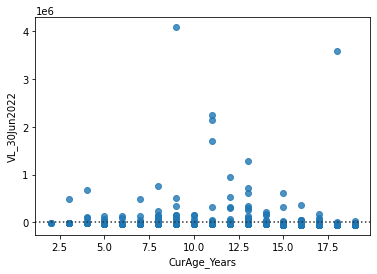

In [101]:
sns.residplot(data=df2, x="CurAge_Years", y="VL_30Jun2022")

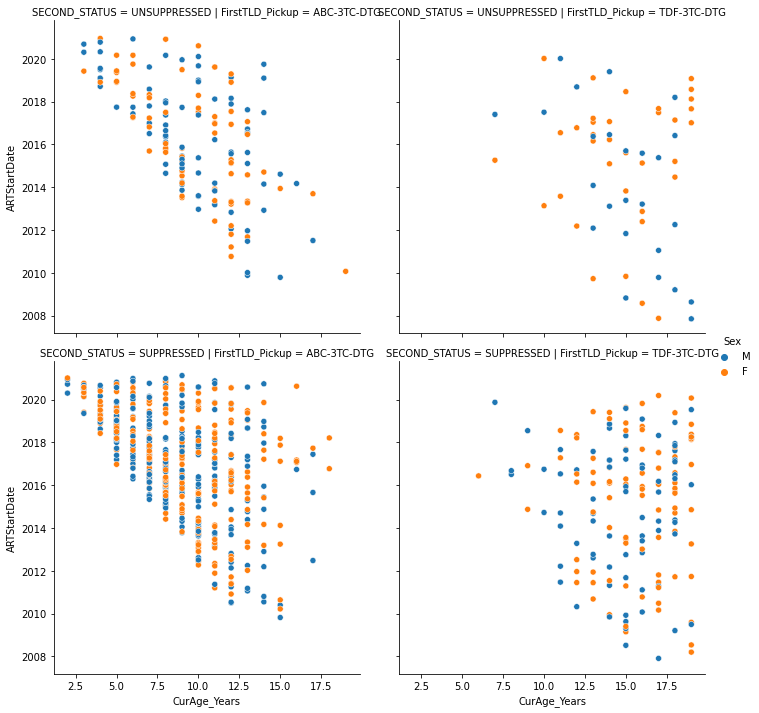

In [71]:
sns.relplot(data=df2, x="CurAge_Years", y="ARTStartDate", hue='Sex', col="FirstTLD_Pickup", row="SECOND_STATUS")



In [70]:
df2.columns

Index(['Sex', 'ARTStartDate', 'RegimenAtARTStart', 'FirstTLD_Pickup',
       'DateofFirstTLD_Pickup', 'CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022', 'FIRST_STATUS', 'SECOND_STATUS', 'QStart', 'QTLD',
       'AgeGroup', 'DateDiff', 'FSR', 'SSR', 'SEXR', 'AGR'],
      dtype='object')

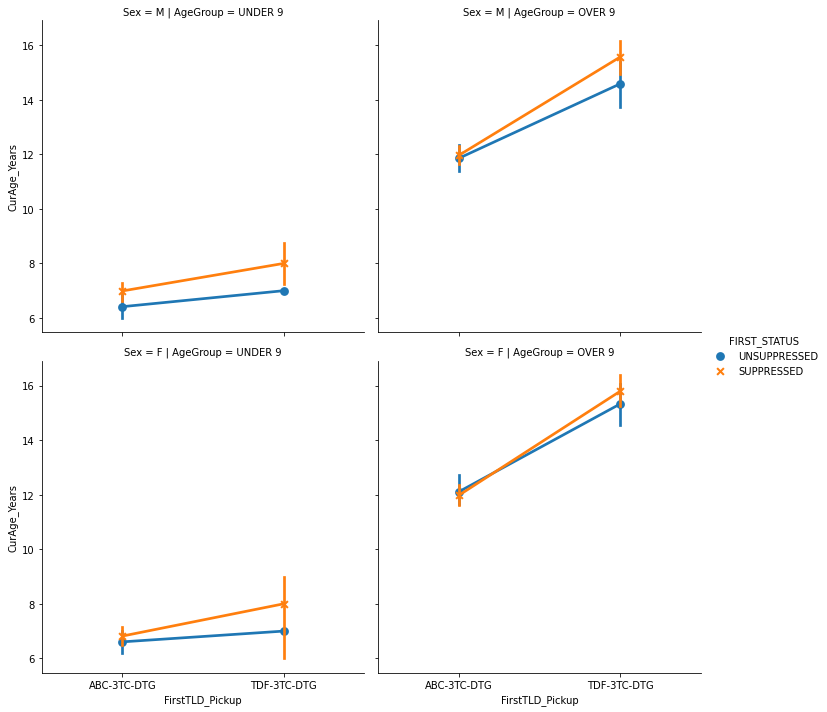

In [34]:
sns.catplot(data = df2, x='FirstTLD_Pickup', y='CurAge_Years', hue = 'FIRST_STATUS',
            kind = 'point', row="Sex", col="AgeGroup", markers=["o", "x"])

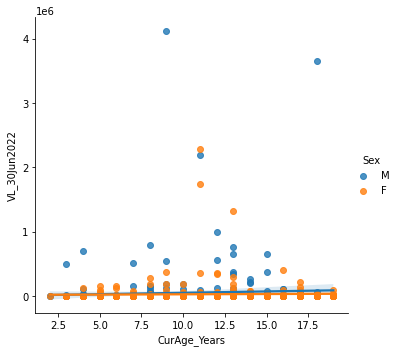

In [ ]:
sns.lmplot(data = df2, x='CurAge_Years', y='VL_30Jun2022', hue = 'Sex')

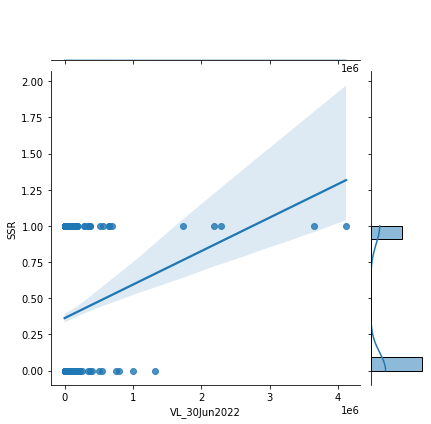

In [ ]:
sns.jointplot(data = df2, y='SSR', x='VL_30Jun2022', kind="reg")

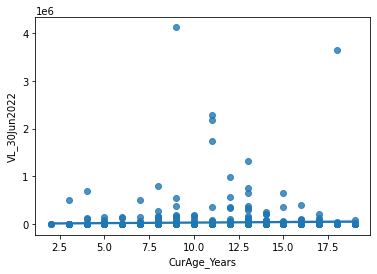

In [ ]:
sns.regplot(data = df2, x =  'CurAge_Years', y = 'VL_30Jun2022')

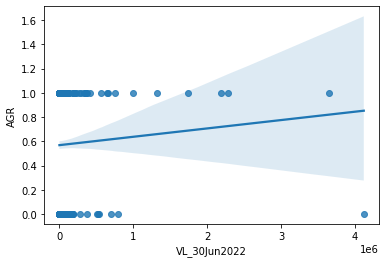

In [ ]:
sns.regplot(data = df2, y =  'AGR', x = 'VL_30Jun2022')

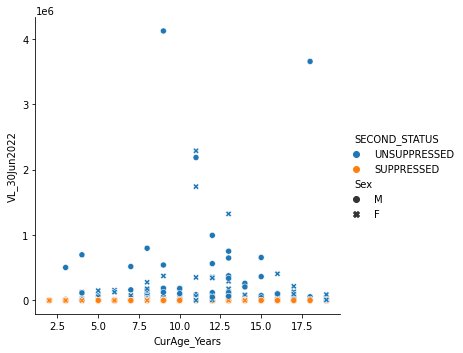

In [ ]:
sns.relplot(
    data=df2,
    y="VL_30Jun2022", x="CurAge_Years", hue="SECOND_STATUS", style="Sex",
)

In [ ]:
df2.head()

Sex ARTStartDate RegimenAtARTStart FirstTLD_Pickup DateofFirstTLD_Pickup  \
4    M   2014-03-27       AZT-3TC-NVP     ABC-3TC-DTG            2020-07-14   
5    F   2013-04-30       AZT-3TC-NVP     ABC-3TC-DTG            2021-12-09   
6    M   2019-10-03     ABC-3TC-LPV/r     ABC-3TC-DTG            2022-03-25   
7    F   2020-07-15     ABC-3TC-LPV/r     ABC-3TC-DTG            2021-10-26   
12   M   2017-09-28       AZT-3TC-NVP     ABC-3TC-DTG            2020-02-20   

    CurAge_Years  VL_30Jun2021  VL_31Dec2021  VL_30Jun2022  FIRST_STATUS  \
4              9       25786.0       25786.0        1631.0  UNSUPPRESSED   
5             10       62001.0           0.0           0.0    SUPPRESSED   
6              4       24286.0       24286.0           0.0  UNSUPPRESSED   
7             11        1909.0           0.0          19.0    SUPPRESSED   
12             6     1294596.0         158.0        7877.0    SUPPRESSED   

   SECOND_STATUS  QStart    QTLD AgeGroup  DateDiff  FSR  SSR  SEXR  AGR  
4   UNSUPPRESSED  2014Q1  2020Q3  UNDER 9 2301 days    1    1     1    0  
5     SUPPRESSED  2013Q2  2021Q4   OVER 9 3145 days    0    0     0    1  
6     SUPPRESSED  2019Q4  2022Q1  UNDER 9  904 days    1    1     1    0  
7     SUPPRESSED  2020Q3  2021Q4   OVER 9  468 days    0    0     0    1  
12  UNSUPPRESSED  2017Q3  2020Q1  UNDER 9  875 days    0    0     1    0

In [ ]:
#number of persons in all ages of the data set
df2.groupby([ 'CurAge_Years'])['CurAge_Years'].size()

CurAge_Years
2      4
3     16
4     33
5     53
6     51
7     68
8     80
9     85
10    76
11    76
12    81
13    66
14    48
15    44
16    31
17    32
18    35
19    25
Name: CurAge_Years, dtype: int64

Text(0.5, 1.0, 'SHOWING AGE DISTIBUTION')

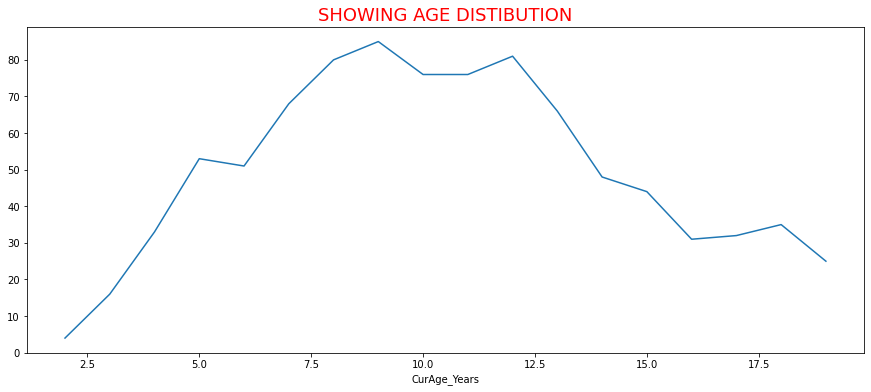

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby('CurAge_Years').size().plot()
plt.title('SHOWING AGE DISTIBUTION', color='r', fontsize=18)

Text(0.5, 1.0, 'SHOWING AGE DISTIBUTION')

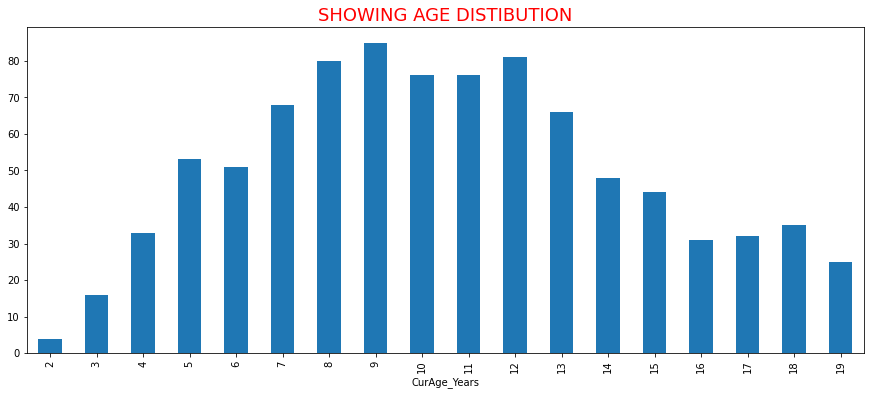

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby(['CurAge_Years']).size().plot(kind='bar')
plt.title('SHOWING AGE DISTIBUTION', color='r', fontsize=18)

In [ ]:
#number of each sex in all ages of the data set
df2.groupby([ 'CurAge_Years', 'Sex'])['CurAge_Years'].count() 

CurAge_Years  Sex
2             F       1
              M       3
3             F       8
              M       8
4             F      15
              M      18
5             F      26
              M      27
6             F      27
              M      24
7             F      33
              M      35
8             F      34
              M      46
9             F      41
              M      44
10            F      35
              M      41
11            F      39
              M      37
12            F      50
              M      31
13            F      33
              M      33
14            F      20
              M      28
15            F      24
              M      20
16            F      18
              M      13
17            F      18
              M      14
18            F      18
              M      17
19            F      19
              M       6
Name: CurAge_Years, dtype: int64

In [ ]:
#percentage of each sex in all ages of the data set
df2.groupby([ 'CurAge_Years', 'Sex'])['Sex'].count()/len(df2)*100 

CurAge_Years  Sex
2             F      0.110619
              M      0.331858
3             F      0.884956
              M      0.884956
4             F      1.659292
              M      1.991150
5             F      2.876106
              M      2.986726
6             F      2.986726
              M      2.654867
7             F      3.650442
              M      3.871681
8             F      3.761062
              M      5.088496
9             F      4.535398
              M      4.867257
10            F      3.871681
              M      4.535398
11            F      4.314159
              M      4.092920
12            F      5.530973
              M      3.429204
13            F      3.650442
              M      3.650442
14            F      2.212389
              M      3.097345
15            F      2.654867
              M      2.212389
16            F      1.991150
              M      1.438053
17            F      1.991150
              M      1.548673
18            F      1

Text(0.5, 1.0, 'SHOWING AGE DISTRIBUTION BASED ON SEX')

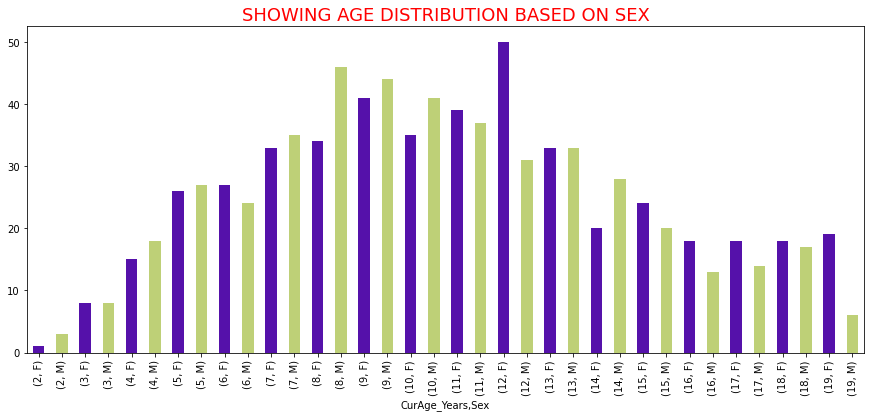

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby(['CurAge_Years','Sex']).size().plot(kind = 'bar', color=["#5511aa", "#bed077"])
plt.title('SHOWING AGE DISTRIBUTION BASED ON SEX', color='r', fontsize=18)

In [ ]:
#number of each sex in eacg age groupp of the data set
df2.groupby([ 'AgeGroup', 'Sex'])['Sex'].count() 

AgeGroup  Sex
OVER 9    F      274
          M      240
UNDER 9   F      185
          M      205
Name: Sex, dtype: int64

In [ ]:
#pecentage of each sex in age group of the data set
df2.groupby([ 'AgeGroup', 'Sex'])['Sex'].count()/len(df2.AgeGroup)*100 

AgeGroup  Sex
OVER 9    F      30.309735
          M      26.548673
UNDER 9   F      20.464602
          M      22.676991
Name: Sex, dtype: float64

Text(0.5, 1.0, 'SEX VS AGE GROUP DISTRIBUTION')

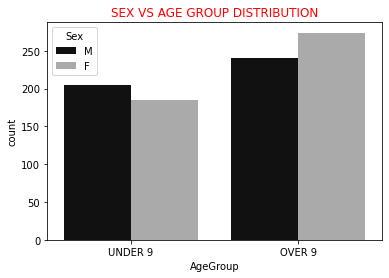

In [ ]:
sns.countplot(data=df2, x='AgeGroup', hue='Sex', palette=["#111111", "#aaaaaa"])
plt.title('SEX VS AGE GROUP DISTRIBUTION', 
          color='r', fontsize='large')


In [ ]:
#number of persons in each regimen at start
df2.groupby([ 'RegimenAtARTStart'])['RegimenAtARTStart'].size()

RegimenAtARTStart
ABC-3TC-EFV         5
ABC-3TC-LPV/r      91
ABC-3TC-NVP        29
AZT-3TC-ATV/r       1
AZT-3TC-EFV        67
AZT-3TC-LPV/r      19
AZT-3TC-NVP       427
TDF-3TC-ATV/r       6
TDF-3TC-EFV       166
TDF-3TC-EFV400      1
TDF-3TC-LPV/r      56
TDF-3TC-NVP        14
TDF-FTC-EFV        19
TDF-FTC-LPV/r       1
TDF-FTC-NVP         1
d4T-3TC-NVP         1
Name: RegimenAtARTStart, dtype: int64

In [ ]:
#percentage of persons in each regimen at start
df2.groupby([ 'RegimenAtARTStart'])['RegimenAtARTStart'].count()/len(df2)*100 

RegimenAtARTStart
ABC-3TC-EFV        0.553097
ABC-3TC-LPV/r     10.066372
ABC-3TC-NVP        3.207965
AZT-3TC-ATV/r      0.110619
AZT-3TC-EFV        7.411504
AZT-3TC-LPV/r      2.101770
AZT-3TC-NVP       47.234513
TDF-3TC-ATV/r      0.663717
TDF-3TC-EFV       18.362832
TDF-3TC-EFV400     0.110619
TDF-3TC-LPV/r      6.194690
TDF-3TC-NVP        1.548673
TDF-FTC-EFV        2.101770
TDF-FTC-LPV/r      0.110619
TDF-FTC-NVP        0.110619
d4T-3TC-NVP        0.110619
Name: RegimenAtARTStart, dtype: float64

Text(0.5, 1.0, 'TOTAL NUMBER CLIENTS ON EACH REGIMEN')

findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.


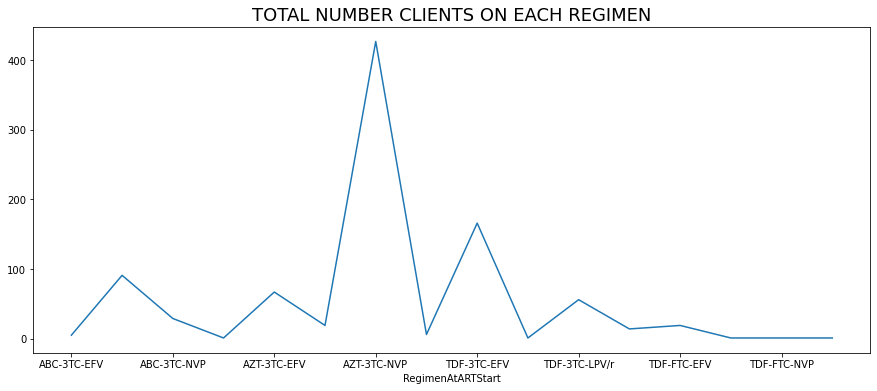

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby('RegimenAtARTStart' ).size().plot()
plt.title('TOTAL NUMBER CLIENTS ON EACH REGIMEN', font = 'bold', fontsize=18)

In [ ]:
#count of sex at start of ART based on Quater
df2.groupby(['QStart', 'Sex'])['Sex'].count()

QStart  Sex
2007Q4  F       1
        M       2
2008Q1  F       1
2008Q3  F       2
        M       2
               ..
2020Q3  M      14
2020Q4  F       5
        M      11
2021Q1  F       1
        M       1
Name: Sex, Length: 104, dtype: int64

In [ ]:
#percentage of sex at start of Art based on Quater
df2.groupby(['QStart', 'Sex'])['Sex'].count()/len(df2)*100

QStart  Sex
2007Q4  F      0.110619
        M      0.221239
2008Q1  F      0.110619
2008Q3  F      0.221239
        M      0.221239
                 ...   
2020Q3  M      1.548673
2020Q4  F      0.553097
        M      1.216814
2021Q1  F      0.110619
        M      0.110619
Name: Sex, Length: 104, dtype: float64

Text(0.5, 1.0, 'SHOWING SEX DISTRIBUTION ON ART START PER QUATER')

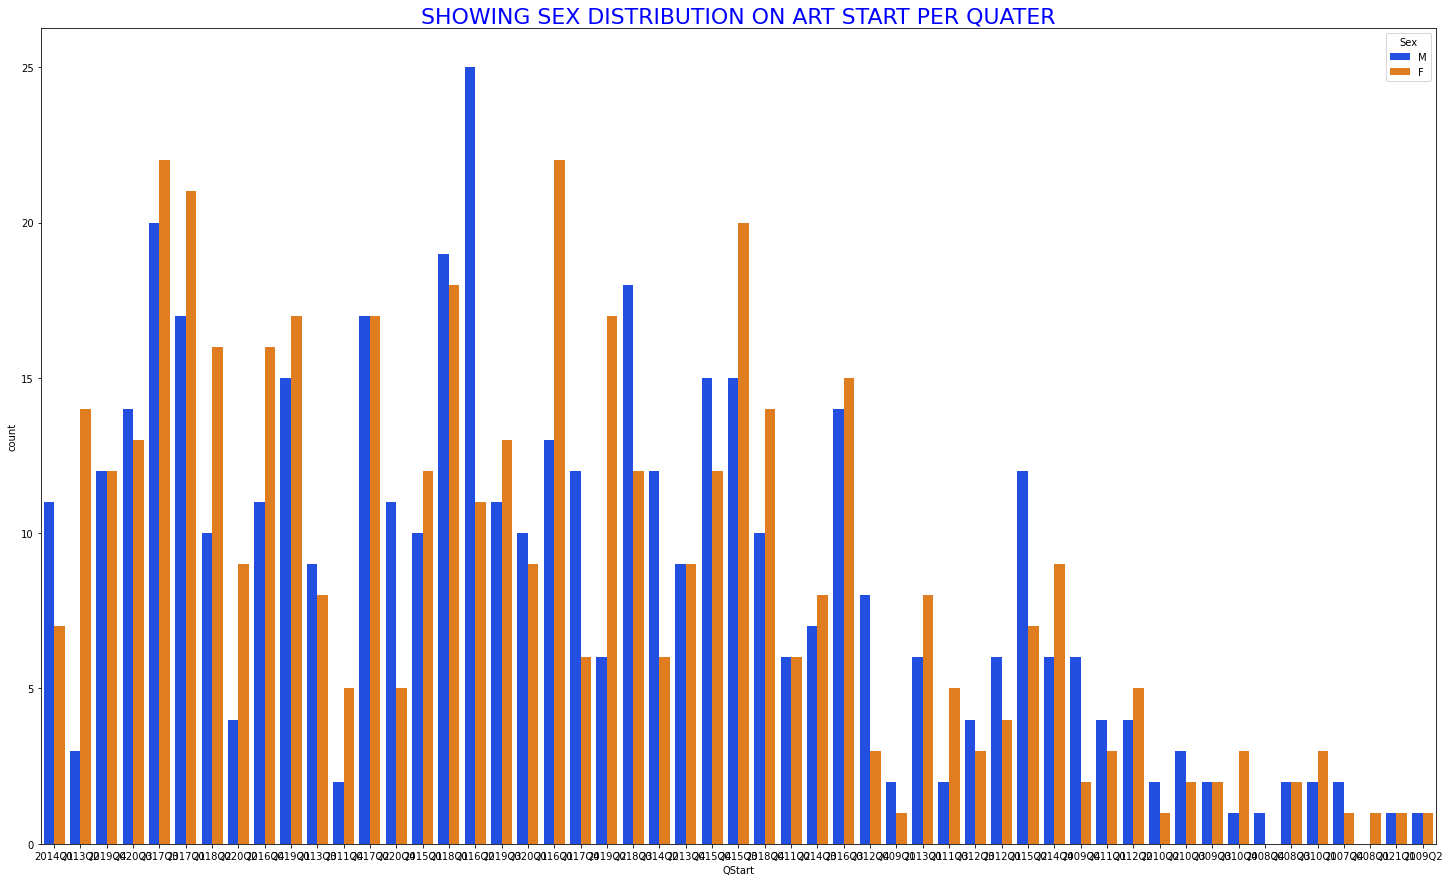

In [ ]:
plt.figure(figsize = (25,15))
sns.countplot(x = 'QStart' ,  hue = 'Sex', data = df2, palette= "bright")
plt.title('SHOWING SEX DISTRIBUTION ON ART START PER QUATER', color='b', fontsize=22)

In [ ]:
#count of sex at start of TLD based on quater
df2.groupby(['QTLD', 'Sex'])['Sex'].count()

QTLD    Sex
2019Q1  F       5
        M       5
2019Q2  F      26
        M      30
2019Q3  F      38
        M      46
2019Q4  F      30
        M      32
2020Q1  F      64
        M      36
2020Q2  F      76
        M      59
2020Q3  F      56
        M      47
2020Q4  F      32
        M      31
2021Q1  F      27
        M      20
2021Q2  F      13
        M      19
2021Q3  F      18
        M      21
2021Q4  F      63
        M      89
2022Q1  F       9
        M      10
2022Q2  F       2
Name: Sex, dtype: int64

In [ ]:
#percentage of sex at start of TLD based on quater
df2.groupby([ 'QTLD', 'Sex'])['Sex'].count()/len(df2)*100

QTLD    Sex
2019Q1  F      0.553097
        M      0.553097
2019Q2  F      2.876106
        M      3.318584
2019Q3  F      4.203540
        M      5.088496
2019Q4  F      3.318584
        M      3.539823
2020Q1  F      7.079646
        M      3.982301
2020Q2  F      8.407080
        M      6.526549
2020Q3  F      6.194690
        M      5.199115
2020Q4  F      3.539823
        M      3.429204
2021Q1  F      2.986726
        M      2.212389
2021Q2  F      1.438053
        M      2.101770
2021Q3  F      1.991150
        M      2.323009
2021Q4  F      6.969027
        M      9.845133
2022Q1  F      0.995575
        M      1.106195
2022Q2  F      0.221239
Name: Sex, dtype: float64

Text(0.5, 1.0, 'SHOWING SEX DISTRIBUTION ON TLD START PER QUATER')

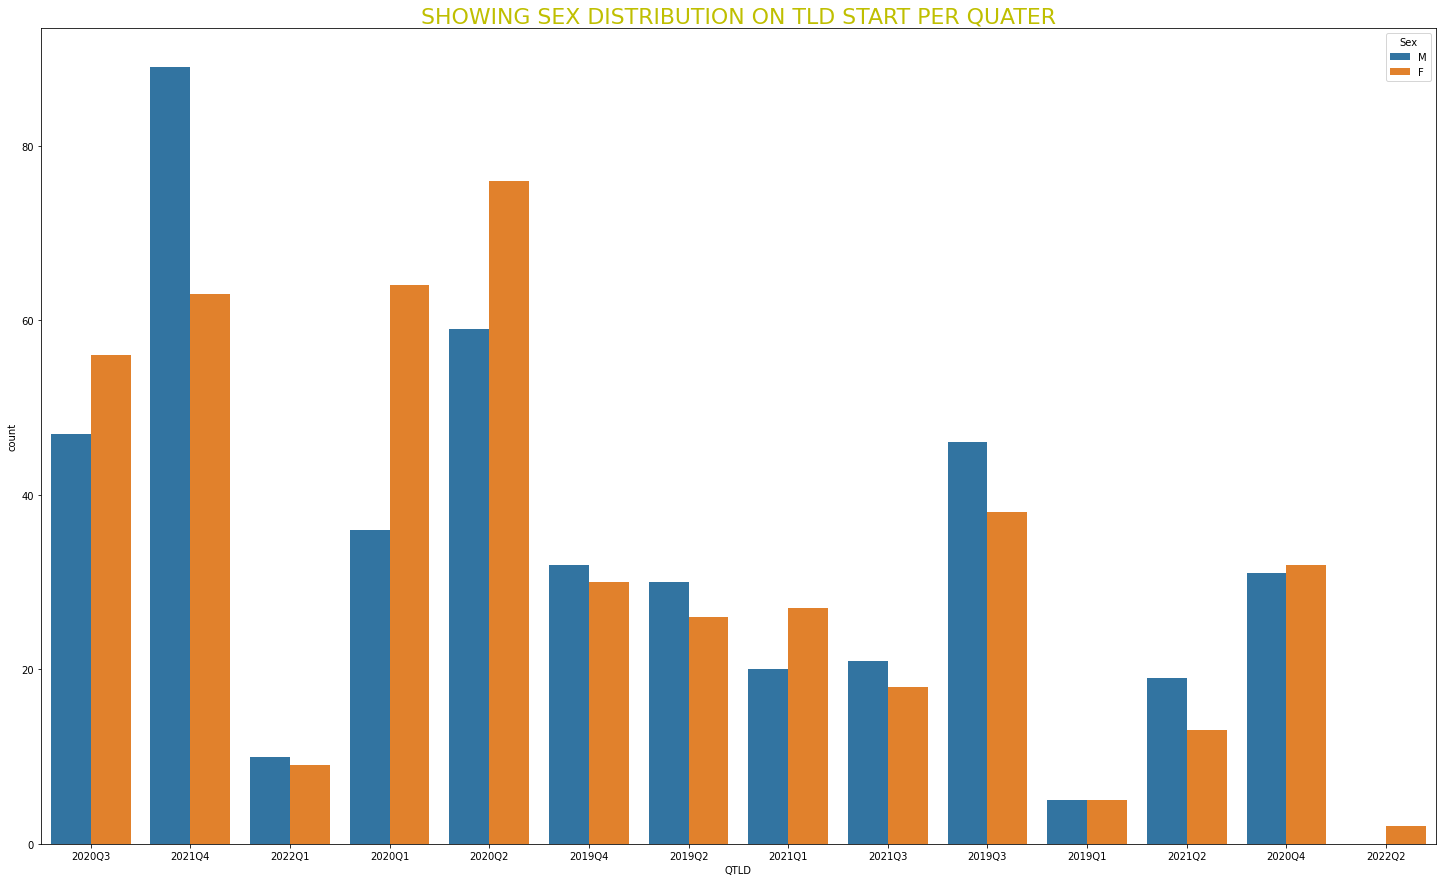

In [113]:
plt.figure(figsize = (25,15))
sns.countplot(x = 'QTLD' ,  hue = 'Sex', data = df2)
plt.title('SHOWING SEX DISTRIBUTION ON TLD START PER QUATER', color='y', fontsize=22)

In [ ]:
#count of agegroup at start of TLD based on quater
df2.groupby([ 'QTLD', 'AgeGroup'])['AgeGroup'].count()

QTLD    AgeGroup
2019Q1  OVER 9        6
        UNDER 9       4
2019Q2  OVER 9       52
        UNDER 9       4
2019Q3  OVER 9       63
        UNDER 9      21
2019Q4  OVER 9       43
        UNDER 9      19
2020Q1  OVER 9       62
        UNDER 9      38
2020Q2  OVER 9       95
        UNDER 9      40
2020Q3  OVER 9       67
        UNDER 9      36
2020Q4  OVER 9       45
        UNDER 9      18
2021Q1  OVER 9       33
        UNDER 9      14
2021Q2  OVER 9       17
        UNDER 9      15
2021Q3  OVER 9       12
        UNDER 9      27
2021Q4  OVER 9       15
        UNDER 9     137
2022Q1  OVER 9        3
        UNDER 9      16
2022Q2  OVER 9        1
        UNDER 9       1
Name: AgeGroup, dtype: int64

In [ ]:
#percentage of agegroup at start of TLD based on quater
df2.groupby([ 'QTLD', 'AgeGroup'])['AgeGroup'].count()/len(df2)*100

QTLD    AgeGroup
2019Q1  OVER 9       0.663717
        UNDER 9      0.442478
2019Q2  OVER 9       5.752212
        UNDER 9      0.442478
2019Q3  OVER 9       6.969027
        UNDER 9      2.323009
2019Q4  OVER 9       4.756637
        UNDER 9      2.101770
2020Q1  OVER 9       6.858407
        UNDER 9      4.203540
2020Q2  OVER 9      10.508850
        UNDER 9      4.424779
2020Q3  OVER 9       7.411504
        UNDER 9      3.982301
2020Q4  OVER 9       4.977876
        UNDER 9      1.991150
2021Q1  OVER 9       3.650442
        UNDER 9      1.548673
2021Q2  OVER 9       1.880531
        UNDER 9      1.659292
2021Q3  OVER 9       1.327434
        UNDER 9      2.986726
2021Q4  OVER 9       1.659292
        UNDER 9     15.154867
2022Q1  OVER 9       0.331858
        UNDER 9      1.769912
2022Q2  OVER 9       0.110619
        UNDER 9      0.110619
Name: AgeGroup, dtype: float64

Text(0.5, 1.0, 'SHOWING AGE GROUP ON TLD START PER QUATER')

findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.


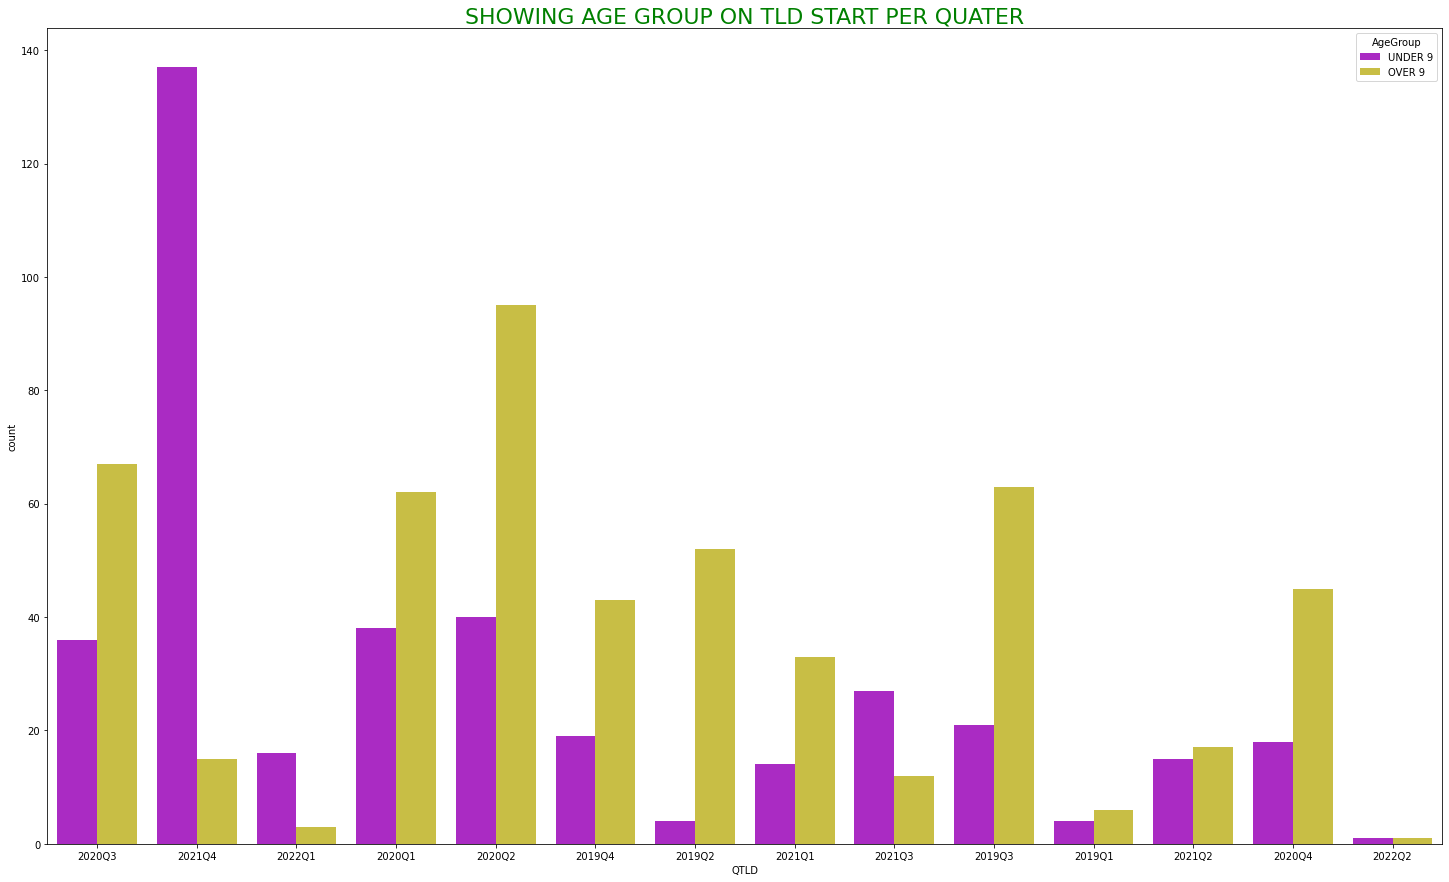

In [ ]:
plt.figure(figsize = (25,15))
sns.countplot(x = 'QTLD' ,  hue = 'AgeGroup', data = df2, palette=["#bb11dd", "#ded02f"])
plt.title('SHOWING AGE GROUP ON TLD START PER QUATER', color='g', font = 'bold', fontsize=22)

In [ ]:
#dirst vl result based on at start of TLD based on quater
df2.groupby([ 'QTLD', 'FIRST_STATUS'])['FIRST_STATUS'].count()

QTLD    FIRST_STATUS
2019Q1  SUPPRESSED       7
        UNSUPPRESSED     3
2019Q2  SUPPRESSED      39
        UNSUPPRESSED    17
2019Q3  SUPPRESSED      52
        UNSUPPRESSED    32
2019Q4  SUPPRESSED      35
        UNSUPPRESSED    27
2020Q1  SUPPRESSED      64
        UNSUPPRESSED    36
2020Q2  SUPPRESSED      81
        UNSUPPRESSED    54
2020Q3  SUPPRESSED      80
        UNSUPPRESSED    23
2020Q4  SUPPRESSED      40
        UNSUPPRESSED    23
2021Q1  SUPPRESSED      30
        UNSUPPRESSED    17
2021Q2  SUPPRESSED      22
        UNSUPPRESSED    10
2021Q3  SUPPRESSED      19
        UNSUPPRESSED    20
2021Q4  SUPPRESSED      83
        UNSUPPRESSED    69
2022Q1  SUPPRESSED      10
        UNSUPPRESSED     9
2022Q2  SUPPRESSED       1
        UNSUPPRESSED     1
Name: FIRST_STATUS, dtype: int64

In [ ]:
#percentage of first vl result at start of TLD by quater
df2.groupby([ 'QTLD', 'FIRST_STATUS'])['FIRST_STATUS'].count()/len(df2)*100

QTLD    FIRST_STATUS
2019Q1  SUPPRESSED      0.774336
        UNSUPPRESSED    0.331858
2019Q2  SUPPRESSED      4.314159
        UNSUPPRESSED    1.880531
2019Q3  SUPPRESSED      5.752212
        UNSUPPRESSED    3.539823
2019Q4  SUPPRESSED      3.871681
        UNSUPPRESSED    2.986726
2020Q1  SUPPRESSED      7.079646
        UNSUPPRESSED    3.982301
2020Q2  SUPPRESSED      8.960177
        UNSUPPRESSED    5.973451
2020Q3  SUPPRESSED      8.849558
        UNSUPPRESSED    2.544248
2020Q4  SUPPRESSED      4.424779
        UNSUPPRESSED    2.544248
2021Q1  SUPPRESSED      3.318584
        UNSUPPRESSED    1.880531
2021Q2  SUPPRESSED      2.433628
        UNSUPPRESSED    1.106195
2021Q3  SUPPRESSED      2.101770
        UNSUPPRESSED    2.212389
2021Q4  SUPPRESSED      9.181416
        UNSUPPRESSED    7.632743
2022Q1  SUPPRESSED      1.106195
        UNSUPPRESSED    0.995575
2022Q2  SUPPRESSED      0.110619
        UNSUPPRESSED    0.110619
Name: FIRST_STATUS, dtype: float64

Text(0.5, 1.0, 'SUPPRESSION VS UNSUPPRESSION PER QUATER AFTER FIRST VL')

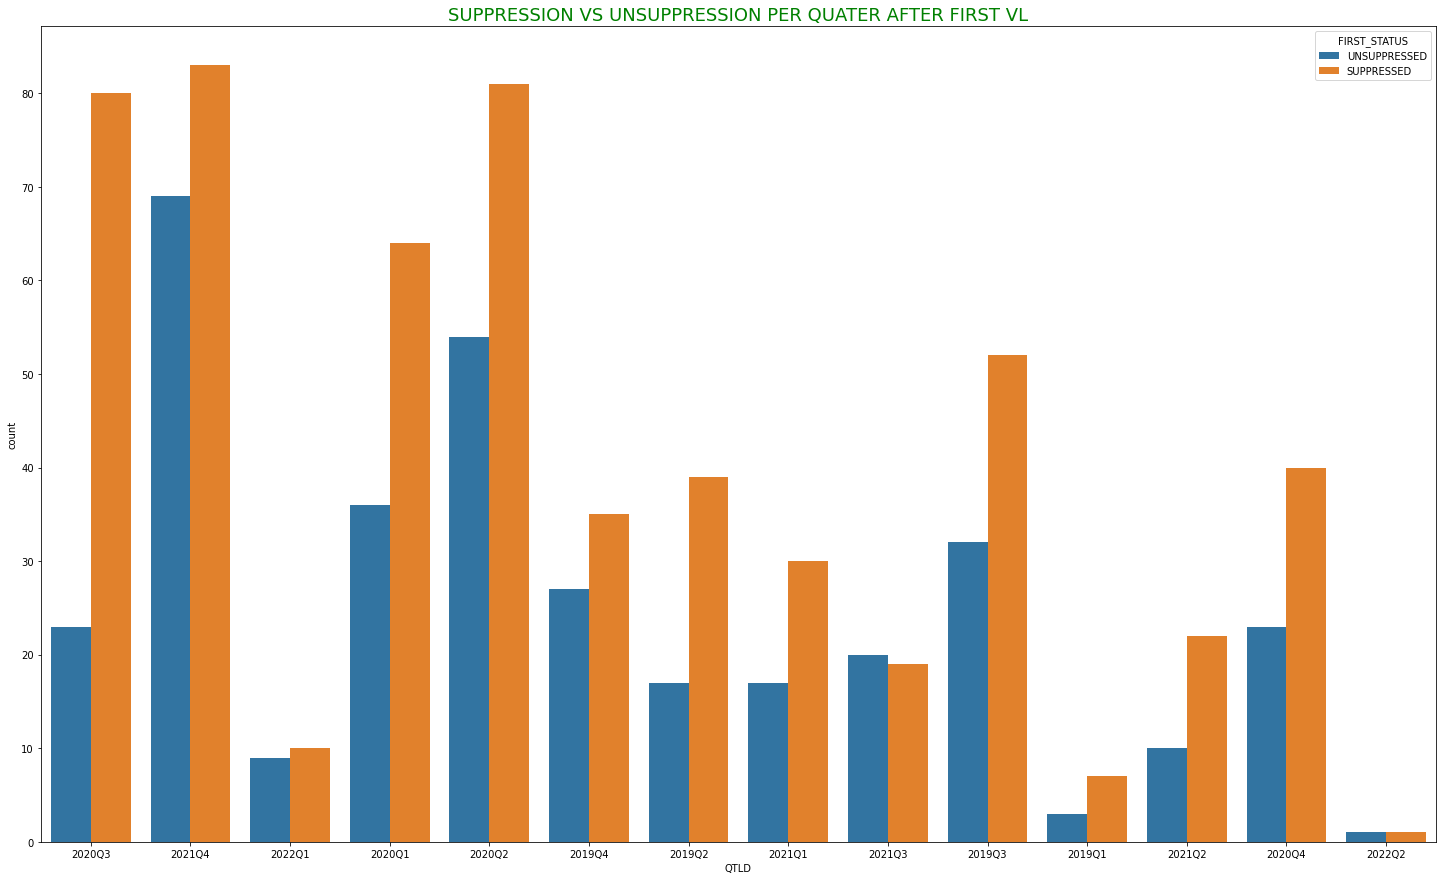

In [ ]:
plt.figure(figsize = (25,15))
sns.countplot(x = df2.QTLD,  hue = df2.FIRST_STATUS)
plt.title('SUPPRESSION VS UNSUPPRESSION PER QUATER AFTER FIRST VL', color='g', font = 'bold', fontsize=18)

In [ ]:
#second vl result at start of TLD by quater
df2.groupby([ 'QTLD', 'SECOND_STATUS'])['SECOND_STATUS'].count()

QTLD    SECOND_STATUS
2019Q1  SUPPRESSED         9
        UNSUPPRESSED       1
2019Q2  SUPPRESSED        39
        UNSUPPRESSED      17
2019Q3  SUPPRESSED        60
        UNSUPPRESSED      24
2019Q4  SUPPRESSED        48
        UNSUPPRESSED      14
2020Q1  SUPPRESSED        70
        UNSUPPRESSED      30
2020Q2  SUPPRESSED       101
        UNSUPPRESSED      34
2020Q3  SUPPRESSED        82
        UNSUPPRESSED      21
2020Q4  SUPPRESSED        41
        UNSUPPRESSED      22
2021Q1  SUPPRESSED        35
        UNSUPPRESSED      12
2021Q2  SUPPRESSED        26
        UNSUPPRESSED       6
2021Q3  SUPPRESSED        32
        UNSUPPRESSED       7
2021Q4  SUPPRESSED       128
        UNSUPPRESSED      24
2022Q1  SUPPRESSED        17
        UNSUPPRESSED       2
2022Q2  UNSUPPRESSED       2
Name: SECOND_STATUS, dtype: int64

In [ ]:
#result of second vl
df2.groupby(['SECOND_STATUS'])['SECOND_STATUS'].count()

SECOND_STATUS
SUPPRESSED      688
UNSUPPRESSED    216
Name: SECOND_STATUS, dtype: int64

In [ ]:
#Percentage of second vl result
df2.groupby([ 'SECOND_STATUS'])['SECOND_STATUS'].count()/len(df2)*100

SECOND_STATUS
SUPPRESSED      76.106195
UNSUPPRESSED    23.893805
Name: SECOND_STATUS, dtype: float64

In [ ]:
# percentage of second vl result at start of TLD by quater
df2.groupby([ 'QTLD', 'SECOND_STATUS'])['SECOND_STATUS'].count()/len(df2)*100

QTLD    SECOND_STATUS
2019Q1  SUPPRESSED        0.995575
        UNSUPPRESSED      0.110619
2019Q2  SUPPRESSED        4.314159
        UNSUPPRESSED      1.880531
2019Q3  SUPPRESSED        6.637168
        UNSUPPRESSED      2.654867
2019Q4  SUPPRESSED        5.309735
        UNSUPPRESSED      1.548673
2020Q1  SUPPRESSED        7.743363
        UNSUPPRESSED      3.318584
2020Q2  SUPPRESSED       11.172566
        UNSUPPRESSED      3.761062
2020Q3  SUPPRESSED        9.070796
        UNSUPPRESSED      2.323009
2020Q4  SUPPRESSED        4.535398
        UNSUPPRESSED      2.433628
2021Q1  SUPPRESSED        3.871681
        UNSUPPRESSED      1.327434
2021Q2  SUPPRESSED        2.876106
        UNSUPPRESSED      0.663717
2021Q3  SUPPRESSED        3.539823
        UNSUPPRESSED      0.774336
2021Q4  SUPPRESSED       14.159292
        UNSUPPRESSED      2.654867
2022Q1  SUPPRESSED        1.880531
        UNSUPPRESSED      0.221239
2022Q2  UNSUPPRESSED      0.221239
Name: SECOND_STATUS, dtype: float

Text(0.5, 1.0, 'SUPPRESSION VS UNSUPPRESSION PER QUATER AFTER SECOND VL ON TLD ')

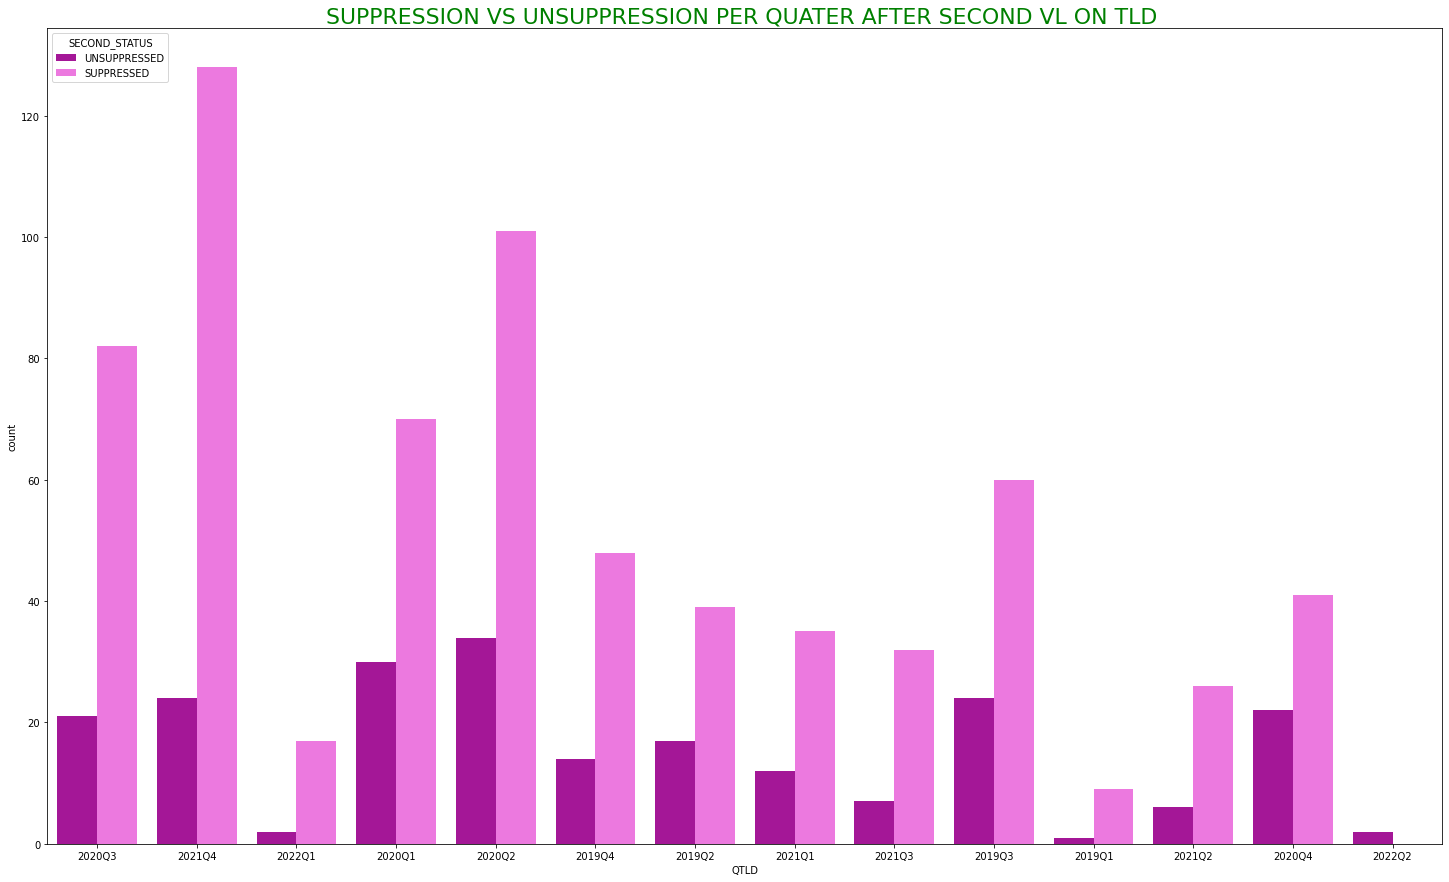

In [ ]:
plt.figure(figsize = (25,15))
sns.countplot(x = df2.QTLD,  hue = df2.SECOND_STATUS, palette=["#bb00AA", "#ff66ee"])
plt.title('SUPPRESSION VS UNSUPPRESSION PER QUATER AFTER SECOND VL ON TLD ', color='g', fontsize=22)

In [ ]:
#suppression vs unsuppression of first vl result
df2.groupby(['FIRST_STATUS'])['FIRST_STATUS'].count()

FIRST_STATUS
SUPPRESSED      563
UNSUPPRESSED    341
Name: FIRST_STATUS, dtype: int64

In [ ]:
#percentage of first vl result
df2.groupby(['FIRST_STATUS'])['FIRST_STATUS'].count()/len(df2)*100

FIRST_STATUS
SUPPRESSED      62.278761
UNSUPPRESSED    37.721239
Name: FIRST_STATUS, dtype: float64

In [ ]:
#relationship of secnd vl to the first to the secund
df2.groupby([ 'FIRST_STATUS','SECOND_STATUS'])['FIRST_STATUS'].count()

FIRST_STATUS  SECOND_STATUS
SUPPRESSED    SUPPRESSED       473
              UNSUPPRESSED      90
UNSUPPRESSED  SUPPRESSED       215
              UNSUPPRESSED     126
Name: FIRST_STATUS, dtype: int64

In [ ]:
#relationship of secnd vl to the first to the secund
df2.groupby([ 'FIRST_STATUS','SECOND_STATUS'])['FIRST_STATUS'].count()/len(df2)*100

FIRST_STATUS  SECOND_STATUS
SUPPRESSED    SUPPRESSED       52.323009
              UNSUPPRESSED      9.955752
UNSUPPRESSED  SUPPRESSED       23.783186
              UNSUPPRESSED     13.938053
Name: FIRST_STATUS, dtype: float64

In [ ]:
#Showing suppression vs unsuppression in sex and age group after first vl
df2.groupby(['FIRST_STATUS', 'AgeGroup', 'Sex'])['Sex'].count()


FIRST_STATUS  AgeGroup  Sex
SUPPRESSED    OVER 9    F      180
                        M      148
              UNDER 9   F      113
                        M      122
UNSUPPRESSED  OVER 9    F       94
                        M       92
              UNDER 9   F       72
                        M       83
Name: Sex, dtype: int64

In [ ]:
#percentage of suppression vs unsuppression in sex and age group after first v
df2.groupby(['FIRST_STATUS', 'AgeGroup', 'Sex'])['Sex'].count()/len(df2)*100

FIRST_STATUS  AgeGroup  Sex
SUPPRESSED    OVER 9    F      19.911504
                        M      16.371681
              UNDER 9   F      12.500000
                        M      13.495575
UNSUPPRESSED  OVER 9    F      10.398230
                        M      10.176991
              UNDER 9   F       7.964602
                        M       9.181416
Name: Sex, dtype: float64

Text(0.5, 1.0, 'SEX & AGE GROUP DISTRIBUTION OF FIRST VL BEING UNSUPPRESSSED')

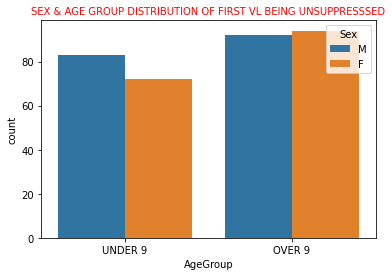

In [ ]:
sns.countplot(data=df2.loc[df2['FIRST_STATUS'] =='UNSUPPRESSED'], x='AgeGroup', hue='Sex')
plt.title('SEX & AGE GROUP DISTRIBUTION OF FIRST VL BEING UNSUPPRESSSED', 
          color='r', fontsize='medium')


Text(0.5, 1.0, 'SEX & AGE GROUP DISTRIBUTION OF FIRST VL BEING SUPPRESSSED')

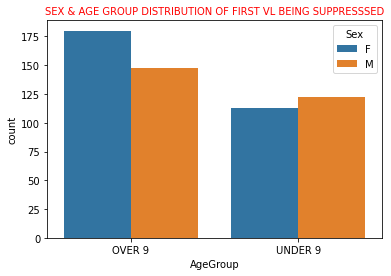

In [ ]:
sns.countplot(data=df2.loc[df2['FIRST_STATUS'] =='SUPPRESSED'], x='AgeGroup', hue='Sex')
plt.title('SEX & AGE GROUP DISTRIBUTION OF FIRST VL BEING SUPPRESSSED', 
          color='r', fontsize='medium')


In [ ]:
#showing outcome  in sex of second vl together with first vl
df2.groupby(['SECOND_STATUS', 'FIRST_STATUS', 'Sex'])['Sex'].count()

SECOND_STATUS  FIRST_STATUS  Sex
SUPPRESSED     SUPPRESSED    F      250
                             M      223
               UNSUPPRESSED  F      100
                             M      115
UNSUPPRESSED   SUPPRESSED    F       43
                             M       47
               UNSUPPRESSED  F       66
                             M       60
Name: Sex, dtype: int64

In [ ]:
#showing percentage in sex of second vl together with first vl
df2.groupby(['FIRST_STATUS', 'SECOND_STATUS', 'Sex'])['Sex'].count()/len(df2)*100

FIRST_STATUS  SECOND_STATUS  Sex
SUPPRESSED    SUPPRESSED     F      27.654867
                             M      24.668142
              UNSUPPRESSED   F       4.756637
                             M       5.199115
UNSUPPRESSED  SUPPRESSED     F      11.061947
                             M      12.721239
              UNSUPPRESSED   F       7.300885
                             M       6.637168
Name: Sex, dtype: float64

Text(0.5, 1.0, 'OUTCOME IN SEX DISTRIBUTION OF SECOND VL AFTER BEING UNSUPPRESSSED AT FIRST')

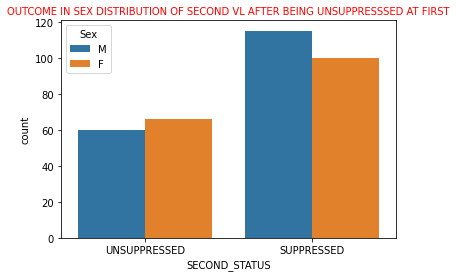

In [ ]:

sns.countplot(data=df2.loc[df2['FIRST_STATUS'] =='UNSUPPRESSED'], x='SECOND_STATUS', hue='Sex')
plt.title('OUTCOME IN SEX DISTRIBUTION OF SECOND VL AFTER BEING UNSUPPRESSSED AT FIRST', 
          color='r', fontsize='medium')


Text(0.5, 1.0, 'OUTCOME IN SEX DISTRIBUTION OF SECOND VL AFTER BEING SUPPRESSSED AT FIRST')

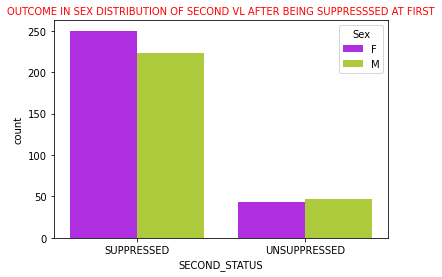

In [ ]:
sns.countplot(data=df2.loc[df2['FIRST_STATUS'] =='SUPPRESSED'],  x='SECOND_STATUS', hue='Sex',
              palette=["#bc11fc", "#bbe225"])
plt.title('OUTCOME IN SEX DISTRIBUTION OF SECOND VL AFTER BEING SUPPRESSSED AT FIRST', 
          color='r', fontsize='medium')


In [ ]:
#first vl based on age group and sex
df2.groupby([ 'Sex', 'AgeGroup', 'FIRST_STATUS'])['FIRST_STATUS'].size()

Sex  AgeGroup  FIRST_STATUS
F    OVER 9    SUPPRESSED      180
               UNSUPPRESSED     94
     UNDER 9   SUPPRESSED      113
               UNSUPPRESSED     72
M    OVER 9    SUPPRESSED      148
               UNSUPPRESSED     92
     UNDER 9   SUPPRESSED      122
               UNSUPPRESSED     83
Name: FIRST_STATUS, dtype: int64

In [ ]:
#percentage of first vl based on age group and sex
df2.groupby([ 'Sex', 'AgeGroup', 'FIRST_STATUS'])['FIRST_STATUS'].count()/len(df2)*100

Sex  AgeGroup  FIRST_STATUS
F    OVER 9    SUPPRESSED      19.911504
               UNSUPPRESSED    10.398230
     UNDER 9   SUPPRESSED      12.500000
               UNSUPPRESSED     7.964602
M    OVER 9    SUPPRESSED      16.371681
               UNSUPPRESSED    10.176991
     UNDER 9   SUPPRESSED      13.495575
               UNSUPPRESSED     9.181416
Name: FIRST_STATUS, dtype: float64

In [ ]:
#result of first vl based on age group and sex
df2.groupby([ 'Sex', 'AgeGroup', 'SECOND_STATUS'])['SECOND_STATUS'].count()

Sex  AgeGroup  SECOND_STATUS
F    OVER 9    SUPPRESSED       201
               UNSUPPRESSED      73
     UNDER 9   SUPPRESSED       149
               UNSUPPRESSED      36
M    OVER 9    SUPPRESSED       174
               UNSUPPRESSED      66
     UNDER 9   SUPPRESSED       164
               UNSUPPRESSED      41
Name: SECOND_STATUS, dtype: int64

In [ ]:
#percentage of second vl based on age group and sex
df2.groupby([ 'Sex', 'AgeGroup', 'SECOND_STATUS'])['SECOND_STATUS'].count()/len(df2)*100

Sex  AgeGroup  SECOND_STATUS
F    OVER 9    SUPPRESSED       22.234513
               UNSUPPRESSED      8.075221
     UNDER 9   SUPPRESSED       16.482301
               UNSUPPRESSED      3.982301
M    OVER 9    SUPPRESSED       19.247788
               UNSUPPRESSED      7.300885
     UNDER 9   SUPPRESSED       18.141593
               UNSUPPRESSED      4.535398
Name: SECOND_STATUS, dtype: float64

In [ ]:
#result of first vl based on quater of tld start and age group
df2.groupby(['QTLD', 'AgeGroup', 'FIRST_STATUS'])['FIRST_STATUS'].count()

QTLD    AgeGroup  FIRST_STATUS
2019Q1  OVER 9    SUPPRESSED       6
        UNDER 9   SUPPRESSED       1
                  UNSUPPRESSED     3
2019Q2  OVER 9    SUPPRESSED      36
                  UNSUPPRESSED    16
        UNDER 9   SUPPRESSED       3
                  UNSUPPRESSED     1
2019Q3  OVER 9    SUPPRESSED      40
                  UNSUPPRESSED    23
        UNDER 9   SUPPRESSED      12
                  UNSUPPRESSED     9
2019Q4  OVER 9    SUPPRESSED      22
                  UNSUPPRESSED    21
        UNDER 9   SUPPRESSED      13
                  UNSUPPRESSED     6
2020Q1  OVER 9    SUPPRESSED      39
                  UNSUPPRESSED    23
        UNDER 9   SUPPRESSED      25
                  UNSUPPRESSED    13
2020Q2  OVER 9    SUPPRESSED      51
                  UNSUPPRESSED    44
        UNDER 9   SUPPRESSED      30
                  UNSUPPRESSED    10
2020Q3  OVER 9    SUPPRESSED      53
                  UNSUPPRESSED    14
        UNDER 9   SUPPRESSED      27
       

In [ ]:
#percentage of first vl based on quater of tld start and age group
df2.groupby(['QTLD', 'AgeGroup', 'FIRST_STATUS'])['FIRST_STATUS'].count()/len(df2)*100

QTLD    AgeGroup  FIRST_STATUS
2019Q1  OVER 9    SUPPRESSED      0.663717
        UNDER 9   SUPPRESSED      0.110619
                  UNSUPPRESSED    0.331858
2019Q2  OVER 9    SUPPRESSED      3.982301
                  UNSUPPRESSED    1.769912
        UNDER 9   SUPPRESSED      0.331858
                  UNSUPPRESSED    0.110619
2019Q3  OVER 9    SUPPRESSED      4.424779
                  UNSUPPRESSED    2.544248
        UNDER 9   SUPPRESSED      1.327434
                  UNSUPPRESSED    0.995575
2019Q4  OVER 9    SUPPRESSED      2.433628
                  UNSUPPRESSED    2.323009
        UNDER 9   SUPPRESSED      1.438053
                  UNSUPPRESSED    0.663717
2020Q1  OVER 9    SUPPRESSED      4.314159
                  UNSUPPRESSED    2.544248
        UNDER 9   SUPPRESSED      2.765487
                  UNSUPPRESSED    1.438053
2020Q2  OVER 9    SUPPRESSED      5.641593
                  UNSUPPRESSED    4.867257
        UNDER 9   SUPPRESSED      3.318584
                  UNSUP

In [ ]:
#result of first vl based on quater of tld start and sex
df2.groupby(['QTLD', 'Sex', 'FIRST_STATUS'])['FIRST_STATUS'].count()

QTLD    Sex  FIRST_STATUS
2019Q1  F    SUPPRESSED       3
             UNSUPPRESSED     2
        M    SUPPRESSED       4
             UNSUPPRESSED     1
2019Q2  F    SUPPRESSED      18
             UNSUPPRESSED     8
        M    SUPPRESSED      21
             UNSUPPRESSED     9
2019Q3  F    SUPPRESSED      23
             UNSUPPRESSED    15
        M    SUPPRESSED      29
             UNSUPPRESSED    17
2019Q4  F    SUPPRESSED      16
             UNSUPPRESSED    14
        M    SUPPRESSED      19
             UNSUPPRESSED    13
2020Q1  F    SUPPRESSED      41
             UNSUPPRESSED    23
        M    SUPPRESSED      23
             UNSUPPRESSED    13
2020Q2  F    SUPPRESSED      45
             UNSUPPRESSED    31
        M    SUPPRESSED      36
             UNSUPPRESSED    23
2020Q3  F    SUPPRESSED      44
             UNSUPPRESSED    12
        M    SUPPRESSED      36
             UNSUPPRESSED    11
2020Q4  F    SUPPRESSED      21
             UNSUPPRESSED    11
        M    S

In [ ]:
#percentage of first vl based on quater of tld start and sex
df2.groupby(['QTLD', 'Sex', 'FIRST_STATUS'])['FIRST_STATUS'].count()/len(df2)*100

QTLD    Sex  FIRST_STATUS
2019Q1  F    SUPPRESSED      0.331858
             UNSUPPRESSED    0.221239
        M    SUPPRESSED      0.442478
             UNSUPPRESSED    0.110619
2019Q2  F    SUPPRESSED      1.991150
             UNSUPPRESSED    0.884956
        M    SUPPRESSED      2.323009
             UNSUPPRESSED    0.995575
2019Q3  F    SUPPRESSED      2.544248
             UNSUPPRESSED    1.659292
        M    SUPPRESSED      3.207965
             UNSUPPRESSED    1.880531
2019Q4  F    SUPPRESSED      1.769912
             UNSUPPRESSED    1.548673
        M    SUPPRESSED      2.101770
             UNSUPPRESSED    1.438053
2020Q1  F    SUPPRESSED      4.535398
             UNSUPPRESSED    2.544248
        M    SUPPRESSED      2.544248
             UNSUPPRESSED    1.438053
2020Q2  F    SUPPRESSED      4.977876
             UNSUPPRESSED    3.429204
        M    SUPPRESSED      3.982301
             UNSUPPRESSED    2.544248
2020Q3  F    SUPPRESSED      4.867257
             UNSUPPRESSE

In [ ]:
#second vl result based on age group
df2.groupby(['AgeGroup', 'SECOND_STATUS'])['SECOND_STATUS'].count()

AgeGroup  SECOND_STATUS
OVER 9    SUPPRESSED       375
          UNSUPPRESSED     139
UNDER 9   SUPPRESSED       313
          UNSUPPRESSED      77
Name: SECOND_STATUS, dtype: int64

In [ ]:
# percentage of second vl result based on age group
df2.groupby(['AgeGroup', 'SECOND_STATUS'])['SECOND_STATUS'].count()/len(df2)*100

AgeGroup  SECOND_STATUS
OVER 9    SUPPRESSED       41.482301
          UNSUPPRESSED     15.376106
UNDER 9   SUPPRESSED       34.623894
          UNSUPPRESSED      8.517699
Name: SECOND_STATUS, dtype: float64

Text(0.5, 1.0, 'SUPPRESSION VS UNSUPPRESSION AFTER ONE YEAR ON TLD IN AGE GROUPS')

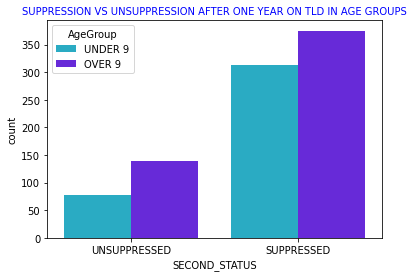

In [ ]:
sns.countplot(x = df2.SECOND_STATUS, hue = df2.AgeGroup, palette=["#11bddc", "#5f0df5"])
plt.title('SUPPRESSION VS UNSUPPRESSION AFTER ONE YEAR ON TLD IN AGE GROUPS', 
          color='b', fontsize=10)

In [ ]:
# result of second vl result based on age group and sex
df2.groupby(['SECOND_STATUS', 'AgeGroup', 'Sex'])['SECOND_STATUS'].count()

SECOND_STATUS  AgeGroup  Sex
SUPPRESSED     OVER 9    F      201
                         M      174
               UNDER 9   F      149
                         M      164
UNSUPPRESSED   OVER 9    F       73
                         M       66
               UNDER 9   F       36
                         M       41
Name: SECOND_STATUS, dtype: int64

In [ ]:
# percentage of second vl result based on age group and sex
df2.groupby(['SECOND_STATUS', 'AgeGroup', 'Sex'])['SECOND_STATUS'].count()/len(df2)*100

SECOND_STATUS  AgeGroup  Sex
SUPPRESSED     OVER 9    F      22.234513
                         M      19.247788
               UNDER 9   F      16.482301
                         M      18.141593
UNSUPPRESSED   OVER 9    F       8.075221
                         M       7.300885
               UNDER 9   F       3.982301
                         M       4.535398
Name: SECOND_STATUS, dtype: float64

Text(0.5, 1.0, 'SEX & AGE GROUP DISTRIBUTION OF SUPPRESSSED AFTER SECOND VL')

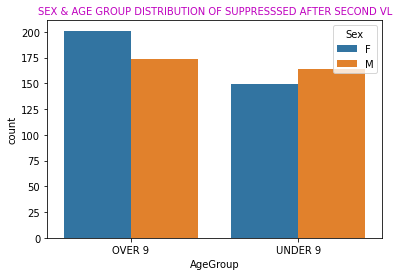

In [ ]:
sns.countplot(data=df2.loc[df2['SECOND_STATUS'] =='SUPPRESSED'], x='AgeGroup', hue='Sex')
plt.title('SEX & AGE GROUP DISTRIBUTION OF SUPPRESSSED AFTER SECOND VL', 
          color='m', fontsize='medium')

Text(0.5, 1.0, 'SEX & AGE DISTRIBUTION BEING UNSUPPRESSSED AFTER SECOND VL')

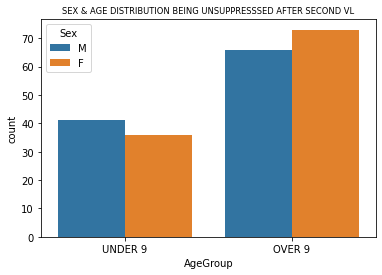

In [ ]:
sns.countplot(data=df2.loc[df2['SECOND_STATUS'] =='UNSUPPRESSED'], x='AgeGroup', hue='Sex')
plt.title('SEX & AGE DISTRIBUTION BEING UNSUPPRESSSED AFTER SECOND VL', 
          color='k', fontsize='small')

In [ ]:
# result of second vl result based on age group and frist vl
df2.groupby(['FIRST_STATUS', 'AgeGroup', 'SECOND_STATUS'])['SECOND_STATUS'].count()

FIRST_STATUS  AgeGroup  SECOND_STATUS
SUPPRESSED    OVER 9    SUPPRESSED       265
                        UNSUPPRESSED      63
              UNDER 9   SUPPRESSED       208
                        UNSUPPRESSED      27
UNSUPPRESSED  OVER 9    SUPPRESSED       110
                        UNSUPPRESSED      76
              UNDER 9   SUPPRESSED       105
                        UNSUPPRESSED      50
Name: SECOND_STATUS, dtype: int64

In [ ]:
# percentage of second vl result based on age group and frist vl
df2.groupby(['FIRST_STATUS', 'AgeGroup', 'SECOND_STATUS'])['SECOND_STATUS'].count()/len(df2)*100

FIRST_STATUS  AgeGroup  SECOND_STATUS
SUPPRESSED    OVER 9    SUPPRESSED       29.314159
                        UNSUPPRESSED      6.969027
              UNDER 9   SUPPRESSED       23.008850
                        UNSUPPRESSED      2.986726
UNSUPPRESSED  OVER 9    SUPPRESSED       12.168142
                        UNSUPPRESSED      8.407080
              UNDER 9   SUPPRESSED       11.615044
                        UNSUPPRESSED      5.530973
Name: SECOND_STATUS, dtype: float64

(Text(0.5, 1.0, 'AGE GROUP IN SECOND VL AFTER BEING UNSUPPRESSSED AT FIRST'),)

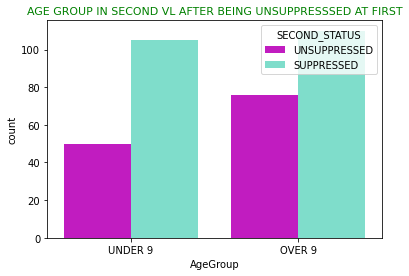

In [ ]:
sns.countplot(data=df2.loc[df2['FIRST_STATUS'] =='UNSUPPRESSED'], hue='SECOND_STATUS', 
              x='AgeGroup', palette=["#dc00dc", "#6fedd5"])
plt.title('AGE GROUP IN SECOND VL AFTER BEING UNSUPPRESSSED AT FIRST', 
          color='g', fontsize=11),

Text(0.5, 1.0, 'AGE GROUP IN SECOND VL AFTER BEING SUPPRESSSED AT FIRST ')

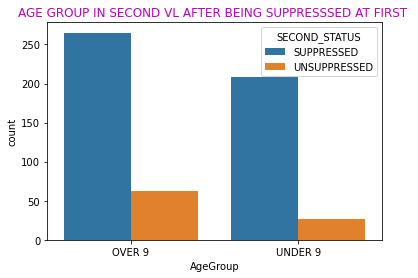

In [ ]:
sns.countplot(data=df2.loc[df2['FIRST_STATUS'] =='SUPPRESSED'], x='AgeGroup', hue='SECOND_STATUS')
plt.title('AGE GROUP IN SECOND VL AFTER BEING SUPPRESSSED AT FIRST ', 
          color='m')


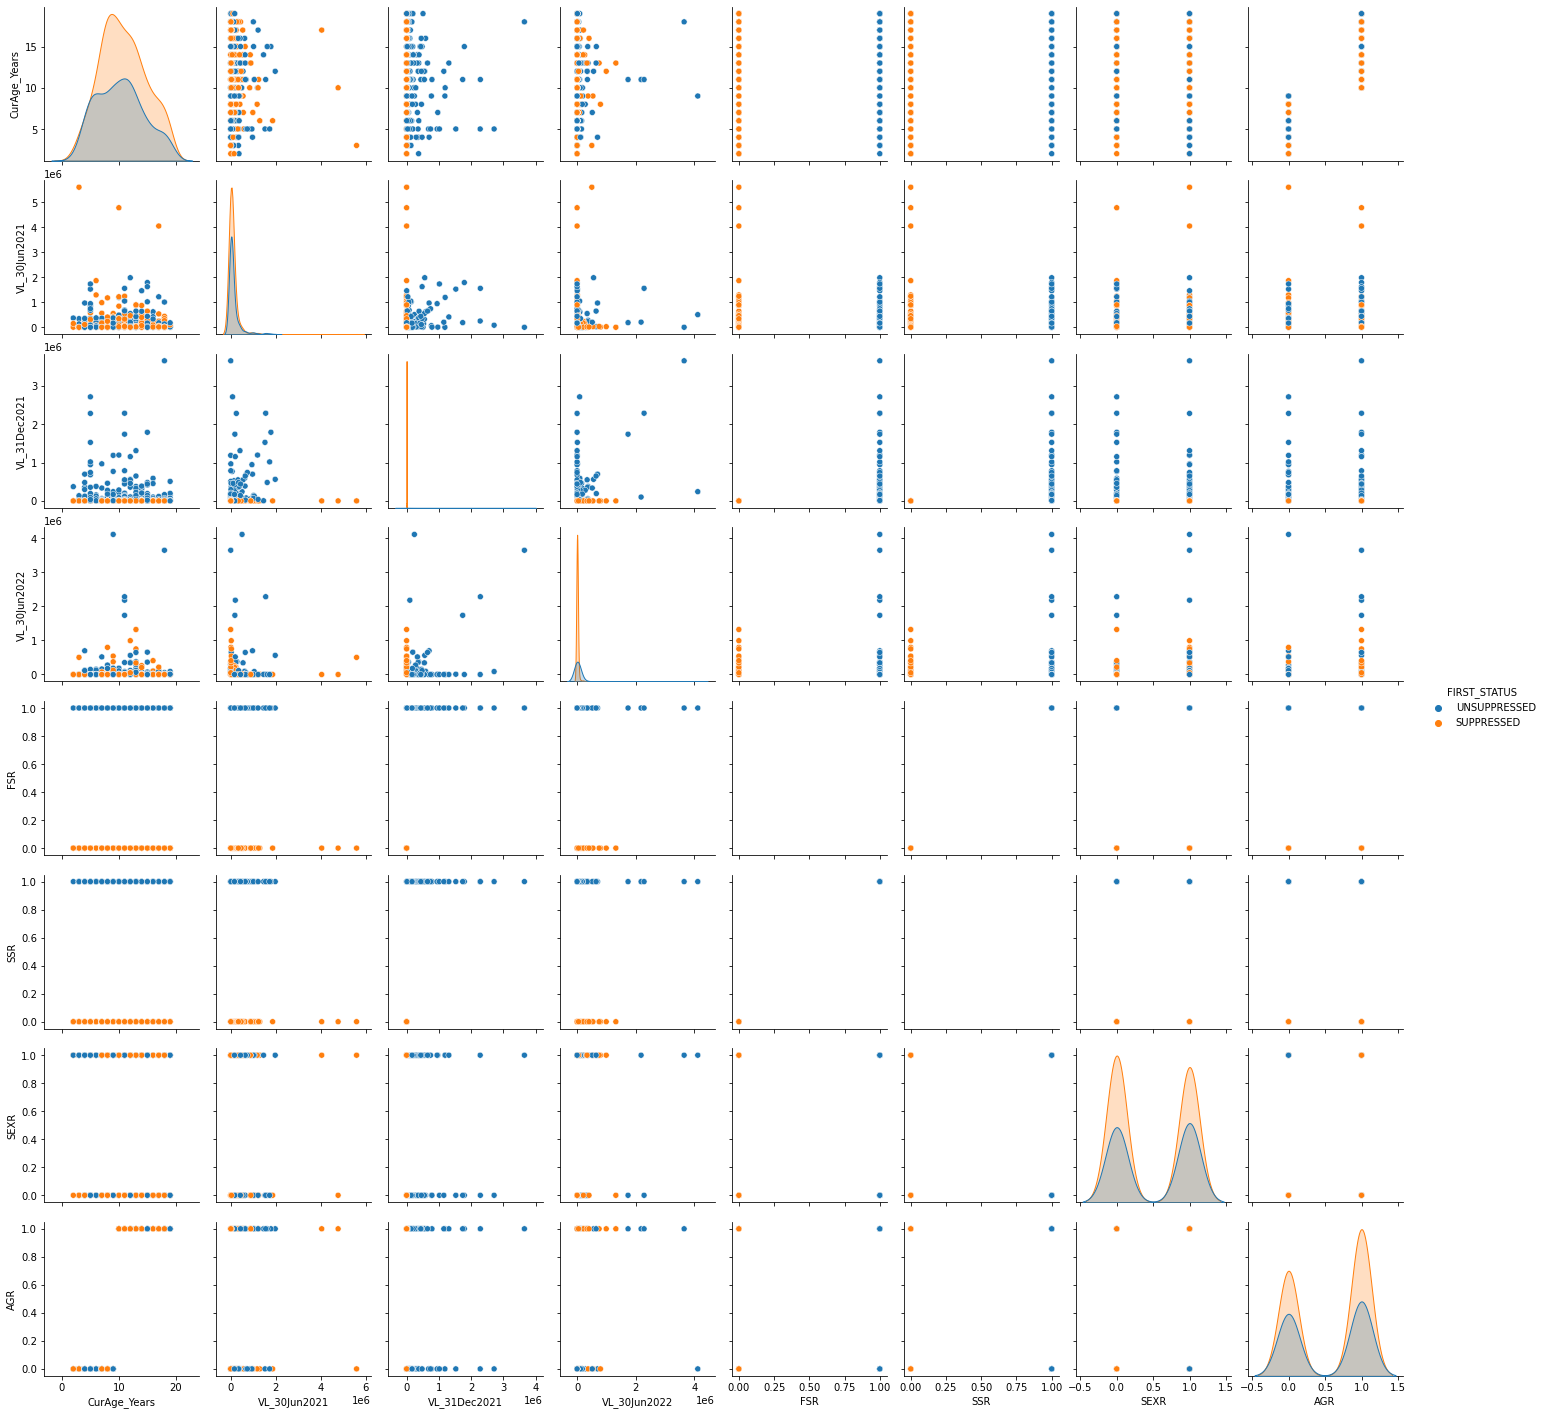

In [ ]:
#Pair plot of first viral load
sns.pairplot(df2, hue="FIRST_STATUS")

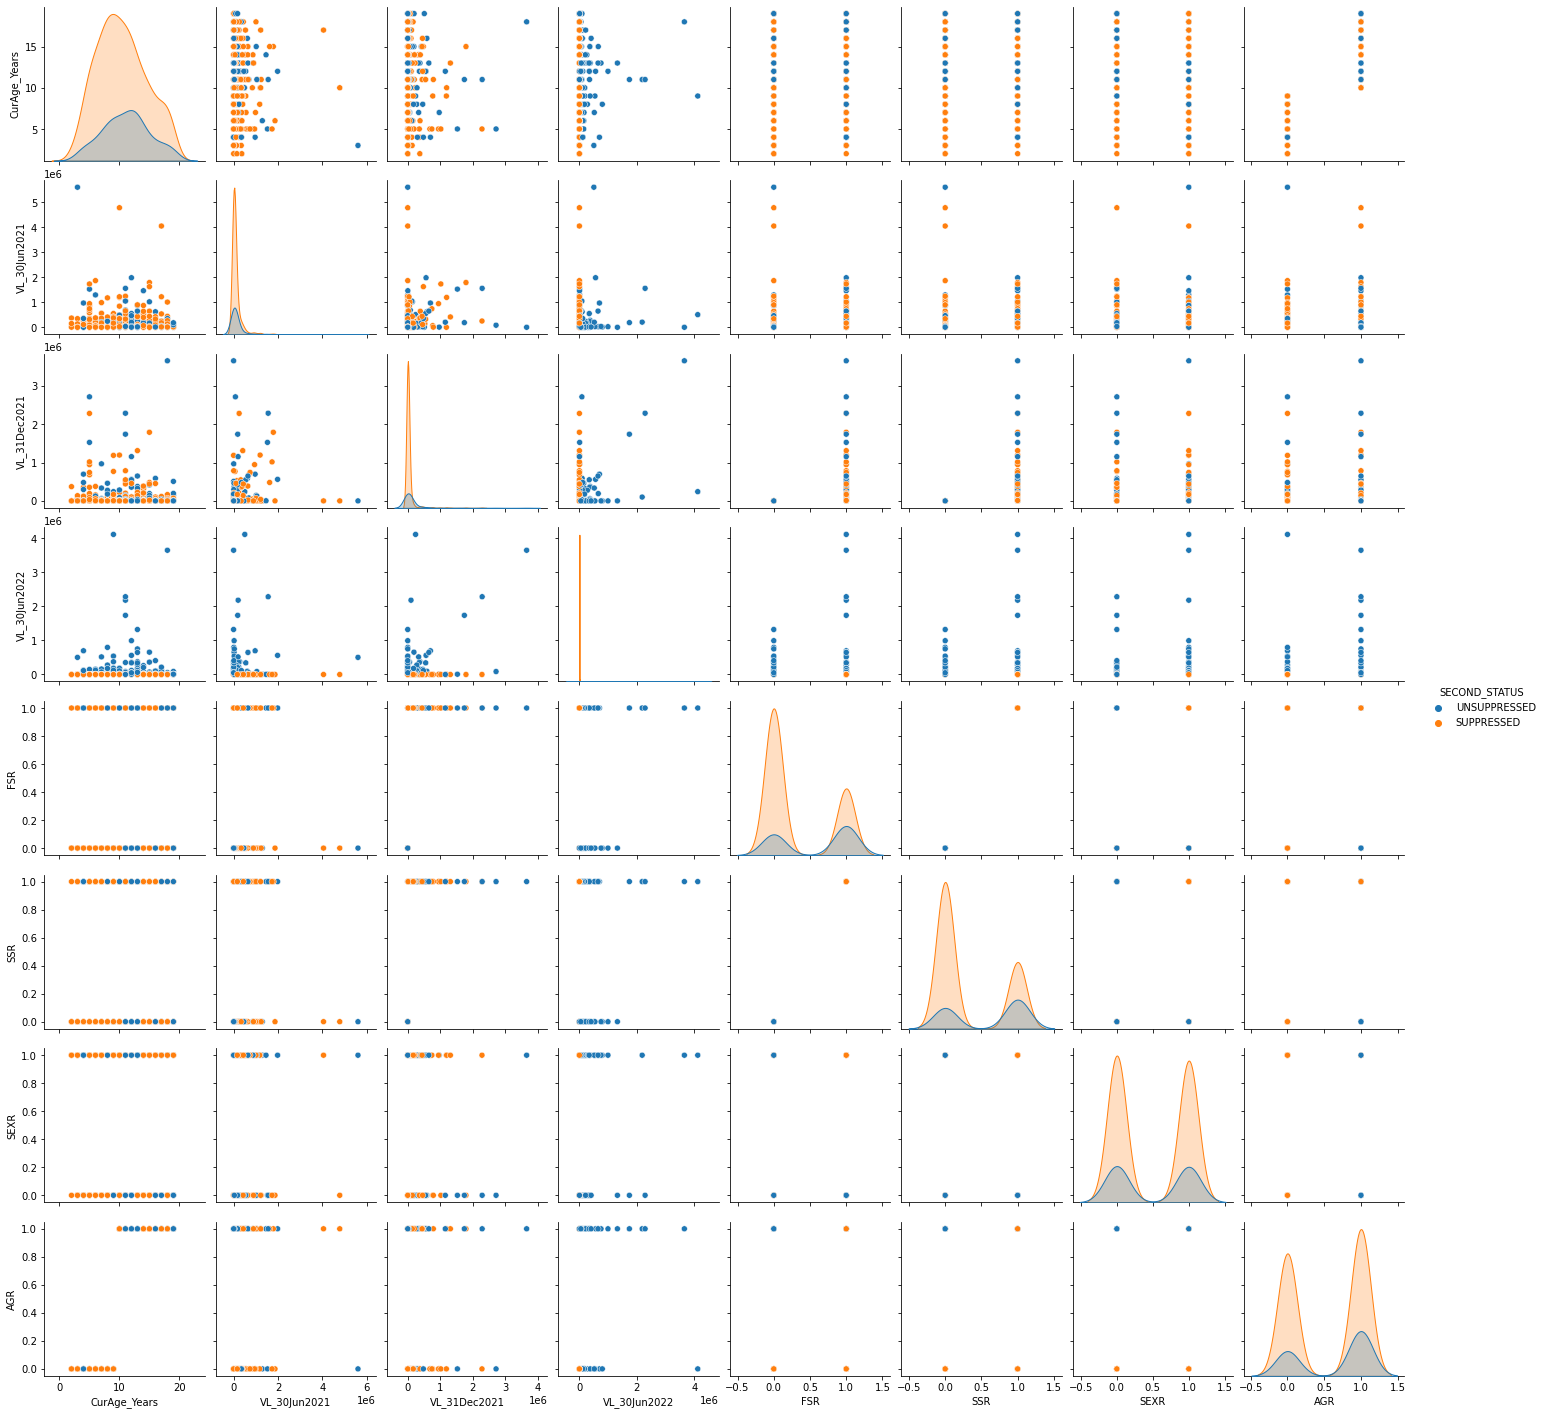

In [ ]:
#pair plot of second viral load
sns.pairplot(df2, hue="SECOND_STATUS")

Text(0.5, 1.0, 'SUPPRESSION VS UNSUPPRESSION SIX MONTHS AFTER TLD START PER QUATER')

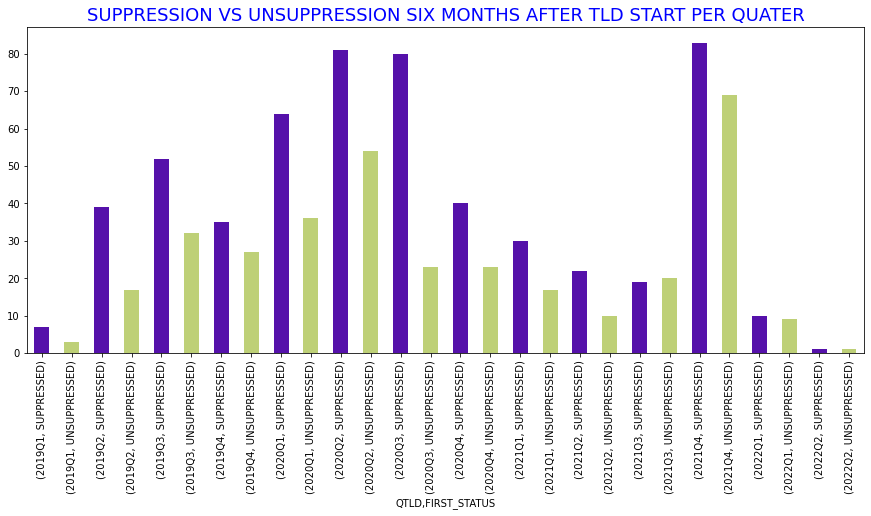

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby(['QTLD', 'FIRST_STATUS']).size().plot(kind='bar', color=["#5511aa", "#bed077"])
plt.title('SUPPRESSION VS UNSUPPRESSION SIX MONTHS AFTER TLD START PER QUATER', color='b', font = 'bold', fontsize=18)

Text(0.5, 1.0, 'SUPPRESSION VS UNSUPPRESSION ONE YEAR AFTER TLD START PER QUATER')

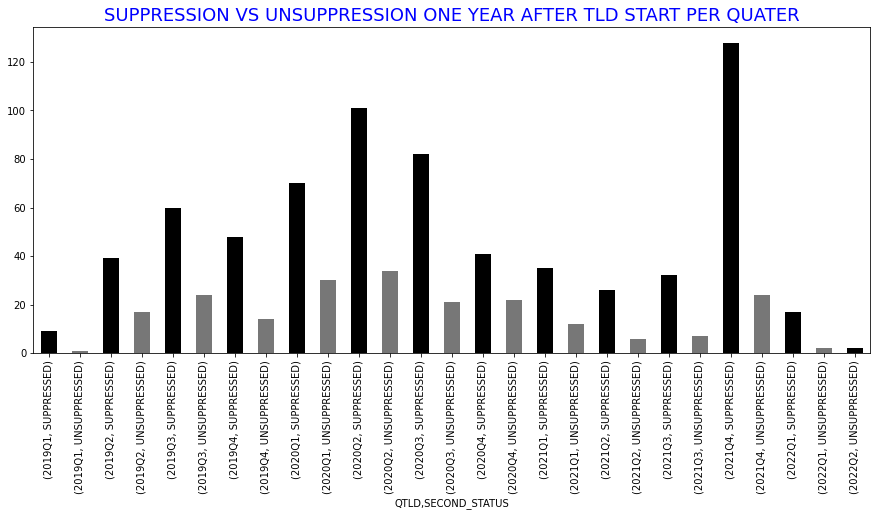

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby(['QTLD', 'SECOND_STATUS']).size().plot(kind='bar', color=["#000000", "#777777"])
plt.title('SUPPRESSION VS UNSUPPRESSION ONE YEAR AFTER TLD START PER QUATER', color='b', font = 'bold', fontsize=18)

Text(0.5, 1.0, 'AGE GROUP & SEX SUPPRESSION VS UNSUPPRESSION ONE YEAR AFTER ON TLD START')

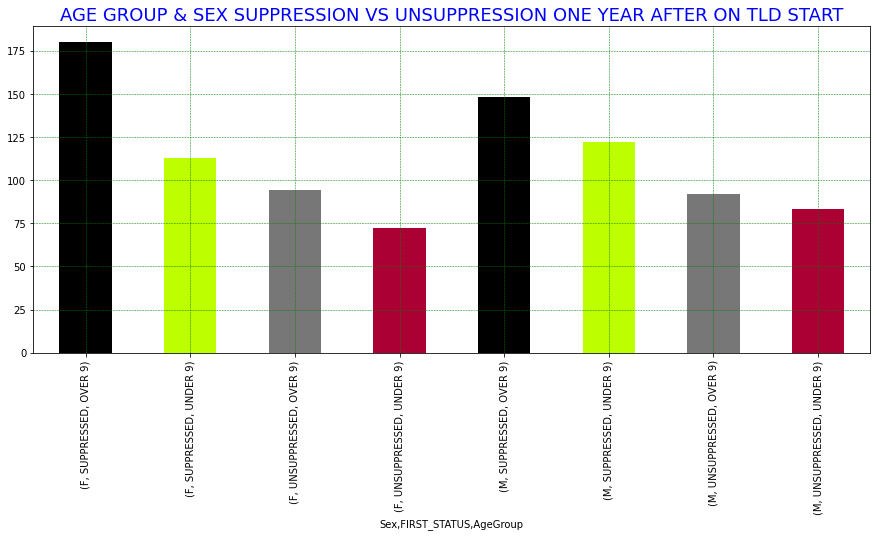

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby(['Sex', 'FIRST_STATUS', "AgeGroup"]).size().plot(kind='bar', color=["#000000", "#bdfe00", "#777777", "#aa0033"])
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.title('AGE GROUP & SEX SUPPRESSION VS UNSUPPRESSION ONE YEAR AFTER ON TLD START', color='b', fontsize=18)

Text(0.5, 1.0, 'AGE GROUP & SEX SUPPRESSION VS UNSUPPRESSION ONE YEAR AFTER ON TLD START')

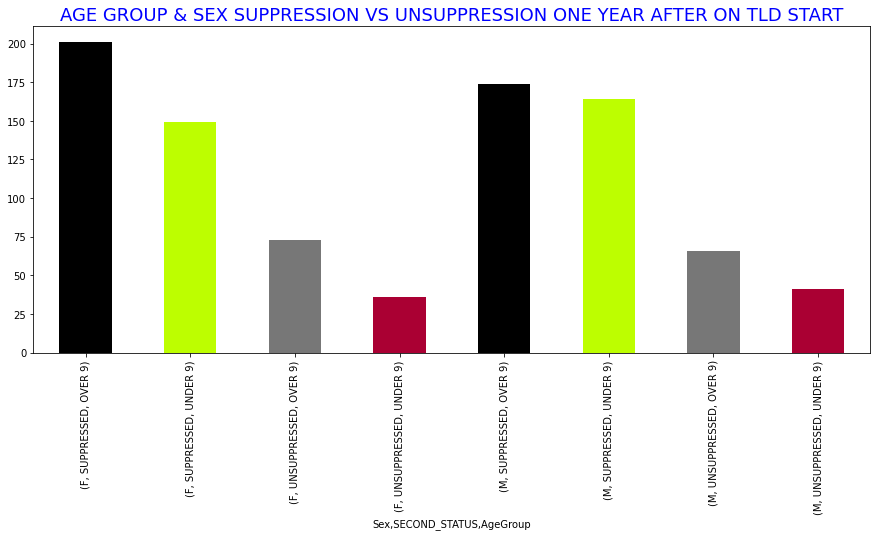

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby(['Sex', 'SECOND_STATUS', "AgeGroup"]).size().plot(kind='bar', color=["#000000", "#bdfe00", "#777777", "#aa0033"])
plt.title('AGE GROUP & SEX SUPPRESSION VS UNSUPPRESSION ONE YEAR AFTER ON TLD START', color='b', font = 'bold', fontsize=18)

Text(0.5, 1.0, 'TOTAL NUMBER CLIENTS ON EACH REGIMEN')

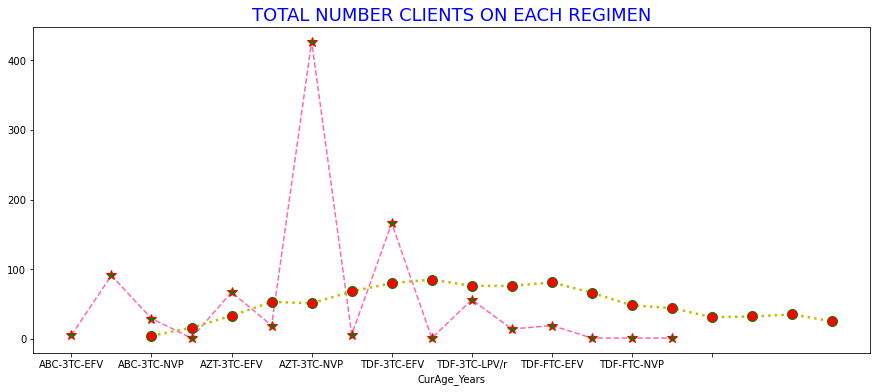

In [ ]:

plt.figure(figsize = (15,6))
df2.groupby('RegimenAtARTStart' ).size().plot (marker = '*', ms = 10, mec = 'r', mfc = 'g', ls = '--',
                                               c = 'hotpink', linewidth = '1.5')
df2.groupby('CurAge_Years').size().plot (marker = 'o', ms = 10, mec = 'g', mfc = 'r', ls = ':',
                                               c = 'y', linewidth = '2.5')
plt.title('TOTAL NUMBER CLIENTS ON EACH REGIMEN', color='b', font = 'bold', fontsize=18)

Text(0.5, 1.0, 'BARCHART SHOWING THE TOTAL NUMBER OF CLIENTS PER SEX ON EACH REGIMEN ')

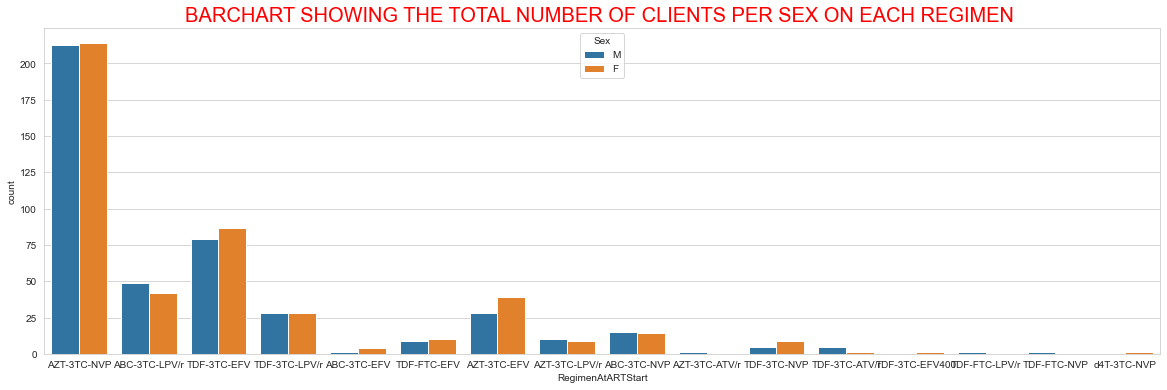

In [ ]:
plt.figure(figsize = (20,6))
sns.set_style('whitegrid')
sns.countplot(x='RegimenAtARTStart',hue='Sex',data=df2)
plt.title('BARCHART SHOWING THE TOTAL NUMBER OF CLIENTS PER SEX ON EACH REGIMEN ', color='r', fontsize=20)

Text(0.5, 1.0, 'SHOWING AGE DISTRIBUTION')

findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.


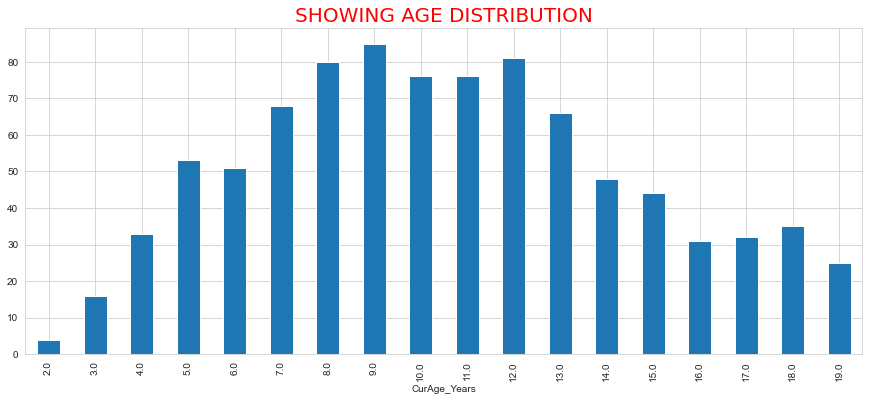

In [ ]:
plt.figure(figsize = (15,6))
df1.groupby(df2['CurAge_Years']).size().plot(kind = 'bar')
plt.title('SHOWING AGE DISTRIBUTION', color='r', font = 'bold', fontsize=20)

Text(0.5, 1.0, 'SHOWING SEX DISTRIBUTION')

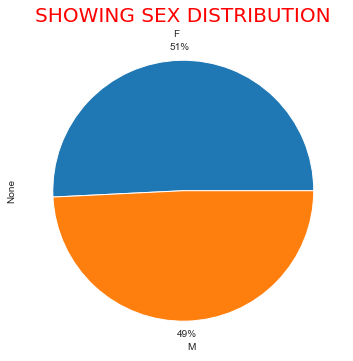

In [ ]:
plt.figure(figsize = (10,6))
df1.groupby(df2['Sex']).size().plot(kind = 'pie', autopct='%1.0f%%', 
                                                                      pctdistance=1.1, labeldistance=1.2)
plt.title('SHOWING SEX DISTRIBUTION', color='r', font = 'bold', fontsize=20)

Text(0.5, 1.0, 'SHOWING STATUS BASED ON SEX AFTER 6 MONTHS')

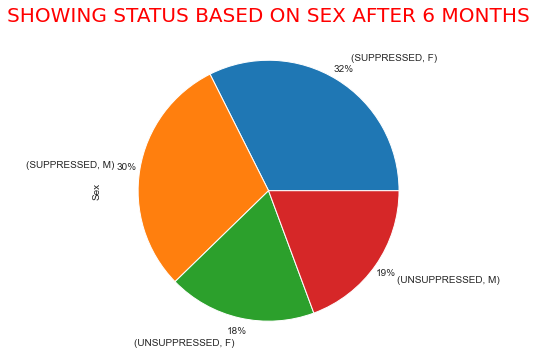

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby(['FIRST_STATUS','Sex'])['Sex'].count().plot(kind = 'pie', autopct='%1.0f%%', 
                                                                      pctdistance=1.1, labeldistance=1.2)
plt.title('SHOWING STATUS BASED ON SEX AFTER 6 MONTHS', color='r', font = 'bold', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION BASED ON SEX AFTER ONE YEAR')

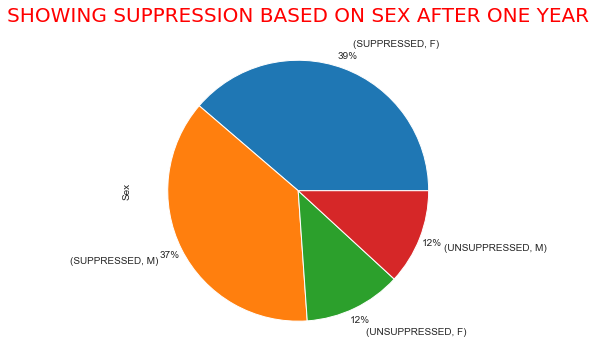

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby(['SECOND_STATUS','Sex'])['Sex'].count().plot(kind = 'pie', autopct='%0.0f%%', 
                                                                      pctdistance=1.1, labeldistance=1.2)
plt.title('SHOWING SUPPRESSION BASED ON SEX AFTER ONE YEAR', color='r', font = 'bold', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION BASED ON SEX AFTER SIX MONTHS AND REMAINED AFTER ONE YEAR')

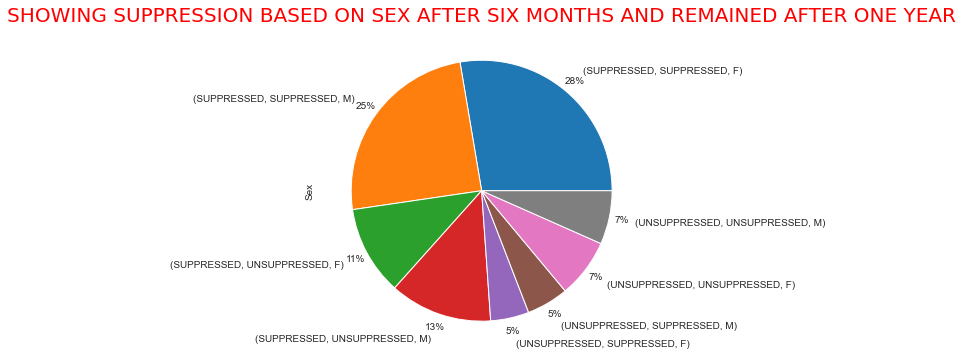

In [ ]:
plt.figure(figsize = (15,6))
df2.groupby(['SECOND_STATUS','FIRST_STATUS', 'Sex'])['Sex'].count().plot(kind = 'pie', autopct='%1.0f%%', 
                                                                      pctdistance=1.1, labeldistance=1.2)
plt.title('SHOWING SUPPRESSION BASED ON SEX AFTER SIX MONTHS AND REMAINED AFTER ONE YEAR', color='r', 
          font = 'bold', fontsize=20)

<AxesSubplot:xlabel='QStart', ylabel='count'>

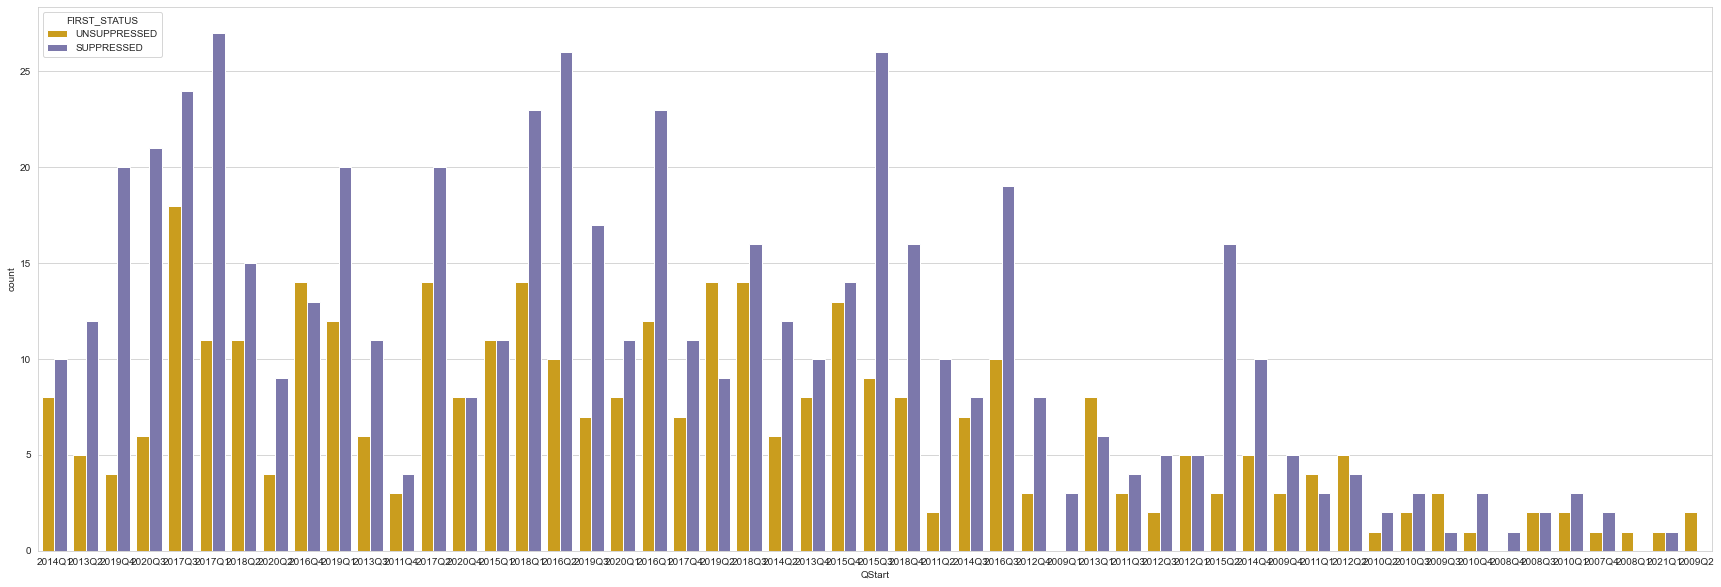

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x = 'QStart' ,  hue = 'FIRST_STATUS', data = df2, palette='Dark2_r')

<AxesSubplot:xlabel='QStart', ylabel='count'>

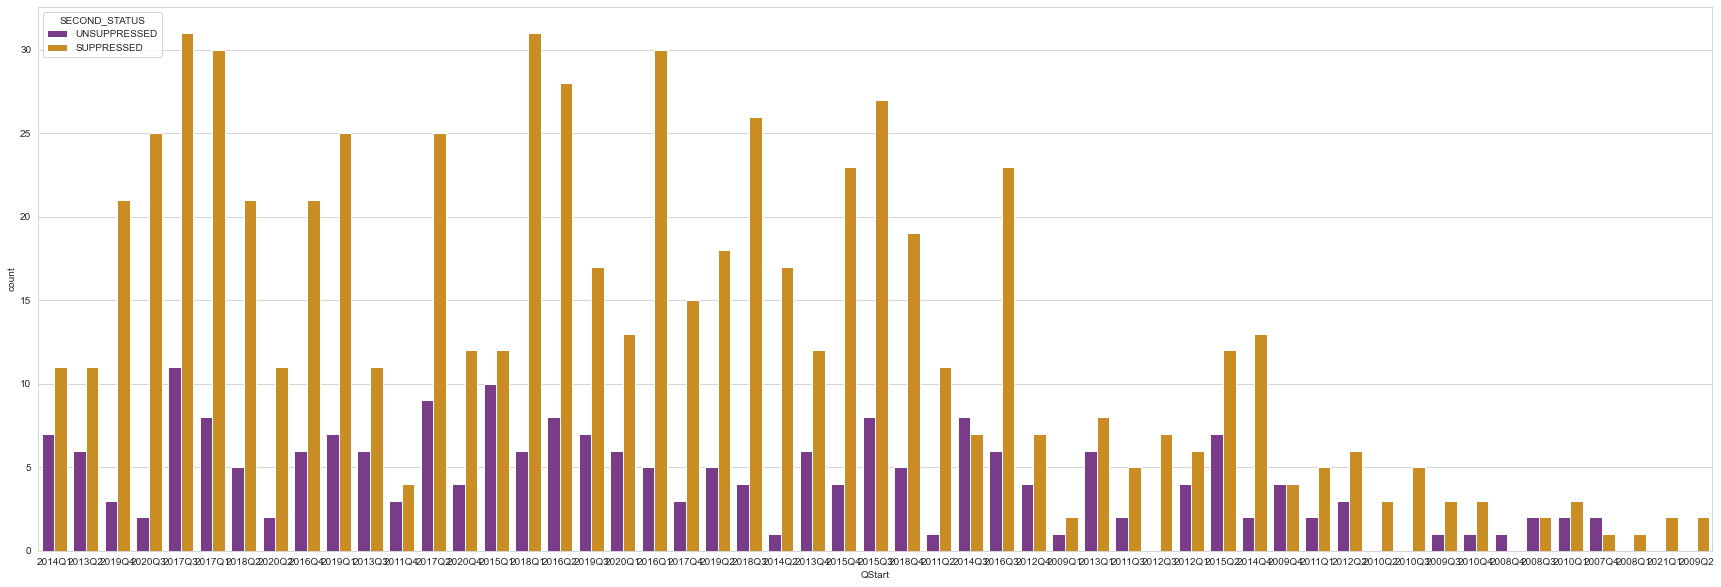

In [ ]:
plt.figure(figsize = (30,10))
sns.countplot(x = 'QStart' ,  hue = 'SECOND_STATUS', data = df2, palette='CMRmap')

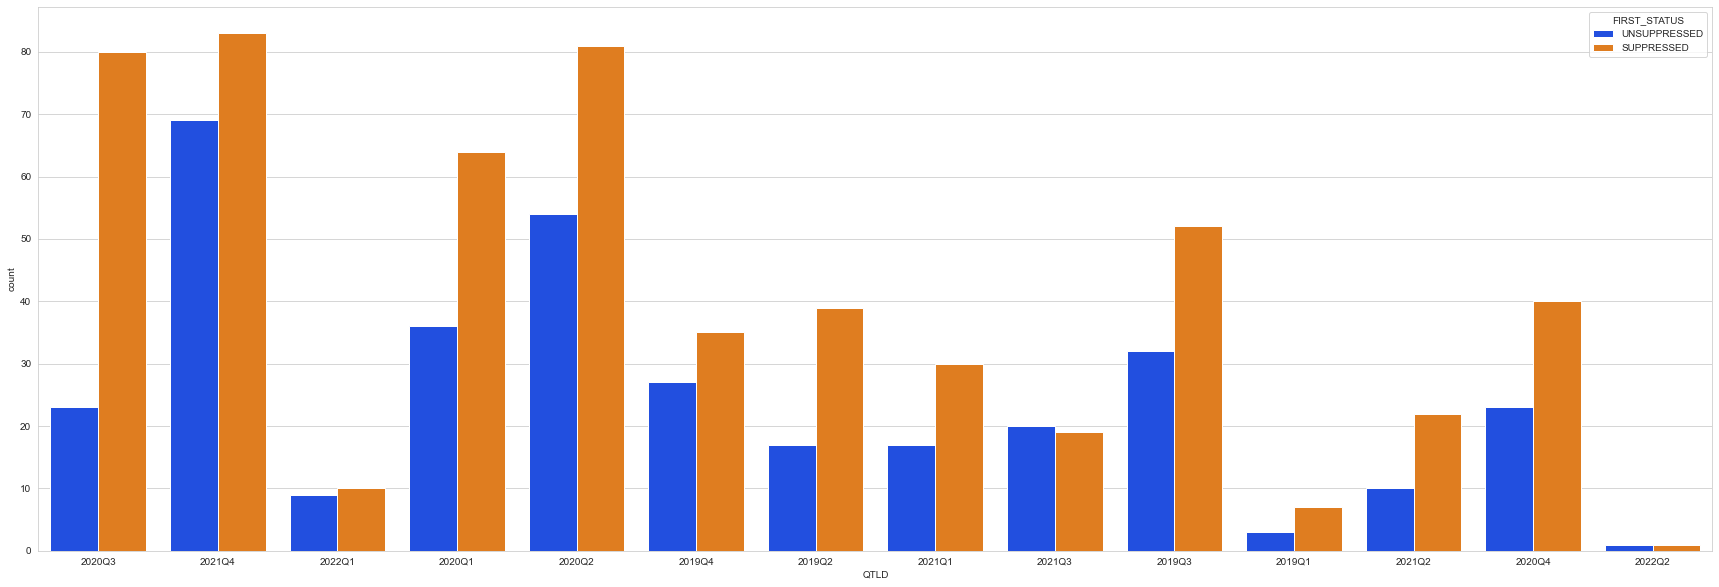

In [ ]:
plt.figure(figsize = (30,10))
ap = sns.countplot(x = 'QTLD' ,  hue = 'FIRST_STATUS', data = df2, palette='bright')

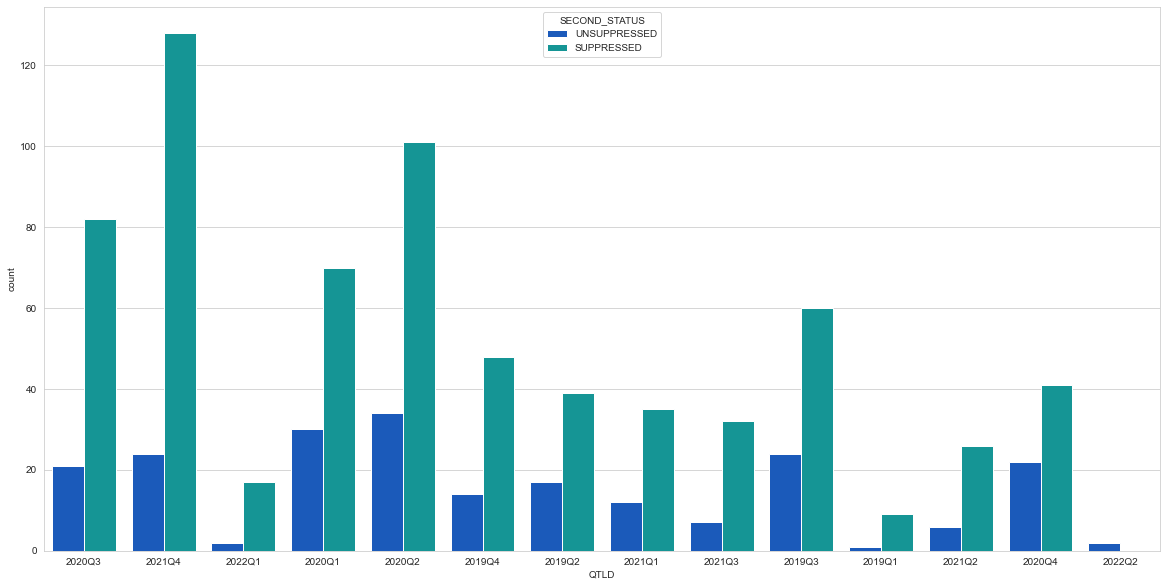

In [ ]:
plt.figure(figsize = (20,10))
ab = sns.countplot(x = 'QTLD' ,  hue = 'SECOND_STATUS', data = df2, palette='winter')

Text(0.5, 1.0, 'SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON REGIMEN AFTER SIX MONTHS')

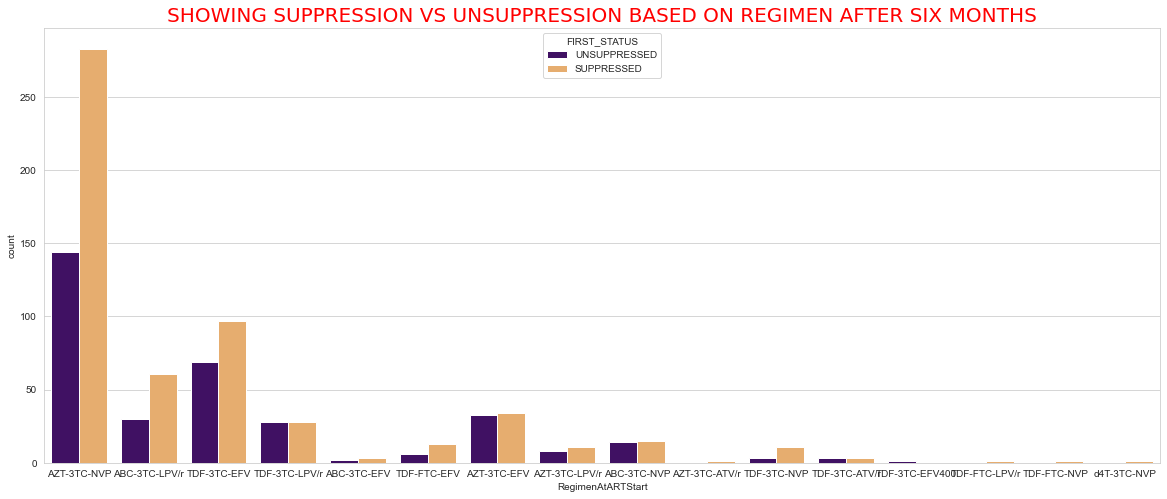

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'RegimenAtARTStart' ,  hue = 'FIRST_STATUS', data = df2, palette=['#420371',"#FAAE5B"])
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON REGIMEN AFTER SIX MONTHS', color='r', font = 'bold', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON REGIMEN AFTER ONE YEAR')

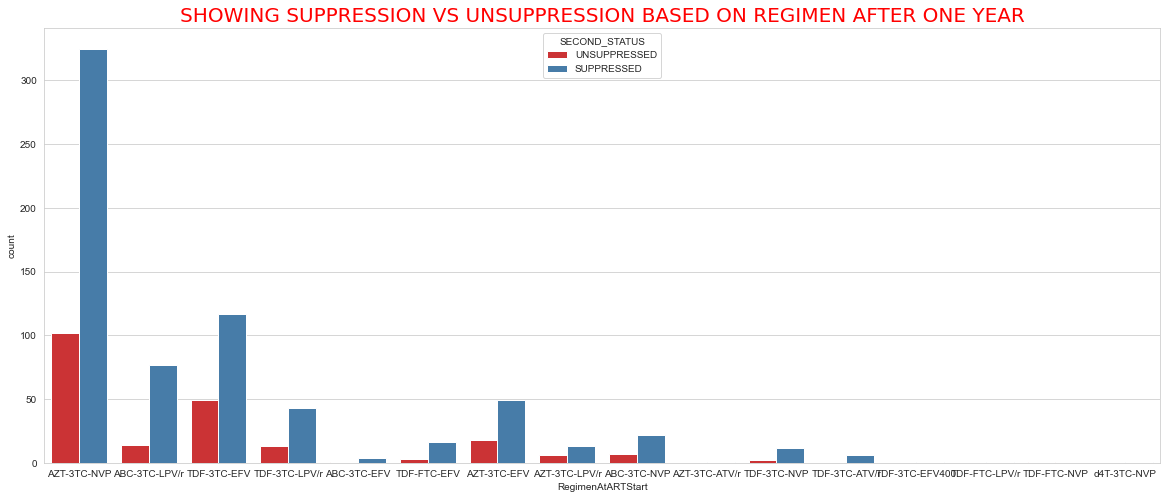

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x = 'RegimenAtARTStart' ,  hue = 'SECOND_STATUS', data = df2, palette='Set1')
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON REGIMEN AFTER ONE YEAR', color='r', font = 'bold', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER ONE YEAR')

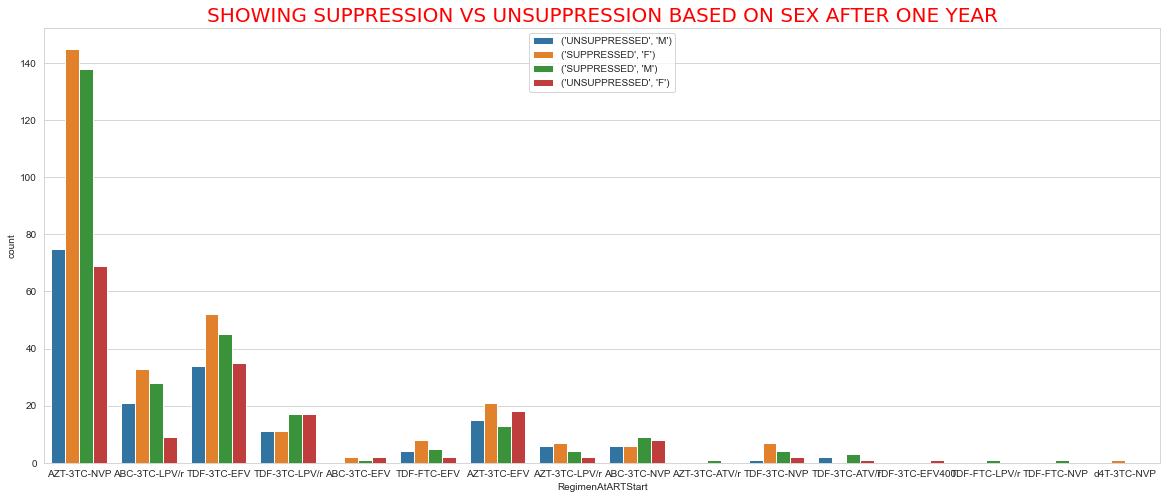

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x ='RegimenAtARTStart', data=df2,
            hue=df2[['FIRST_STATUS', 'Sex']].apply(tuple, axis=1))
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER ONE YEAR', color='r', font = 'bold', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER 6 MONTHS ON TLD')

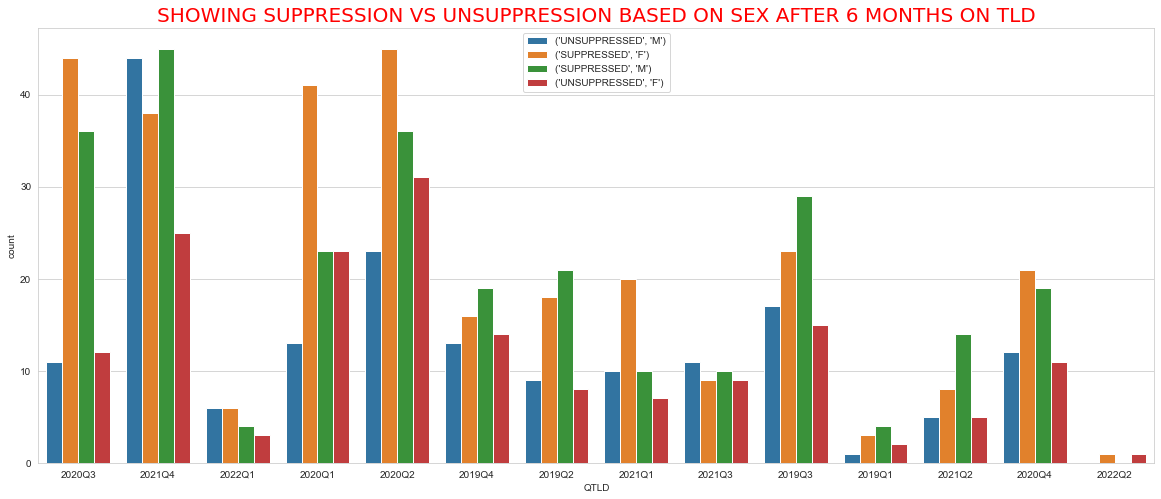

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x ='QTLD', data=df2,
            hue=df2[['FIRST_STATUS', 'Sex']].apply(tuple, axis=1))
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER 6 MONTHS ON TLD', color='r', font = 'bold', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER 6 MONTHS ON TLD')

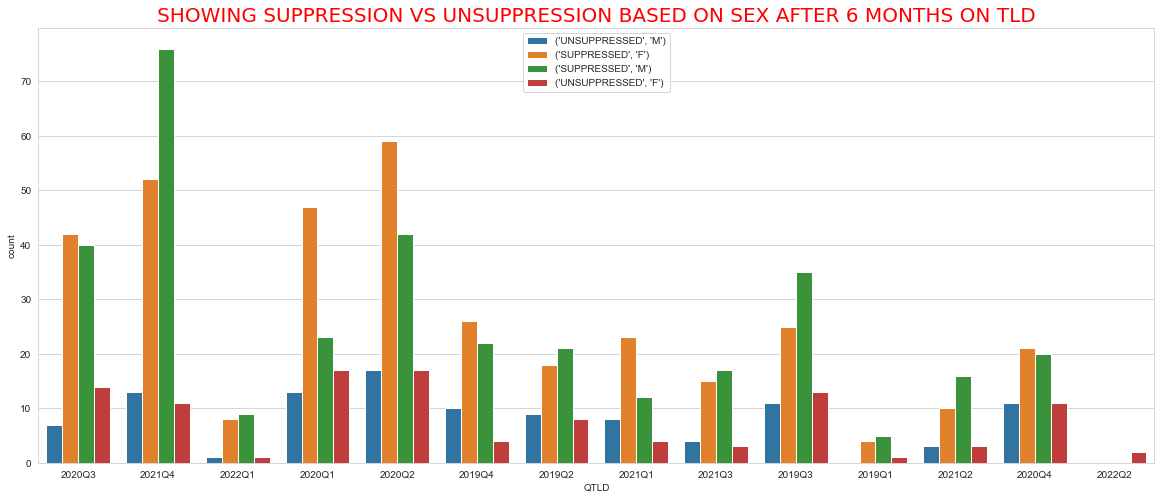

In [ ]:
plt.figure(figsize = (20, 8))
ab = sns.countplot(x ='QTLD', data=df2,
            hue=df2[['SECOND_STATUS', 'Sex']].apply(tuple, axis=1))
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER 6 MONTHS ON TLD', color='r', font = 'bold', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER ONE YEAR')

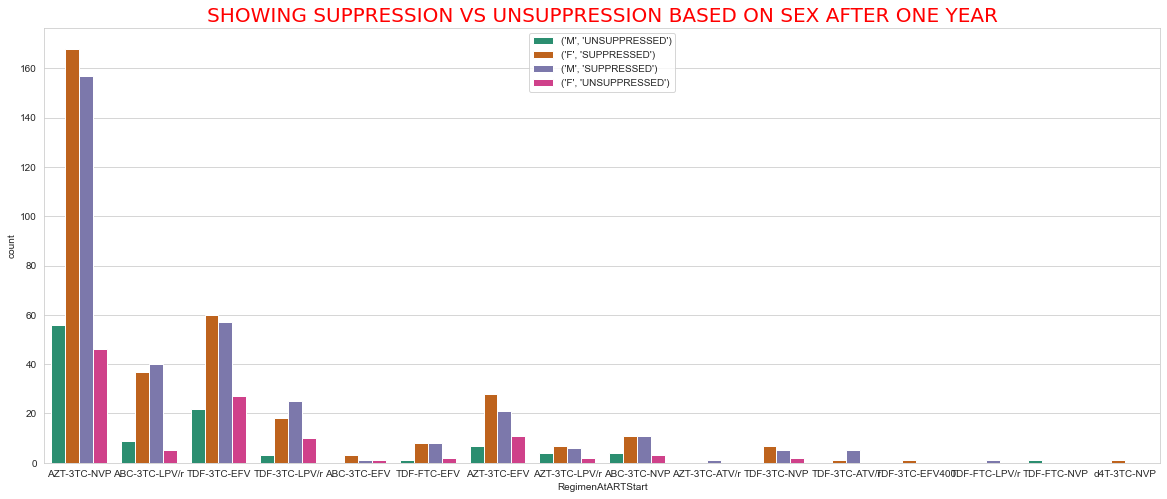

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x ='RegimenAtARTStart', data=df2,
            hue=df2[['Sex', 'SECOND_STATUS']].apply(tuple, axis=1), palette='Dark2')
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX AFTER ONE YEAR', color='r', font = 'bold', fontsize=20)

Text(0.5, 1.0, 'REGIMEN AT START BASED ON SEX')

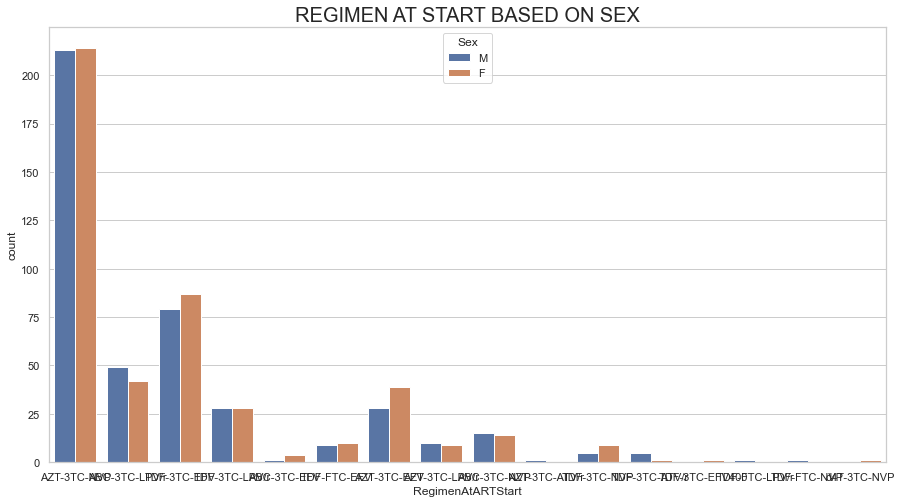

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,8))
sns.countplot(x="RegimenAtARTStart", hue="Sex", data=df2)
plt.title('REGIMEN AT START BASED ON SEX', fontsize=20)

Text(0.5, 1.0, 'SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX & AGE AFTER ONE YEAR')

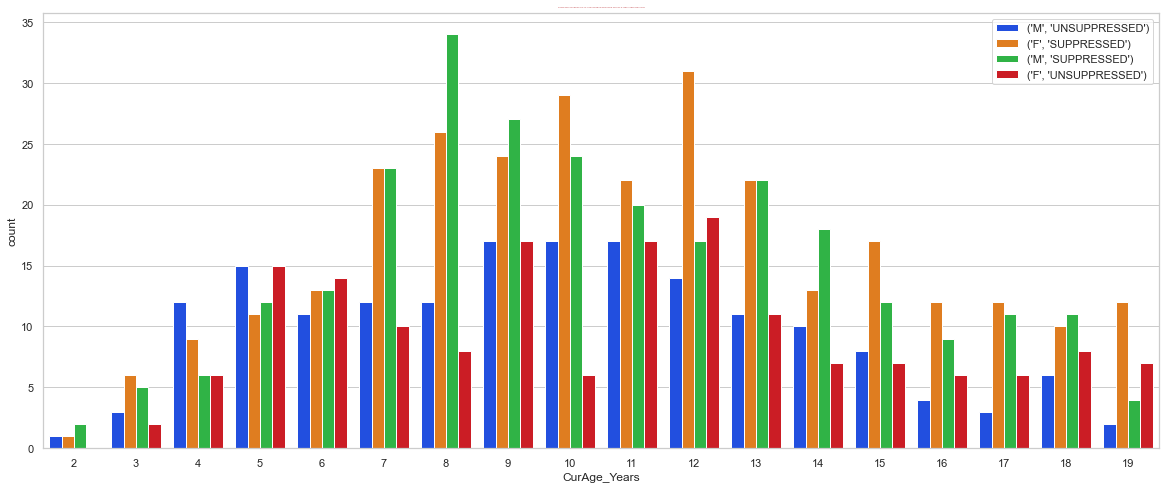

In [ ]:
plt.figure(figsize = (20, 8))
sns.countplot(x ='CurAge_Years', data=df2,
            hue=df2[['Sex', 'FIRST_STATUS']].apply(tuple, axis=1), palette='bright')
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX & AGE AFTER ONE YEAR', color='r', fontsize=2)

Text(0.5, 1.0, 'SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX & AGE AFTER ONE YEAR')

findfont: Font family ['bold'] not found. Falling back to DejaVu Sans.


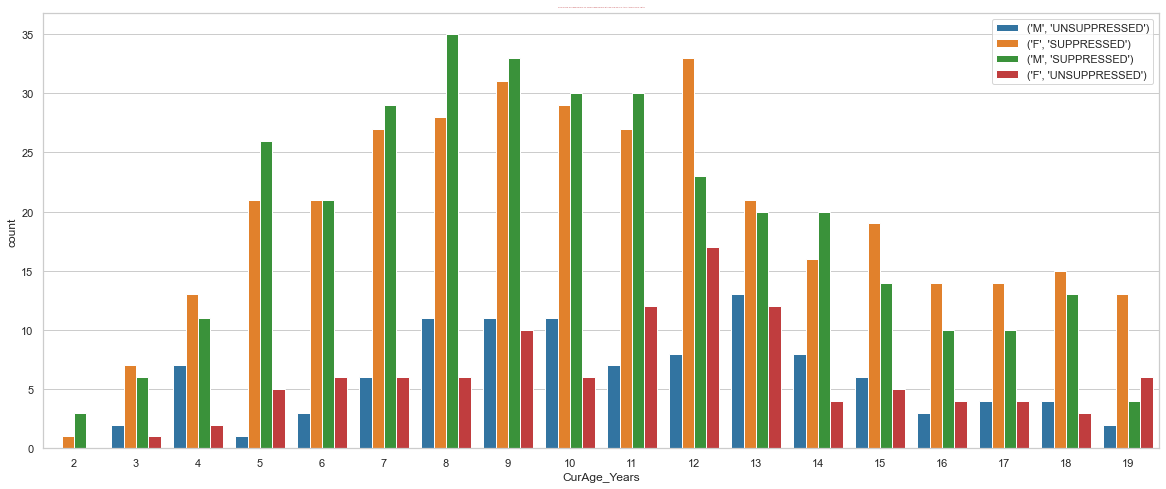

In [ ]:
plt.figure(figsize = (20, 8))
af = sns.countplot(x ='CurAge_Years', data=df2,
            hue=df2[['Sex', 'SECOND_STATUS']].apply(tuple, axis=1), palette='tab10')
plt.title('SHOWING SUPPRESSION VS UNSUPPRESSION BASED ON SEX & AGE AFTER ONE YEAR', color='r', font = 'bold', fontsize=2)

Text(0.5, 1.0, 'SHOWING SUPPRESSION BASED ON SEX AFTER SIX MONTHS AND REMAINED AFTER ONE YEAR')

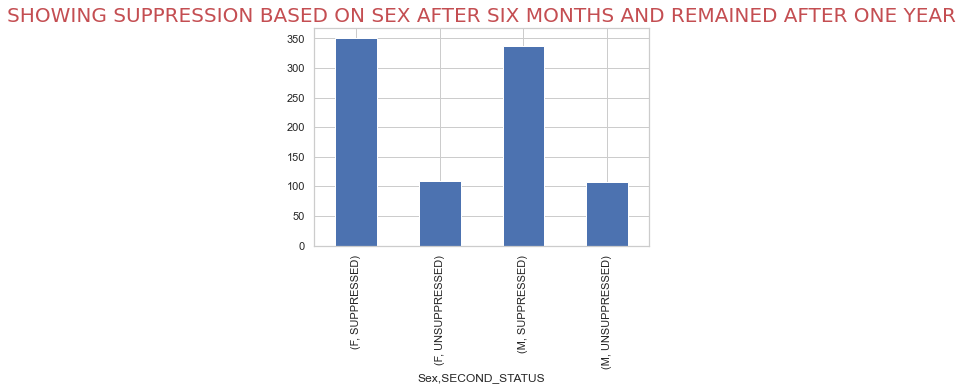

In [ ]:
df2.groupby(['Sex','SECOND_STATUS'])['RegimenAtARTStart'].count().plot(kind='bar')
plt.title('SHOWING SUPPRESSION BASED ON SEX AFTER SIX MONTHS AND REMAINED AFTER ONE YEAR', color='r', 
          font = 'bold', fontsize=20)

In [ ]:
# Using GroupBy multiple column
df2.groupby(['FirstTLD_Pickup','FIRST_STATUS', "Sex"])['SECOND_STATUS'].describe()

count unique         top freq
FirstTLD_Pickup FIRST_STATUS Sex                              
ABC-3TC-DTG     SUPPRESSED   F     218      2  SUPPRESSED  187
                             M     206      2  SUPPRESSED  171
                UNSUPPRESSED F     116      2  SUPPRESSED   73
                             M     138      2  SUPPRESSED   91
TDF-3TC-DTG     SUPPRESSED   F      75      2  SUPPRESSED   63
                             M      64      2  SUPPRESSED   52
                UNSUPPRESSED F      50      2  SUPPRESSED   27
                             M      37      2  SUPPRESSED   24

In [ ]:
# Using GroupBy multiple column
df2.groupby(['FirstTLD_Pickup','SECOND_STATUS', 'Sex'])['Sex'].count()

FirstTLD_Pickup  SECOND_STATUS  Sex
ABC-3TC-DTG      SUPPRESSED     F      260
                                M      262
                 UNSUPPRESSED   F       74
                                M       82
TDF-3TC-DTG      SUPPRESSED     F       90
                                M       76
                 UNSUPPRESSED   F       35
                                M       25
Name: Sex, dtype: int64

In [ ]:
# Using GroupBy multiple column
df2.groupby(['RegimenAtARTStart','Sex', 'SECOND_STATUS'])['Sex'].count()

RegimenAtARTStart  Sex  SECOND_STATUS
ABC-3TC-EFV        F    SUPPRESSED         3
                        UNSUPPRESSED       1
                   M    SUPPRESSED         1
ABC-3TC-LPV/r      F    SUPPRESSED        37
                        UNSUPPRESSED       5
                   M    SUPPRESSED        40
                        UNSUPPRESSED       9
ABC-3TC-NVP        F    SUPPRESSED        11
                        UNSUPPRESSED       3
                   M    SUPPRESSED        11
                        UNSUPPRESSED       4
AZT-3TC-ATV/r      M    SUPPRESSED         1
AZT-3TC-EFV        F    SUPPRESSED        28
                        UNSUPPRESSED      11
                   M    SUPPRESSED        21
                        UNSUPPRESSED       7
AZT-3TC-LPV/r      F    SUPPRESSED         7
                        UNSUPPRESSED       2
                   M    SUPPRESSED         6
                        UNSUPPRESSED       4
AZT-3TC-NVP        F    SUPPRESSED       168
                 

In [ ]:
# Using GroupBy multiple column
df2.groupby(['RegimenAtARTStart','Sex','SECOND_STATUS'])['Sex'].describe()

count unique top freq
RegimenAtARTStart Sex SECOND_STATUS                      
ABC-3TC-EFV       F   SUPPRESSED        3      1   F    3
                      UNSUPPRESSED      1      1   F    1
                  M   SUPPRESSED        1      1   M    1
ABC-3TC-LPV/r     F   SUPPRESSED       37      1   F   37
                      UNSUPPRESSED      5      1   F    5
                  M   SUPPRESSED       40      1   M   40
                      UNSUPPRESSED      9      1   M    9
ABC-3TC-NVP       F   SUPPRESSED       11      1   F   11
                      UNSUPPRESSED      3      1   F    3
                  M   SUPPRESSED       11      1   M   11
                      UNSUPPRESSED      4      1   M    4
AZT-3TC-ATV/r     M   SUPPRESSED        1      1   M    1
AZT-3TC-EFV       F   SUPPRESSED       28      1   F   28
                      UNSUPPRESSED     11      1   F   11
                  M   SUPPRESSED       21      1   M   21
                      UNSUPPRESSED      7      1   M    7
AZT-3TC-LPV/r     F   SUPPRESSED        7      1   F    7
                      UNSUPPRESSED      2      1   F    2
                  M   SUPPRESSED        6      1   M    6
                      UNSUPPRESSED      4      1   M    4
AZT-3TC-NVP       F   SUPPRESSED      168      1   F  168
                      UNSUPPRESSED     46      1   F   46
                  M   SUPPRESSED      157      1   M  157
                      UNSUPPRESSED     56      1   M   56
TDF-3TC-ATV/r     F   SUPPRESSED        1      1   F    1
                  M   SUPPRESSED        5      1   M    5
TDF-3TC-EFV       F   SUPPRESSED       60      1   F   60
                      UNSUPPRESSED     27      1   F   27
                  M   SUPPRESSED       57      1   M   57
                      UNSUPPRESSED     22      1   M   22
TDF-3TC-EFV400    F   SUPPRESSED        1      1   F    1
TDF-3TC-LPV/r     F   SUPPRESSED       18      1   F   18
                      UNSUPPRESSED     10      1   F   10
                  M   SUPPRESSED       25      1   M   25
                      UNSUPPRESSED      3      1   M    3
TDF-3TC-NVP       F   SUPPRESSED        7      1   F    7
                      UNSUPPRESSED      2      1   F    2
                  M   SUPPRESSED        5      1   M    5
TDF-FTC-EFV       F   SUPPRESSED        8      1   F    8
                      UNSUPPRESSED      2      1   F    2
                  M   SUPPRESSED        8      1   M    8
                      UNSUPPRESSED      1      1   M    1
TDF-FTC-LPV/r     M   SUPPRESSED        1      1   M    1
TDF-FTC-NVP       M   UNSUPPRESSED      1      1   M    1
d4T-3TC-NVP       F   SUPPRESSED        1      1   F    1

In [ ]:
df2.groupby(['Sex', 'AgeGroup', 'FIRST_STATUS'])['FIRST_STATUS'].count()/len(df2)*100

Sex  AgeGroup  FIRST_STATUS
F    OVER 9    SUPPRESSED      19.911504
               UNSUPPRESSED    10.398230
     UNDER 9   SUPPRESSED      12.500000
               UNSUPPRESSED     7.964602
M    OVER 9    SUPPRESSED      16.371681
               UNSUPPRESSED    10.176991
     UNDER 9   SUPPRESSED      13.495575
               UNSUPPRESSED     9.181416
Name: FIRST_STATUS, dtype: float64

In [ ]:
# Using GroupBy multiple column
df2.groupby(['RegimenAtARTStart','Sex', 'FIRST_STATUS'])['Sex'].describe()

count unique top freq
RegimenAtARTStart Sex FIRST_STATUS                      
ABC-3TC-EFV       F   SUPPRESSED       2      1   F    2
                      UNSUPPRESSED     2      1   F    2
                  M   SUPPRESSED       1      1   M    1
ABC-3TC-LPV/r     F   SUPPRESSED      33      1   F   33
                      UNSUPPRESSED     9      1   F    9
                  M   SUPPRESSED      28      1   M   28
                      UNSUPPRESSED    21      1   M   21
ABC-3TC-NVP       F   SUPPRESSED       6      1   F    6
                      UNSUPPRESSED     8      1   F    8
                  M   SUPPRESSED       9      1   M    9
                      UNSUPPRESSED     6      1   M    6
AZT-3TC-ATV/r     M   SUPPRESSED       1      1   M    1
AZT-3TC-EFV       F   SUPPRESSED      21      1   F   21
                      UNSUPPRESSED    18      1   F   18
                  M   SUPPRESSED      13      1   M   13
                      UNSUPPRESSED    15      1   M   15
AZT-3TC-LPV/r     F   SUPPRESSED       7      1   F    7
                      UNSUPPRESSED     2      1   F    2
                  M   SUPPRESSED       4      1   M    4
                      UNSUPPRESSED     6      1   M    6
AZT-3TC-NVP       F   SUPPRESSED     145      1   F  145
                      UNSUPPRESSED    69      1   F   69
                  M   SUPPRESSED     138      1   M  138
                      UNSUPPRESSED    75      1   M   75
TDF-3TC-ATV/r     F   UNSUPPRESSED     1      1   F    1
                  M   SUPPRESSED       3      1   M    3
                      UNSUPPRESSED     2      1   M    2
TDF-3TC-EFV       F   SUPPRESSED      52      1   F   52
                      UNSUPPRESSED    35      1   F   35
                  M   SUPPRESSED      45      1   M   45
                      UNSUPPRESSED    34      1   M   34
TDF-3TC-EFV400    F   UNSUPPRESSED     1      1   F    1
TDF-3TC-LPV/r     F   SUPPRESSED      11      1   F   11
                      UNSUPPRESSED    17      1   F   17
                  M   SUPPRESSED      17      1   M   17
                      UNSUPPRESSED    11      1   M   11
TDF-3TC-NVP       F   SUPPRESSED       7      1   F    7
                      UNSUPPRESSED     2      1   F    2
                  M   SUPPRESSED       4      1   M    4
                      UNSUPPRESSED     1      1   M    1
TDF-FTC-EFV       F   SUPPRESSED       8      1   F    8
                      UNSUPPRESSED     2      1   F    2
                  M   SUPPRESSED       5      1   M    5
                      UNSUPPRESSED     4      1   M    4
TDF-FTC-LPV/r     M   SUPPRESSED       1      1   M    1
TDF-FTC-NVP       M   SUPPRESSED       1      1   M    1
d4T-3TC-NVP       F   SUPPRESSED       1      1   F    1

In [ ]:
df2.groupby(['FIRST_STATUS', "Sex", ])["Sex"].describe()

count unique top freq
FIRST_STATUS Sex                      
SUPPRESSED   F     293      1   F  293
             M     270      1   M  270
UNSUPPRESSED F     166      1   F  166
             M     175      1   M  175

In [ ]:
df2.groupby(['SECOND_STATUS', "Sex"])["Sex"].describe()

count unique top freq
SECOND_STATUS Sex                      
SUPPRESSED    F     350      1   F  350
              M     338      1   M  338
UNSUPPRESSED  F     109      1   F  109
              M     107      1   M  107

In [ ]:
df2.groupby('FIRST_STATUS')["Sex"].describe()

count unique top freq
FIRST_STATUS                      
SUPPRESSED     563      2   F  293
UNSUPPRESSED   341      2   M  175

In [ ]:
df2.groupby(df2['DateDiff']/len(df2)*100)['Sex'].size()

DateDiff
0 days 00:00:00                12
3 days 02:20:10.619469          2
3 days 04:59:28.141592900       1
3 days 07:38:45.663716800       1
3 days 20:55:13.274336200       1
                               ..
493 days 00:44:36.106194600     1
493 days 06:03:11.150442400     1
497 days 05:37:41.946902600     1
509 days 22:56:16.991150400     1
522 days 10:56:16.991150400     1
Name: Sex, Length: 747, dtype: int64

Text(0.5, 1.0, '')

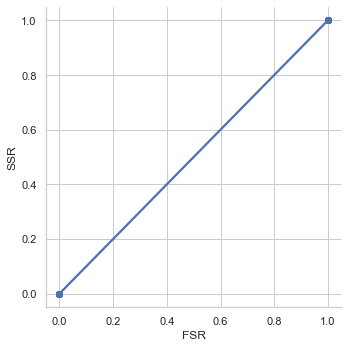

In [ ]:

sns.lmplot(x="FSR", y="SSR", data=df2, fit_reg= True)
plt.title("")

Text(0.5, 1.0, 'Internet Use Rate and Breast Cancer Per 10')

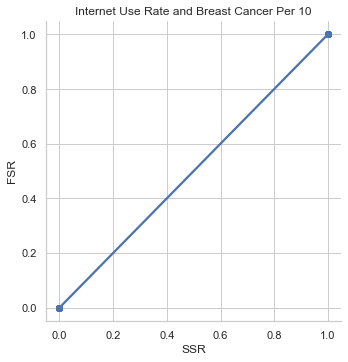

In [ ]:
sns.lmplot(x="SSR", y="FSR", data=df2, fit_reg= True)
plt.title("Internet Use Rate and Breast Cancer Per 10")

In [ ]:
df2.groupby('FSR')["SSR"].var()

FSR
0    0.0
1    0.0
Name: SSR, dtype: float64

In [ ]:
df2.groupby(['RegimenAtARTStart','Sex','SECOND_STATUS'])['SSR'].describe()

count      mean       std  min   25%  \
RegimenAtARTStart Sex SECOND_STATUS                                         
ABC-3TC-EFV       F   SUPPRESSED       3.0  0.333333  0.577350  0.0  0.00   
                      UNSUPPRESSED     1.0  1.000000       NaN  1.0  1.00   
                  M   SUPPRESSED       1.0  0.000000       NaN  0.0  0.00   
ABC-3TC-LPV/r     F   SUPPRESSED      37.0  0.162162  0.373684  0.0  0.00   
                      UNSUPPRESSED     5.0  0.600000  0.547723  0.0  0.00   
                  M   SUPPRESSED      40.0  0.375000  0.490290  0.0  0.00   
                      UNSUPPRESSED     9.0  0.666667  0.500000  0.0  0.00   
ABC-3TC-NVP       F   SUPPRESSED      11.0  0.545455  0.522233  0.0  0.00   
                      UNSUPPRESSED     3.0  0.666667  0.577350  0.0  0.50   
                  M   SUPPRESSED      11.0  0.363636  0.504525  0.0  0.00   
                      UNSUPPRESSED     4.0  0.500000  0.577350  0.0  0.00   
AZT-3TC-ATV/r     M   SUPPRESSED       1.0  0.000000       NaN  0.0  0.00   
AZT-3TC-EFV       F   SUPPRESSED      28.0  0.392857  0.497347  0.0  0.00   
                      UNSUPPRESSED    11.0  0.636364  0.504525  0.0  0.00   
                  M   SUPPRESSED      21.0  0.476190  0.511766  0.0  0.00   
                      UNSUPPRESSED     7.0  0.714286  0.487950  0.0  0.50   
AZT-3TC-LPV/r     F   SUPPRESSED       7.0  0.142857  0.377964  0.0  0.00   
                      UNSUPPRESSED     2.0  0.500000  0.707107  0.0  0.25   
                  M   SUPPRESSED       6.0  0.333333  0.516398  0.0  0.00   
                      UNSUPPRESSED     4.0  1.000000  0.000000  1.0  1.00   
AZT-3TC-NVP       F   SUPPRESSED     168.0  0.255952  0.437700  0.0  0.00   
                      UNSUPPRESSED    46.0  0.565217  0.501206  0.0  0.00   
                  M   SUPPRESSED     157.0  0.292994  0.456592  0.0  0.00   
                      UNSUPPRESSED    56.0  0.517857  0.504203  0.0  0.00   
TDF-3TC-ATV/r     F   SUPPRESSED       1.0  1.000000       NaN  1.0  1.00   
                  M   SUPPRESSED       5.0  0.400000  0.547723  0.0  0.00   
TDF-3TC-EFV       F   SUPPRESSED      60.0  0.316667  0.469102  0.0  0.00   
                      UNSUPPRESSED    27.0  0.592593  0.500712  0.0  0.00   
                  M   SUPPRESSED      57.0  0.368421  0.486664  0.0  0.00   
                      UNSUPPRESSED    22.0  0.590909  0.503236  0.0  0.00   
TDF-3TC-EFV400    F   SUPPRESSED       1.0  1.000000       NaN  1.0  1.00   
TDF-3TC-LPV/r     F   SUPPRESSED      18.0  0.500000  0.514496  0.0  0.00   
                      UNSUPPRESSED    10.0  0.800000  0.421637  0.0  1.00   
                  M   SUPPRESSED      25.0  0.400000  0.500000  0.0  0.00   
                      UNSUPPRESSED     3.0  0.333333  0.577350  0.0  0.00   
TDF-3TC-NVP       F   SUPPRESSED       7.0  0.142857  0.377964  0.0  0.00   
                      UNSUPPRESSED     2.0  0.500000  0.707107  0.0  0.25   
                  M   SUPPRESSED       5.0  0.200000  0.447214  0.0  0.00   
TDF-FTC-EFV       F   SUPPRESSED       8.0  0.125000  0.353553  0.0  0.00   
                      UNSUPPRESSED     2.0  0.500000  0.707107  0.0  0.25   
                  M   SUPPRESSED       8.0  0.500000  0.534522  0.0  0.00   
                      UNSUPPRESSED     1.0  0.000000       NaN  0.0  0.00   
TDF-FTC-LPV/r     M   SUPPRESSED       1.0  0.000000       NaN  0.0  0.00   
TDF-FTC-NVP       M   UNSUPPRESSED     1.0  0.000000       NaN  0.0  0.00   
d4T-3TC-NVP       F   SUPPRESSED       1.0  0.000000       NaN  0.0  0.00   

                                     50%   75%  max  
RegimenAtARTStart Sex SECOND_STATUS                  
ABC-3TC-EFV       F   SUPPRESSED     0.0  0.50  1.0  
                      UNSUPPRESSED   1.0  1.00  1.0  
                  M   SUPPRESSED     0.0  0.00  0.0  
ABC-3TC-LPV/r     F   SUPPRESSED     0.0  0.00  1.0  
                      UNSUPPRESSED   1.0  1.00  1.0  
                  M   SUPPRESSED     0.

In [ ]:
df2.groupby(['SEXR'])['SSR'].var()

SEXR
0    0.231365
1    0.239144
Name: SSR, dtype: float64

In [ ]:
df2.groupby([ 'SSR'])['SEXR'].var()

SSR
0    0.250027
1    0.250561
Name: SEXR, dtype: float64

In [ ]:
df2.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).describe()

CurAge_Years                                                \
                        count       mean       std   min   25%   50%    75%   
FSR SSR SEXR AGR                                                              
0   0   0    0          113.0   6.849558  1.838192   2.0   6.0   7.0   8.00   
             1          180.0  13.505556  2.793642  10.0  11.0  13.0  16.00   
        1    0          122.0   7.024590  1.788222   2.0   6.0   7.5   8.00   
             1          148.0  13.425676  2.644700  10.0  11.0  13.0  15.00   
1   1   0    0           72.0   6.611111  1.780612   3.0   5.0   6.0   8.00   
             1           94.0  13.787234  2.781940  10.0  12.0  13.0  16.00   
        1    0           83.0   6.421687  1.926202   2.0   5.0   6.0   8.00   
             1           92.0  12.923913  2.529968  10.0  11.0  12.0  14.25   

                       VL_30Jun2021                 ... VL_30Jun2022  \
                   max        count           mean  ...          75%   
FSR SSR SEXR AGR                                    ...                
0   0   0    0     9.0        113.0   66688.398230  ...        39.00   
             1    19.0        180.0  121364.516667  ...       217.50   
        1    0     9.0        122.0  125147.778689  ...        88.00   
             1    19.0        148.0  122911.689189  ...       174.00   
1   1   0    0     9.0         72.0  108104.180556  ...      5250.50   
             1    19.0         94.0  158437.414894  ...     17676.25   
        1    0     9.0         83.0  104724.566265  ...      3755.00   
             1    19.0         92.0  165443.673913  ...     16382.00   

                            DateDiff                                \
                        max    count                          mean   
FSR SSR SEXR AGR                                                     
0   0   0    0     374293.0      113  1121 days 22:30:47.787610624   
             1    1323215.0      180            1645 days 01:44:00   
        1    0     797587.0      122  1149 days 23:36:23.606557376   
             1     994568.0      148  1933 days 22:32:25.945945952   
1   1   0    0     277782.0       72            1190 days 01:20:00   
             1    2286996.0       94  1955 days 20:56:10.212765952   
        1    0    4119813.0       83  1287 days 20:49:09.397590368   
             1    3654017.0       92  1834 days 10:10:26.086956512   

                                                                   \
                                           std                min   
FSR SSR SEXR AGR                                                    
0   0   0    0     675 days 03:40:15.969054360    0 days 00:00:00   
             1    1058 days 01:33:15.846505936    0 days 00:00:00   
        1    0     665 days 07:58:58.928033688    0 days 00:00:00   
             1    1130 days 14:05:07.094354272    0 days 00:00:00   
1   1   0    0     703 days 09:27:46.090493408    0 days 00:00:00   
             1    1111 days 20:04:14.805212096  129 days 00:00:00   
        1    0     685 days 18:13:02.396542888    0 days 00:00:00   
             1    1083 days 03:20:05.206256080    0 days 00:00:00   

                                                                              \
                                 25%                 50%                 75%   
FSR SSR SEXR AGR                                                               
0   0   0    0     520 days 00:00:00  1150 days 00:00:00  1705 days 00:00:00   
             1     749 days 06:00:00  1414 days 00:00:00  2524 days 00:00:00   
        1    0     525 days 00:00:00  1131 days 12:00:00  1726 days 00:00:00   
             1    1051 days 06:00:00  1863 days 00:00:00  2733 days 00:00:00   
1   1   0    0     624 days 00:00:00  1063 days 12:00:00  1670 days 00:00:00   
             1    1080 days 18:00:00  1747 days 00:00:00  2857 days 18:00:00   
        1    0     764 days 12:00:00  1221 days 00:00:00  1860 days 00:00:00   
             1     927 

In [ ]:
df2.columns

Index(['Sex', 'ARTStartDate', 'RegimenAtARTStart', 'FirstTLD_Pickup',
       'DateofFirstTLD_Pickup', 'CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022', 'FIRST_STATUS', 'SECOND_STATUS', 'QStart', 'QTLD',
       'AgeGroup', 'DateDiff', 'FSR', 'SSR', 'SEXR', 'AGR'],
      dtype='object')

In [ ]:
df2.groupby(['FIRST_STATUS', 'SECOND_STATUS', 'AgeGroup', 'Sex']).corr()

CurAge_Years  \
FIRST_STATUS SECOND_STATUS AgeGroup Sex                              
SUPPRESSED   SUPPRESSED    OVER 9   F   CurAge_Years      1.000000   
                                        VL_30Jun2021     -0.184578   
                                        VL_31Dec2021     -0.013485   
                                        VL_30Jun2022     -0.047200   
                                        FSR                    NaN   
...                                                            ...   
UNSUPPRESSED UNSUPPRESSED  UNDER 9  M   VL_30Jun2022      0.230059   
                                        FSR                    NaN   
                                        SSR                    NaN   
                                        SEXR                   NaN   
                                        AGR                    NaN   

                                                      VL_30Jun2021  \
FIRST_STATUS SECOND_STATUS AgeGroup Sex                              
SUPPRESSED   SUPPRESSED    OVER 9   F   CurAge_Years     -0.184578   
                                        VL_30Jun2021      1.000000   
                                        VL_31Dec2021     -0.020152   
                                        VL_30Jun2022      0.032063   
                                        FSR                    NaN   
...                                                            ...   
UNSUPPRESSED UNSUPPRESSED  UNDER 9  M   VL_30Jun2022      0.522238   
                                        FSR                    NaN   
                                        SSR                    NaN   
                                        SEXR                   NaN   
                                        AGR                    NaN   

                                                      VL_31Dec2021  \
FIRST_STATUS SECOND_STATUS AgeGroup Sex                              
SUPPRESSED   SUPPRESSED    OVER 9   F   CurAge_Years     -0.013485   
                                        VL_30Jun2021     -0.020152   
                                        VL_31Dec2021      1.000000   
                                        VL_30Jun2022      0.055146   
                                        FSR                    NaN   
...                                                            ...   
UNSUPPRESSED UNSUPPRESSED  UNDER 9  M   VL_30Jun2022      0.171003   
                                        FSR                    NaN   
                                        SSR                    NaN   
                                        SEXR                   NaN   
                                        AGR                    NaN   

                                                      VL_30Jun2022  FSR  SSR  \
FIRST_STATUS SECOND_STATUS AgeGroup Sex                                        
SUPPRESSED   SUPPRESSED    OVER 9   F   CurAge_Years     -0.047200  NaN  NaN   
                                        VL_30Jun2021      0.032063  NaN  NaN   
                                        VL_31Dec2021      0.055146  NaN  NaN   
                                        VL_30Jun2022      1.000000  NaN  NaN   
                                        FSR                    NaN  NaN  NaN   
...                                                            ...  ...  ...   
UNSUPPRESSED UNSUPPRESSED  UNDER 9  M   VL_30Jun2022      1.000000  NaN  NaN   
                                        FSR                    NaN  NaN  NaN   
                                        SSR                    NaN  NaN  NaN   
                                        SEXR                   NaN  NaN  NaN   
                                        AGR                    NaN  NaN  NaN   

                                                      SEXR  AGR  
FIRST_STATUS SECOND_STATUS AgeGroup Sex                          
SUPPRESSED   SUPPRESSED    OVER 9   F   CurAge_Years   NaN  NaN  
                                        VL_30Jun2021   NaN  NaN  
                

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).max()

VL_30Jun2021  VL_31Dec2021  VL_30Jun2022  FIRST_STATUS  \
FSR SSR SEXR AGR                                                           
0   0   0    0       1865629.0         905.0      374293.0    SUPPRESSED   
             1       4778593.0         949.0     1323215.0    SUPPRESSED   
        1    0       5599090.0         890.0      797587.0    SUPPRESSED   
             1       4048081.0         908.0      994568.0    SUPPRESSED   
1   1   0    0       1732676.0     2714304.0      277782.0  UNSUPPRESSED   
             1       1790000.0     2286996.0     2286996.0  UNSUPPRESSED   
        1    0        971139.0     2282114.0     4119813.0  UNSUPPRESSED   
             1       1981527.0     3654017.0     3654017.0  UNSUPPRESSED   

                 SECOND_STATUS  QStart    QTLD AgeGroup  CurAge_Years  
FSR SSR SEXR AGR                                                       
0   0   0    0    UNSUPPRESSED  2021Q1  2022Q1  UNDER 9             9  
             1    UNSUPPRESSED  2020Q3  2022Q2   OVER 9            19  
        1    0    UNSUPPRESSED  2020Q4  2022Q1  UNDER 9             9  
             1    UNSUPPRESSED  2020Q3  2021Q4   OVER 9            19  
1   1   0    0    UNSUPPRESSED  2020Q4  2022Q2  UNDER 9             9  
             1    UNSUPPRESSED  2020Q3  2021Q4   OVER 9            19  
        1    0    UNSUPPRESSED  2021Q1  2022Q1  UNDER 9             9  
             1    UNSUPPRESSED  2020Q4  2022Q1   OVER 9            19

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).std()

VL_30Jun2021   VL_31Dec2021   VL_30Jun2022  CurAge_Years
FSR SSR SEXR AGR                                                           
0   0   0    0    202350.731025     208.816656   39799.862908      1.838192
             1    404899.602829     174.243096  105578.826684      2.793642
        1    0    533789.837834     183.219453   99126.283899      1.788222
             1    363368.145406     158.934079  110088.111395      2.644700
1   1   0    0    281020.695765  387855.128350   51428.522956      1.780612
             1    341652.489795  380531.785618  299846.834538      2.781940
        1    0    213586.734736  336955.621143  471497.368530      1.926202
             1    331004.976724  428889.518540  460015.632500      2.529968

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).mean()

VL_30Jun2021   VL_31Dec2021   VL_30Jun2022  CurAge_Years
FSR SSR SEXR AGR                                                           
0   0   0    0     66688.398230      87.796460    6531.250000      6.849558
             1    121364.516667      82.027933   15851.977654     13.505556
        1    0    125147.778689      79.590164   19047.377049      7.024590
             1    122911.689189      58.837838   22231.317568     13.425676
1   1   0    0    108104.180556  126308.277778   20397.428571      6.611111
             1    158437.414894  174725.425532   70605.457447     13.787234
        1    0    104724.566265  148128.024096   79630.265823      6.421687
             1    165443.673913  151337.804348  109298.191011     12.923913

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).min()

VL_30Jun2021  VL_31Dec2021  VL_30Jun2022  FIRST_STATUS  \
FSR SSR SEXR AGR                                                           
0   0   0    0          1064.0           0.0           0.0    SUPPRESSED   
             1          1126.0           0.0           0.0    SUPPRESSED   
        1    0          1188.0           0.0           0.0    SUPPRESSED   
             1          1000.0           0.0           0.0    SUPPRESSED   
1   1   0    0          1018.0        1018.0           0.0  UNSUPPRESSED   
             1          1011.0        1054.0           0.0  UNSUPPRESSED   
        1    0          1050.0        1050.0           0.0  UNSUPPRESSED   
             1          1220.0        1220.0           0.0  UNSUPPRESSED   

                 SECOND_STATUS  QStart    QTLD AgeGroup  CurAge_Years  
FSR SSR SEXR AGR                                                       
0   0   0    0      SUPPRESSED  2013Q3  2019Q2  UNDER 9             2  
             1      SUPPRESSED  2008Q3  2019Q1   OVER 9            10  
        1    0      SUPPRESSED  2013Q4  2019Q1  UNDER 9             2  
             1      SUPPRESSED  2007Q4  2019Q1   OVER 9            10  
1   1   0    0      SUPPRESSED  2013Q3  2019Q1  UNDER 9             3  
             1      SUPPRESSED  2007Q4  2019Q2   OVER 9            10  
        1    0      SUPPRESSED  2013Q4  2019Q1  UNDER 9             2  
             1      SUPPRESSED  2008Q3  2019Q2   OVER 9            10

In [ ]:
df3.describe()

VL_30Jun2021  VL_31Dec2021  VL_30Jun2022  CurAge_Years         FSR  \
count  9.040000e+02  9.030000e+02  8.930000e+02    904.000000  904.000000   
mean   1.210508e+05  5.734121e+04  3.725205e+04     10.556416    0.377212   
std    3.625233e+05  2.473235e+05  2.382354e+05      4.064421    0.484957   
min    1.000000e+03  0.000000e+00  0.000000e+00      2.000000    0.000000   
25%    4.346500e+03  0.000000e+00  0.000000e+00      8.000000    0.000000   
50%    1.927350e+04  7.100000e+01  1.900000e+01     10.000000    0.000000   
75%    8.809075e+04  1.040300e+04  7.570000e+02     13.000000    1.000000   
max    5.599090e+06  3.654017e+06  4.119813e+06     19.000000    1.000000   

              SSR        SEXR         AGR  
count  904.000000  904.000000  904.000000  
mean     0.377212    0.492257    0.568584  
std      0.484957    0.500217    0.495548  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000  
75%      1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).describe()

VL_30Jun2021                                                 \
                        count           mean            std     min      25%   
FSR SSR SEXR AGR                                                               
0   0   0    0          113.0   66688.398230  202350.731025  1064.0  3880.00   
             1          180.0  121364.516667  404899.602829  1126.0  3619.50   
        1    0          122.0  125147.778689  533789.837834  1188.0  4308.00   
             1          148.0  122911.689189  363368.145406  1000.0  4946.50   
1   1   0    0           72.0  108104.180556  281020.695765  1018.0  3798.25   
             1           94.0  158437.414894  341652.489795  1011.0  4783.75   
        1    0           83.0  104724.566265  213586.734736  1050.0  4644.50   
             1           92.0  165443.673913  331004.976724  1220.0  9581.50   

                                                VL_31Dec2021                 \
                      50%        75%        max        count           mean   
FSR SSR SEXR AGR                                                              
0   0   0    0     9898.0   63293.00  1865629.0        113.0      87.796460   
             1    16980.5   82432.25  4778593.0        179.0      82.027933   
        1    0    15539.0   55442.75  5599090.0        122.0      79.590164   
             1    25146.5  101291.75  4048081.0        148.0      58.837838   
1   1   0    0    12857.5   69625.00  1732676.0         72.0  126308.277778   
             1    24911.0  127941.75  1790000.0         94.0  174725.425532   
        1    0    16933.0   64909.00   971139.0         83.0  148128.024096   
             1    29170.5  152922.00  1981527.0         92.0  151337.804348   

                  ... VL_30Jun2022            CurAge_Years             \
                  ...          75%        max        count       mean   
FSR SSR SEXR AGR  ...                                                   
0   0   0    0    ...        39.00   374293.0        113.0   6.849558   
             1    ...       217.50  1323215.0        180.0  13.505556   
        1    0    ...        88.00   797587.0        122.0   7.024590   
             1    ...       174.00   994568.0        148.0  13.425676   
1   1   0    0    ...      5250.50   277782.0         72.0   6.611111   
             1    ...     17676.25  2286996.0         94.0  13.787234   
        1    0    ...      3755.00  4119813.0         83.0   6.421687   
             1    ...     16382.00  3654017.0         92.0  12.923913   

                                                           
                       std   min   25%   50%    75%   max  
FSR SSR SEXR AGR                                           
0   0   0    0    1.838192   2.0   6.0   7.0   8.00   9.0  
             1    2.793642  10.0  11.0  13.0  16.00  19.0  
        1    0    1.788222   2.0   6.0   7.5   8.00   9.0  
             1    2.644700  10.0  11.0  13.0  15.00  19.0  
1   1   0    0    1.780612   3.0   5.0   6.0   8.00   9.0  
             1    2.781940  10.0  12.0  13.0  16.00  19.0  
        1    0    1.926202   2.0   5.0   6.0   8.00   9.0  
             1    2.529968  10.0  11.0  12.0  14.25  19.0  

[8 rows x 32 columns]

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).var()

VL_30Jun2021  VL_31Dec2021  VL_30Jun2022  CurAge_Years
FSR SSR SEXR AGR                                                        
0   0   0    0    4.094582e+10  4.360440e+04  1.584029e+09      3.378951
             1    1.639437e+11  3.036066e+04  1.114689e+10      7.804438
        1    0    2.849316e+11  3.356937e+04  9.826020e+09      3.197737
             1    1.320364e+11  2.526004e+04  1.211939e+10      6.994438
1   1   0    0    7.897263e+10  1.504316e+11  2.644893e+09      3.170579
             1    1.167264e+11  1.448044e+11  8.990812e+10      7.739190
        1    0    4.561929e+10  1.135391e+11  2.223098e+11      3.710256
             1    1.095643e+11  1.839462e+11  2.116144e+11      6.400741

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).cov()

VL_30Jun2021  VL_31Dec2021  VL_30Jun2022  \
FSR SSR SEXR AGR                                                          
0   0   0    0   VL_30Jun2021  4.094582e+10  6.231170e+06 -2.662969e+08   
                 VL_31Dec2021  6.231170e+06  4.360440e+04  9.165507e+05   
                 VL_30Jun2022 -2.662969e+08  9.165507e+05  1.584029e+09   
                 CurAge_Years -2.700798e+04 -1.257554e+01  1.180633e+04   
             1   VL_30Jun2021  1.639437e+11 -8.560105e+05 -1.504210e+09   
                 VL_31Dec2021 -8.560105e+05  3.036066e+04  5.401932e+05   
                 VL_30Jun2022 -1.504210e+09  5.401932e+05  1.114689e+10   
                 CurAge_Years -1.859779e+05  1.265956e+01  6.624534e+03   
        1    0   VL_30Jun2021  2.849316e+11 -4.419855e+06  2.133817e+10   
                 VL_31Dec2021 -4.419855e+06  3.356937e+04 -1.231696e+06   
                 VL_30Jun2022  2.133817e+10 -1.231696e+06  9.826020e+09   
                 CurAge_Years -1.644003e+05  1.068012e+00  3.424577e+03   
             1   VL_30Jun2021  1.320364e+11 -2.155369e+06 -1.348532e+09   
                 VL_31Dec2021 -2.155369e+06  2.526004e+04 -6.510453e+05   
                 VL_30Jun2022 -1.348532e+09 -6.510453e+05  1.211939e+10   
                 CurAge_Years  7.803241e+04 -3.576760e+00 -7.428449e+03   
1   1   0    0   VL_30Jun2021  7.897263e+10  5.390578e+10 -9.831564e+08   
                 VL_31Dec2021  5.390578e+10  1.504316e+11  3.305399e+09   
                 VL_30Jun2022 -9.831564e+08  3.305399e+09  2.644893e+09   
                 CurAge_Years -1.076967e+05 -1.108118e+05 -2.730468e+03   
             1   VL_30Jun2021  1.167264e+11  7.952112e+10  3.431288e+10   
                 VL_31Dec2021  7.952112e+10  1.448044e+11  8.206963e+10   
                 VL_30Jun2022  3.431288e+10  8.206963e+10  8.990812e+10   
                 CurAge_Years  6.324624e+04 -1.302719e+05 -1.442856e+05   
        1    0   VL_30Jun2021  4.561929e+10  3.323802e+10  2.935703e+10   
                 VL_31Dec2021  3.323802e+10  1.135391e+11  1.106072e+10   
                 VL_30Jun2022  2.935703e+10  1.106072e+10  2.223098e+11   
                 CurAge_Years -1.037893e+05 -8.833280e+04  1.306781e+05   
             1   VL_30Jun2021  1.095643e+11  2.700011e+10  8.594857e+09   
                 VL_31Dec2021  2.700011e+10  1.839462e+11  1.498409e+11   
                 VL_30Jun2022  8.594857e+09  1.498409e+11  2.116144e+11   
                 CurAge_Years -4.446262e+04  1.742964e+05  1.755275e+05   

                                CurAge_Years  
FSR SSR SEXR AGR                              
0   0   0    0   VL_30Jun2021  -27007.975269  
                 VL_31Dec2021     -12.575537  
                 VL_30Jun2022   11806.331081  
                 CurAge_Years       3.378951  
             1   VL_30Jun2021 -185977.927467  
                 VL_31Dec2021      12.659563  
                 VL_30Jun2022    6624.534022  
                 CurAge_Years       7.804438  
        1    0   VL_30Jun2021 -164400.316827  
                 VL_31Dec2021       1.068012  
                 VL_30Jun2022    3424.577429  
                 CurAge_Years       3.197737  
             1   VL_30Jun2021   78032.412116  
                 VL_31Dec2021      -3.576760  
                 VL_30Jun2022   -7428.449026  
                 CurAge_Years       6.994438  
1   1   0    0   VL_30Jun2021 -107696.675274  
                 VL_31Dec2021 -110811.763693  
                 VL_30Jun2022   -2730.467909  
                 CurAge_Years       3.170579  
             1   VL_30Jun2021   63246.239762  
                 VL_31Dec2021 -130271.886982  
                 VL_30Jun2022 -144285.632807  
                 CurAge_Years       7.739190  
        1    0   VL_30Jun2021 -103789.314869  
                 VL_31Dec2021  -88332.802968  
                 VL_30Jun2022  130678.090068  
                 CurAge_Years       3.710256  
             1   VL_30Jun2021  -44462.618490  
                 VL_31D

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).corr()

VL_30Jun2021  VL_31Dec2021  VL_30Jun2022  \
FSR SSR SEXR AGR                                                          
0   0   0    0   VL_30Jun2021      1.000000      0.147469     -0.032933   
                 VL_31Dec2021      0.147469      1.000000      0.109877   
                 VL_30Jun2022     -0.032933      0.109877      1.000000   
                 CurAge_Years     -0.072610     -0.032762      0.161393   
             1   VL_30Jun2021      1.000000     -0.012101     -0.035097   
                 VL_31Dec2021     -0.012101      1.000000      0.029214   
                 VL_30Jun2022     -0.035097      0.029214      1.000000   
                 CurAge_Years     -0.164416      0.025993      0.022415   
        1    0   VL_30Jun2021      1.000000     -0.045192      0.403272   
                 VL_31Dec2021     -0.045192      1.000000     -0.067818   
                 VL_30Jun2022      0.403272     -0.067818      1.000000   
                 CurAge_Years     -0.172231      0.003260      0.019320   
             1   VL_30Jun2021      1.000000     -0.037321     -0.033711   
                 VL_31Dec2021     -0.037321      1.000000     -0.037209   
                 VL_30Jun2022     -0.033711     -0.037209      1.000000   
                 CurAge_Years      0.081199     -0.008509     -0.025514   
1   1   0    0   VL_30Jun2021      1.000000      0.494570     -0.067130   
                 VL_31Dec2021      0.494570      1.000000      0.163486   
                 VL_30Jun2022     -0.067130      0.163486      1.000000   
                 CurAge_Years     -0.215226     -0.160453     -0.029595   
             1   VL_30Jun2021      1.000000      0.611656      0.334945   
                 VL_31Dec2021      0.611656      1.000000      0.719270   
                 VL_30Jun2022      0.334945      0.719270      1.000000   
                 CurAge_Years      0.066543     -0.123059     -0.172972   
        1    0   VL_30Jun2021      1.000000      0.461836      0.288080   
                 VL_31Dec2021      0.461836      1.000000      0.068298   
                 VL_30Jun2022      0.288080      0.068298      1.000000   
                 CurAge_Years     -0.252276     -0.136097      0.150477   
             1   VL_30Jun2021      1.000000      0.190189      0.055644   
                 VL_31Dec2021      0.190189      1.000000      0.747719   
                 VL_30Jun2022      0.055644      0.747719      1.000000   
                 CurAge_Years     -0.053094      0.160630      0.150095   

                               CurAge_Years  
FSR SSR SEXR AGR                             
0   0   0    0   VL_30Jun2021     -0.072610  
                 VL_31Dec2021     -0.032762  
                 VL_30Jun2022      0.161393  
                 CurAge_Years      1.000000  
             1   VL_30Jun2021     -0.164416  
                 VL_31Dec2021      0.025993  
                 VL_30Jun2022      0.022415  
                 CurAge_Years      1.000000  
        1    0   VL_30Jun2021     -0.172231  
                 VL_31Dec2021      0.003260  
                 VL_30Jun2022      0.019320  
                 CurAge_Years      1.000000  
             1   VL_30Jun2021      0.081199  
                 VL_31Dec2021     -0.008509  
                 VL_30Jun2022     -0.025514  
                 CurAge_Years      1.000000  
1   1   0    0   VL_30Jun2021     -0.215226  
                 VL_31Dec2021     -0.160453  
                 VL_30Jun2022     -0.029595  
                 CurAge_Years      1.000000  
             1   VL_30Jun2021      0.066543  
                 VL_31Dec2021     -0.123059  
                 VL_30Jun2022     -0.172972  
                 CurAge_Years      1.000000  
        1    0   VL_30Jun2021     -0.252276  
                 VL_31Dec2021     -0.136097  
                 VL_30Jun2022      0.150477  
                 CurAge_Years      1.000000  
             1   VL_30Jun2021     -0.053094  
                 VL_31Dec2021      0.160630  
        

In [ ]:
df3.groupby(['FSR', 'SSR', 'SEXR', 'AGR']).std()

VL_30Jun2021   VL_31Dec2021   VL_30Jun2022  CurAge_Years
FSR SSR SEXR AGR                                                           
0   0   0    0    202350.731025     208.816656   39799.862908      1.838192
             1    404899.602829     174.243096  105578.826684      2.793642
        1    0    533789.837834     183.219453   99126.283899      1.788222
             1    363368.145406     158.934079  110088.111395      2.644700
1   1   0    0    281020.695765  387855.128350   51428.522956      1.780612
             1    341652.489795  380531.785618  299846.834538      2.781940
        1    0    213586.734736  336955.621143  471497.368530      1.926202
             1    331004.976724  428889.518540  460015.632500      2.529968

In [ ]:
df3.describe()

VL_30Jun2021  VL_31Dec2021  VL_30Jun2022  CurAge_Years         FSR  \
count  9.040000e+02  9.030000e+02  8.930000e+02    904.000000  904.000000   
mean   1.210508e+05  5.734121e+04  3.725205e+04     10.556416    0.377212   
std    3.625233e+05  2.473235e+05  2.382354e+05      4.064421    0.484957   
min    1.000000e+03  0.000000e+00  0.000000e+00      2.000000    0.000000   
25%    4.346500e+03  0.000000e+00  0.000000e+00      8.000000    0.000000   
50%    1.927350e+04  7.100000e+01  1.900000e+01     10.000000    0.000000   
75%    8.809075e+04  1.040300e+04  7.570000e+02     13.000000    1.000000   
max    5.599090e+06  3.654017e+06  4.119813e+06     19.000000    1.000000   

              SSR        SEXR         AGR  
count  904.000000  904.000000  904.000000  
mean     0.377212    0.492257    0.568584  
std      0.484957    0.500217    0.495548  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000  
75%      1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

In [204]:
df3.sem()

VL_30Jun2021    12210.882821
VL_31Dec2021     8322.927318
VL_30Jun2022     7981.087408
SEXR                0.016748
AGR                 0.016583
CurAge_Years        0.136134
FSR                 0.016194
dtype: float64

In [205]:
df3.var()

VL_30Jun2021    1.330022e+11
VL_31Dec2021    6.178984e+10
VL_30Jun2022    5.681840e+10
SEXR            2.502001e-01
AGR             2.452867e-01
CurAge_Years    1.653108e+01
FSR             2.339287e-01
dtype: float64

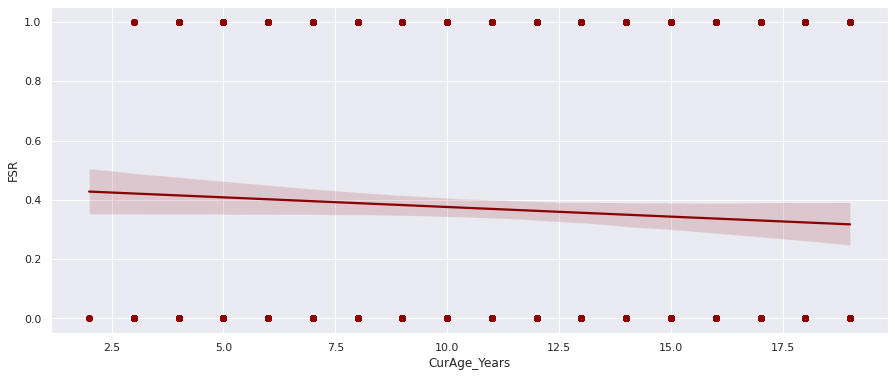

In [206]:
plt.figure(figsize = (15,6))
sns.set(style="darkgrid")
sns.regplot(x=df3.CurAge_Years, y=df3['FSR'], color='darkred')

<AxesSubplot:xlabel='SEXR', ylabel='CurAge_Years'>

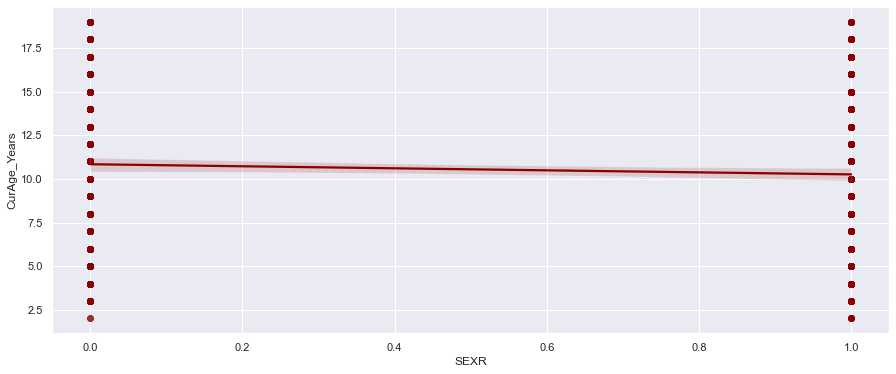

In [ ]:
plt.figure(figsize = (15,6))
sns.set(style="darkgrid")
sns.regplot(y = df3.CurAge_Years, x = df3['SEXR'], color='darkred')

Text(0.5, 1.0, 'HEATMAP OF PERCENTAGE CHANGE OVER THE YEARS (%)')

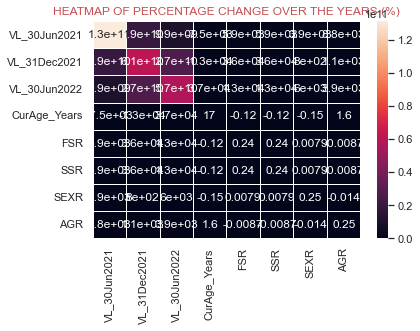

In [ ]:
sns.heatmap(df3.cov(),linewidths=1, annot=True)
plt.title('HEATMAP OF PERCENTAGE CHANGE OVER THE YEARS (%)', color='r')

<AxesSubplot:>

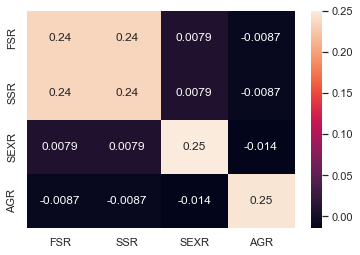

In [ ]:
sns.heatmap(df3[['FSR', 'SSR', 'SEXR', 'AGR']].cov(),annot=True)

<AxesSubplot:>

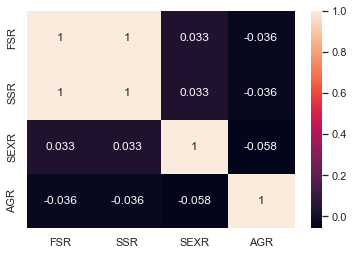

In [ ]:
sns.heatmap(df3[['FSR', 'SSR', 'SEXR', 'AGR']].corr(),annot=True)

<AxesSubplot:xlabel='CurAge_Years', ylabel='SSR'>

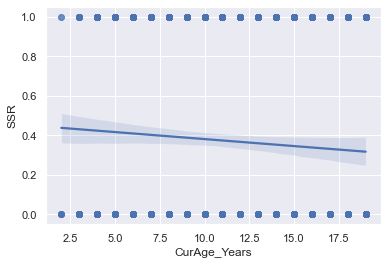

In [ ]:
sns.regplot(data = df2, y = 'SSR', x = 'CurAge_Years')


<AxesSubplot:xlabel='CurAge_Years', ylabel='SEXR'>

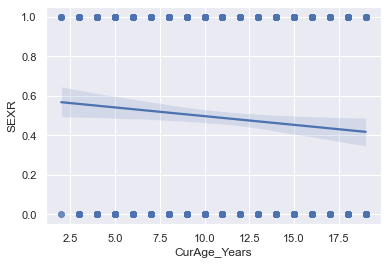

In [ ]:
sns.regplot(data = df2, y = 'SEXR', x = 'CurAge_Years')

<AxesSubplot:xlabel='VL_30Jun2022', ylabel='FSR'>

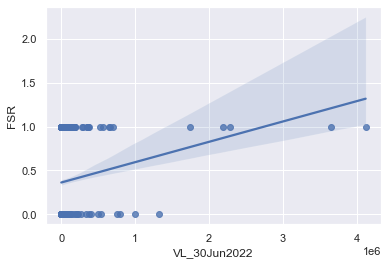

In [ ]:
sns.regplot(data = df2, y = 'FSR', x = 'VL_30Jun2022')

<AxesSubplot:xlabel='VL_30Jun2022', ylabel='SSR'>

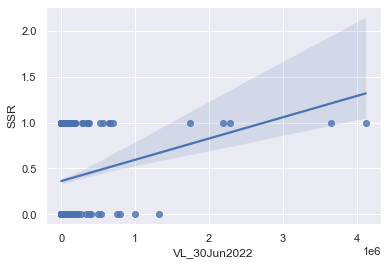

In [ ]:
sns.regplot(data = df2, y = 'SSR', x = 'VL_30Jun2022')

<AxesSubplot:xlabel='VL_30Jun2021', ylabel='AGR'>

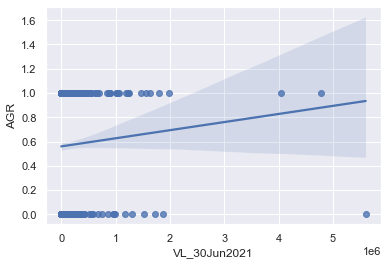

In [ ]:
sns.regplot(data = df2, y = 'AGR', x = 'VL_30Jun2021')

In [ ]:
df2

Sex ARTStartDate RegimenAtARTStart FirstTLD_Pickup DateofFirstTLD_Pickup  \
4      M   2014-03-27       AZT-3TC-NVP     ABC-3TC-DTG            2020-07-14   
5      F   2013-04-30       AZT-3TC-NVP     ABC-3TC-DTG            2021-12-09   
6      M   2019-10-03     ABC-3TC-LPV/r     ABC-3TC-DTG            2022-03-25   
7      F   2020-07-15     ABC-3TC-LPV/r     ABC-3TC-DTG            2021-10-26   
12     M   2017-09-28       AZT-3TC-NVP     ABC-3TC-DTG            2020-02-20   
...   ..          ...               ...             ...                   ...   
6177   M   2017-08-23       TDF-3TC-EFV     TDF-3TC-DTG            2020-03-10   
6178   M   2018-11-02       AZT-3TC-NVP     ABC-3TC-DTG            2021-11-24   
6183   F   2019-08-15     AZT-3TC-LPV/r     ABC-3TC-DTG            2022-04-25   
6188   M   2012-10-30       AZT-3TC-NVP     ABC-3TC-DTG            2020-05-28   
6206   M   2021-02-17     ABC-3TC-LPV/r     ABC-3TC-DTG            2021-10-19   

      CurAge_Years  VL_30Jun2021  VL_31Dec2021  VL_30Jun2022  FIRST_STATUS  \
4                9       25786.0       25786.0        1631.0  UNSUPPRESSED   
5               10       62001.0           0.0           0.0    SUPPRESSED   
6                4       24286.0       24286.0           0.0  UNSUPPRESSED   
7               11        1909.0           0.0          19.0    SUPPRESSED   
12               6     1294596.0         158.0        7877.0    SUPPRESSED   
...            ...           ...           ...           ...           ...   
6177            15      439976.0      439976.0           0.0  UNSUPPRESSED   
6178             7        1329.0           0.0          19.0    SUPPRESSED   
6183            11       35582.0           NaN        1746.0    SUPPRESSED   
6188            12        4846.0         198.0       50200.0    SUPPRESSED   
6206             9      168499.0      168499.0           0.0  UNSUPPRESSED   

     SECOND_STATUS  QStart    QTLD AgeGroup  DateDiff  FSR  SSR  SEXR  AGR  
4     UNSUPPRESSED  2014Q1  2020Q3  UNDER 9 2301 days    1    1     1    0  
5       SUPPRESSED  2013Q2  2021Q4   OVER 9 3145 days    0    0     0    1  
6       SUPPRESSED  2019Q4  2022Q1  UNDER 9  904 days    1    1     1    0  
7       SUPPRESSED  2020Q3  2021Q4   OVER 9  468 days    0    0     0    1  
12    UNSUPPRESSED  2017Q3  2020Q1  UNDER 9  875 days    0    0     1    0  
...            ...     ...     ...      ...       ...  ...  ...   ...  ...  
6177    SUPPRESSED  2017Q3  2020Q1   OVER 9  930 days    1    1     1    1  
6178    SUPPRESSED  2018Q4  2021Q4  UNDER 9 1118 days    0    0     1    0  
6183  UNSUPPRESSED  2019Q3  2022Q2   OVER 9  984 days    0    0     0    1  
6188  UNSUPPRESSED  2012Q4  2020Q2   OVER 9 2767 days    0    0     1    1  
6206    SUPPRESSED  2021Q1  2021Q4  UNDER 9  244 days    1    1     1    0  

[904 rows x 19 columns]

<AxesSubplot:xlabel='VL_30Jun2021', ylabel='FSR'>

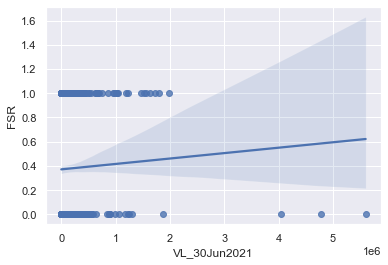

In [ ]:
sns.regplot(data = df2, y = 'FSR', x = 'VL_30Jun2021')

<AxesSubplot:xlabel='VL_30Jun2022', ylabel='FSR'>

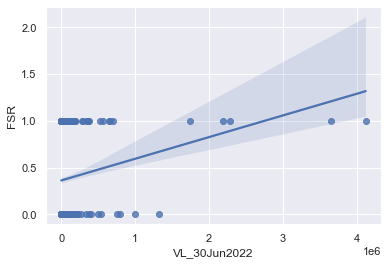

In [ ]:
sns.regplot(data = df2, y = 'FSR', x = 'VL_30Jun2022')

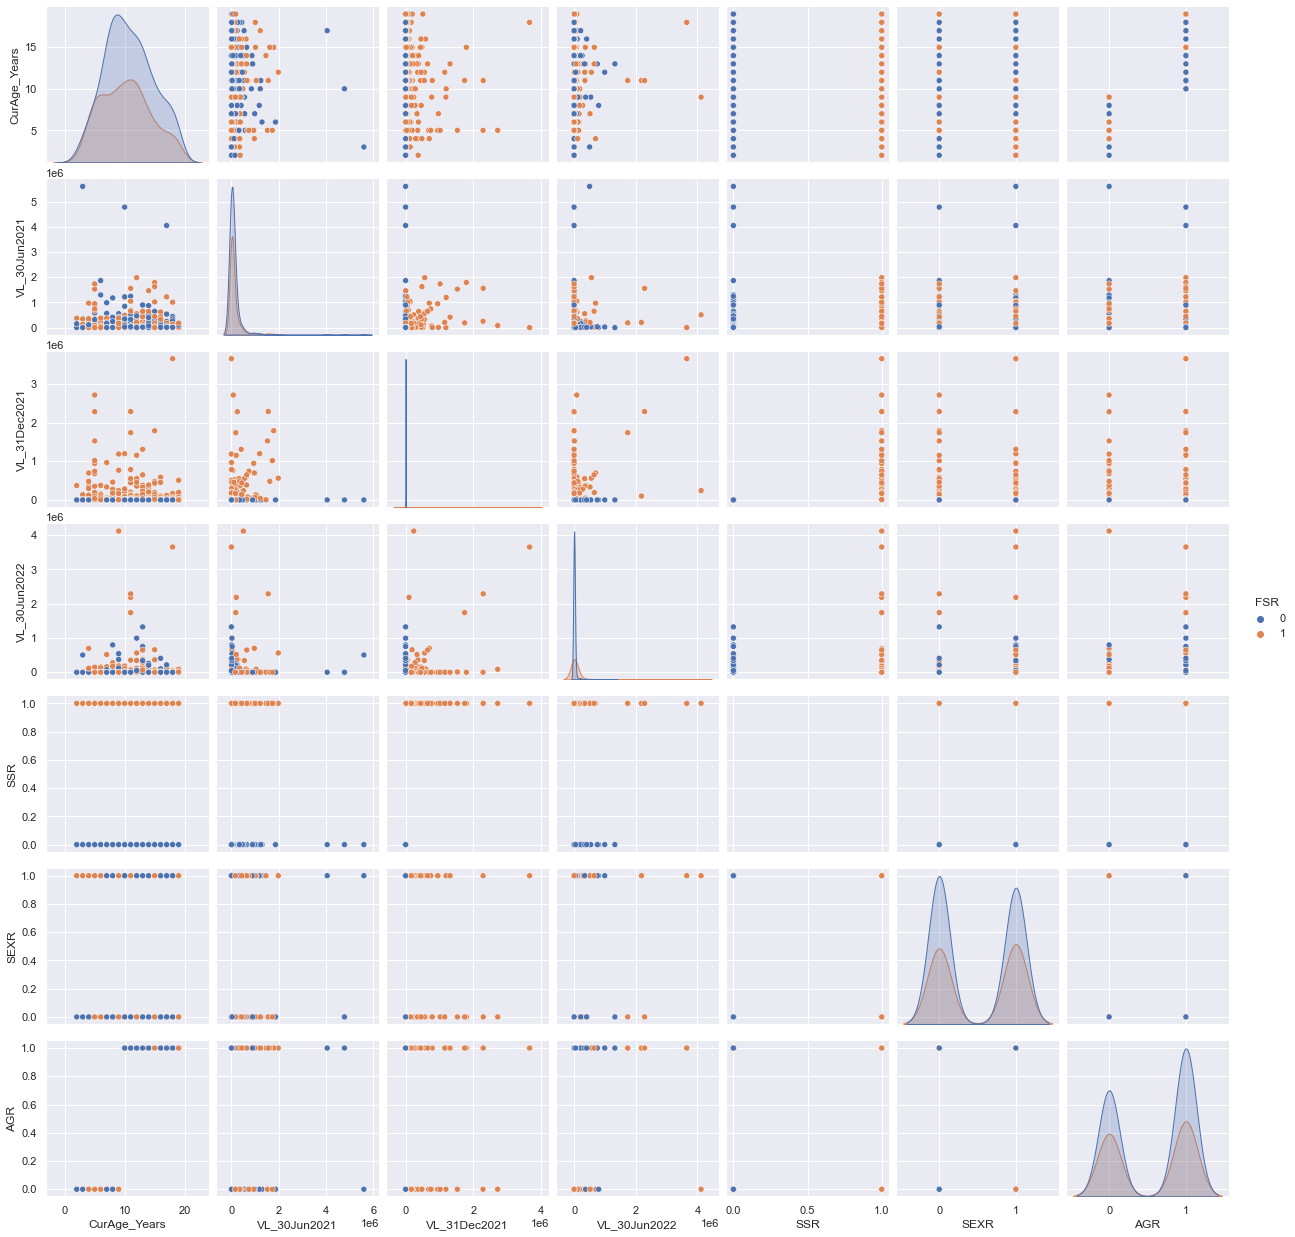

In [ ]:
sns.pairplot(df2, hue="FSR")

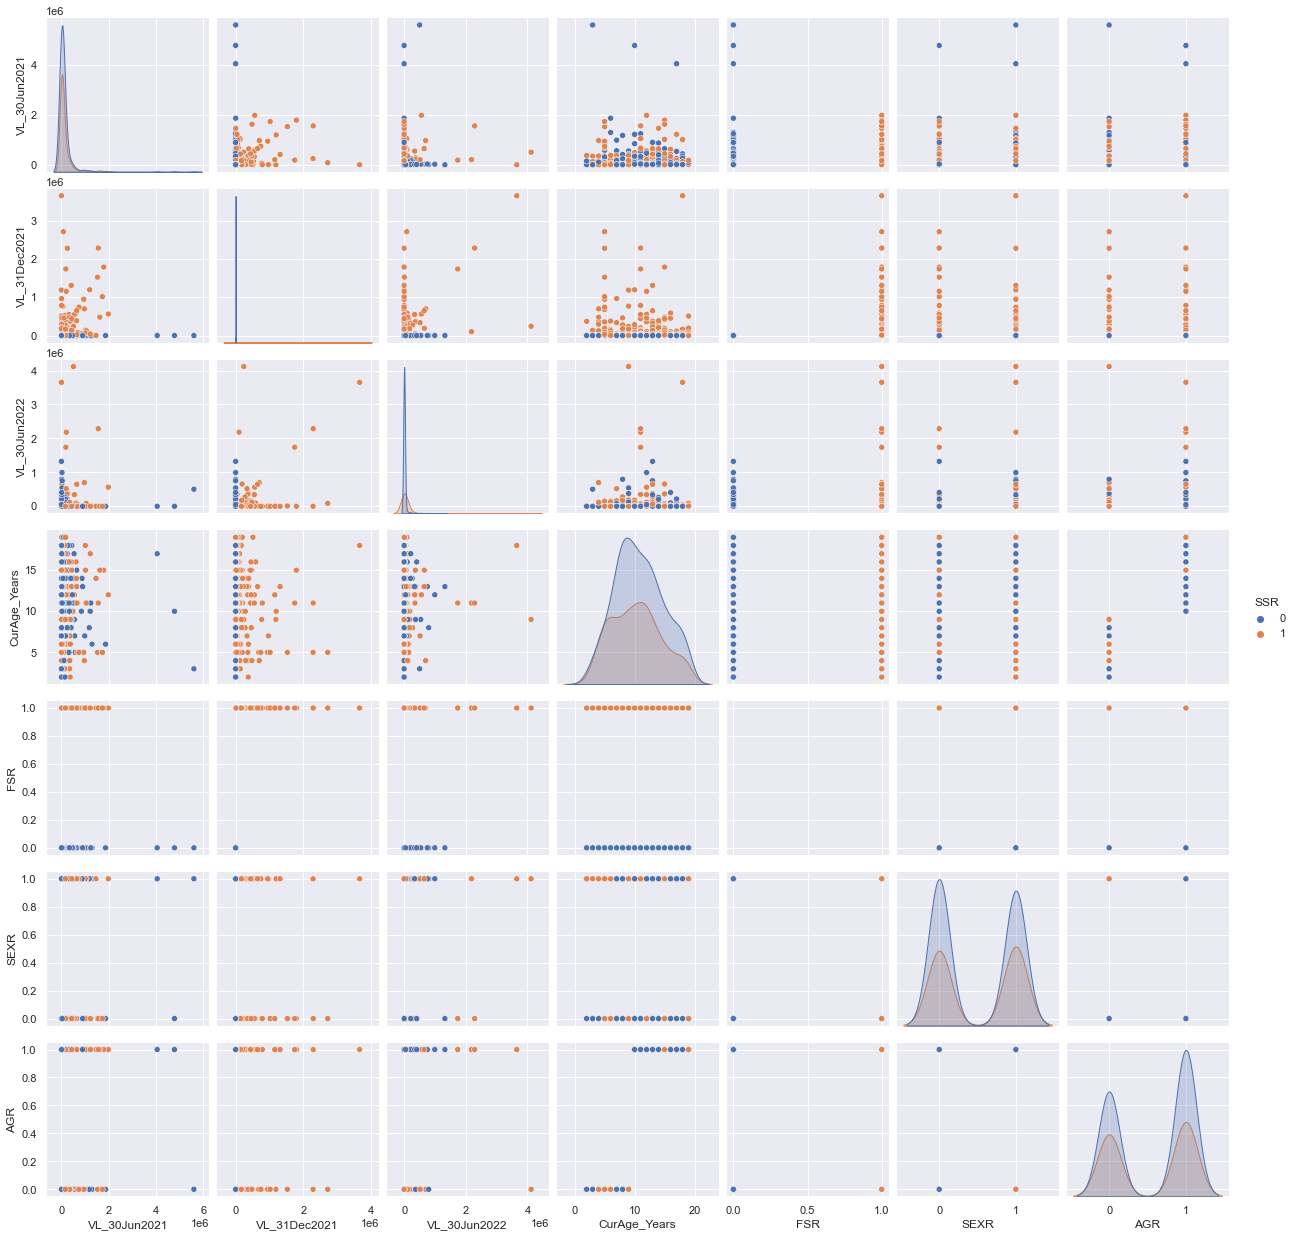

In [ ]:
sns.pairplot(df3, hue="SSR")

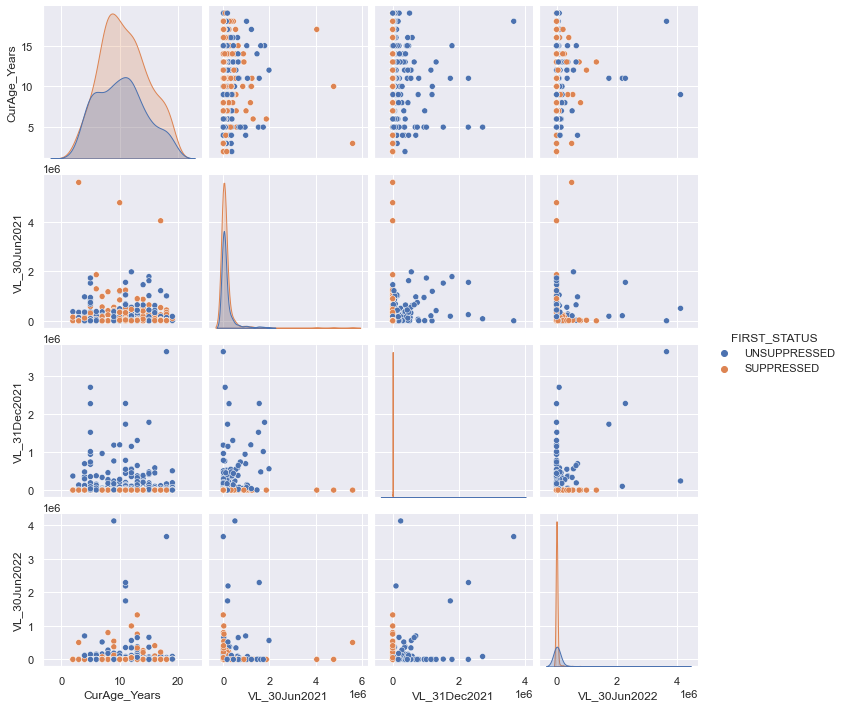

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'FIRST_STATUS')

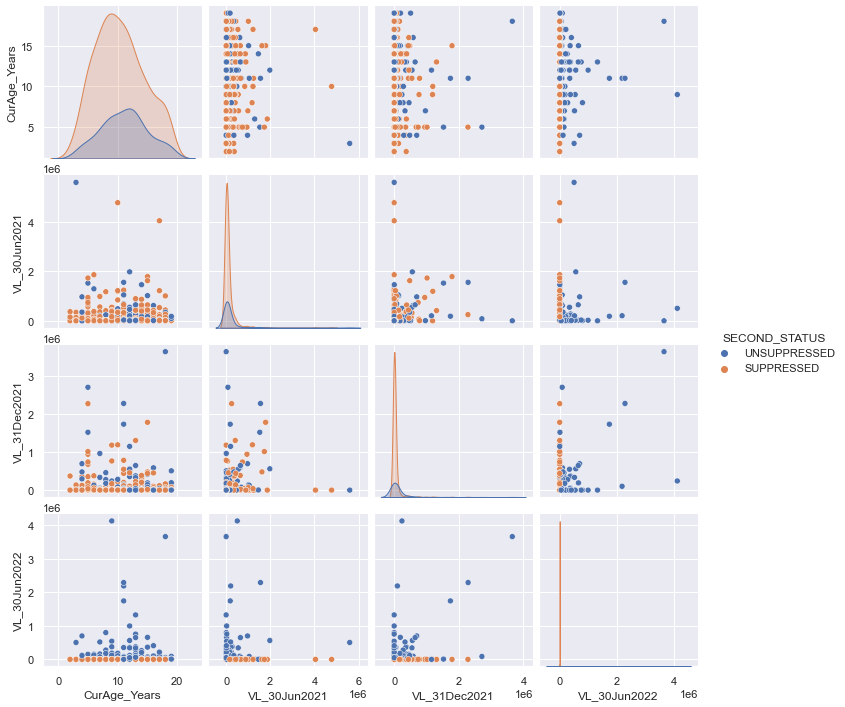

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'SECOND_STATUS')

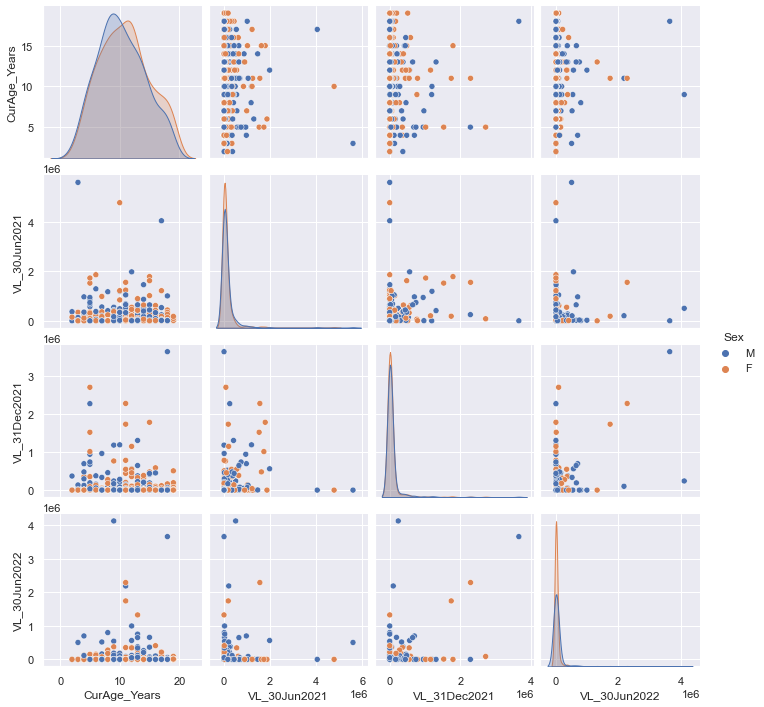

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'Sex')

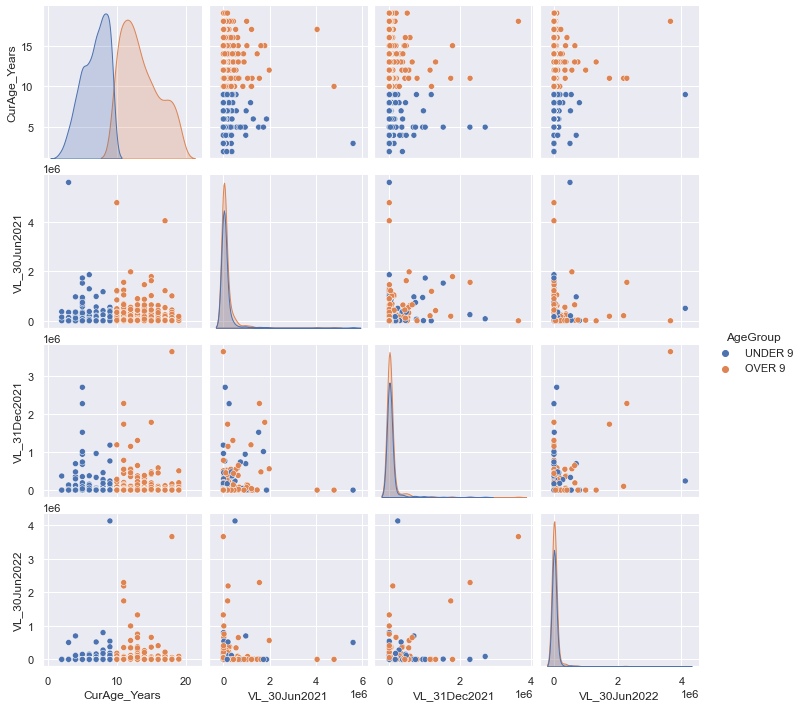

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'AgeGroup')

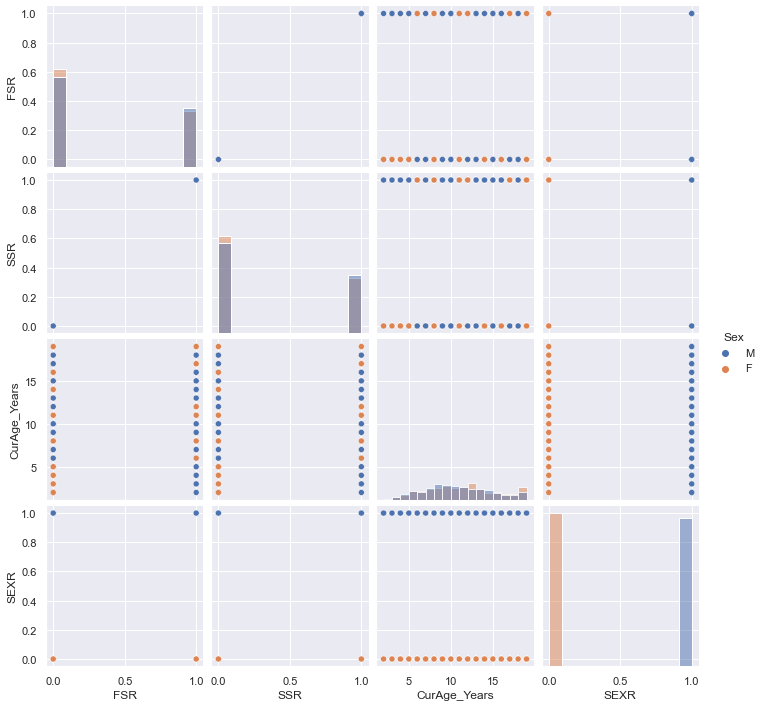

In [ ]:
sns.pairplot(df2, vars=['FSR', 'SSR', 'CurAge_Years', 'SEXR'], hue = 'Sex', diag_kind='hist')

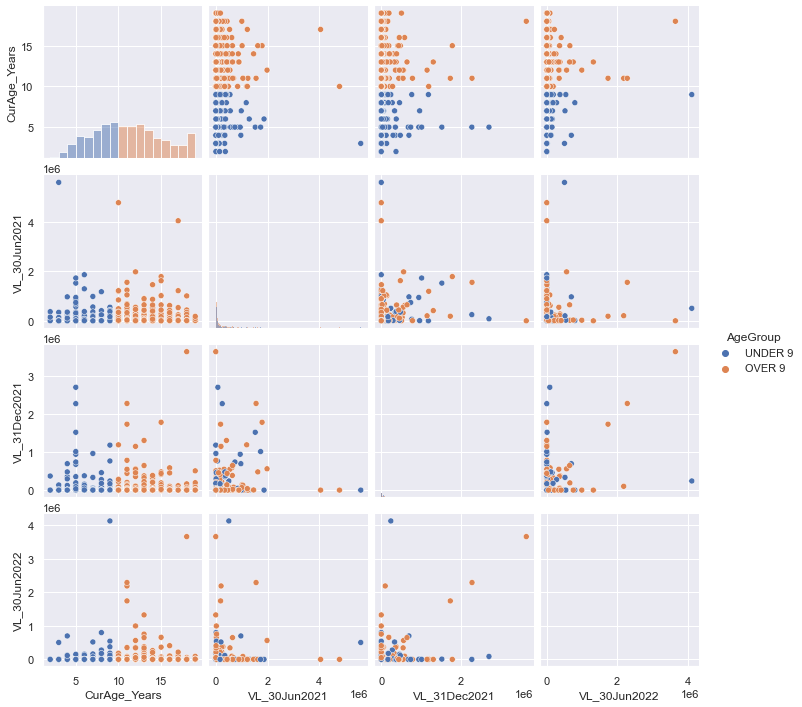

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'AgeGroup', diag_kind='hist')

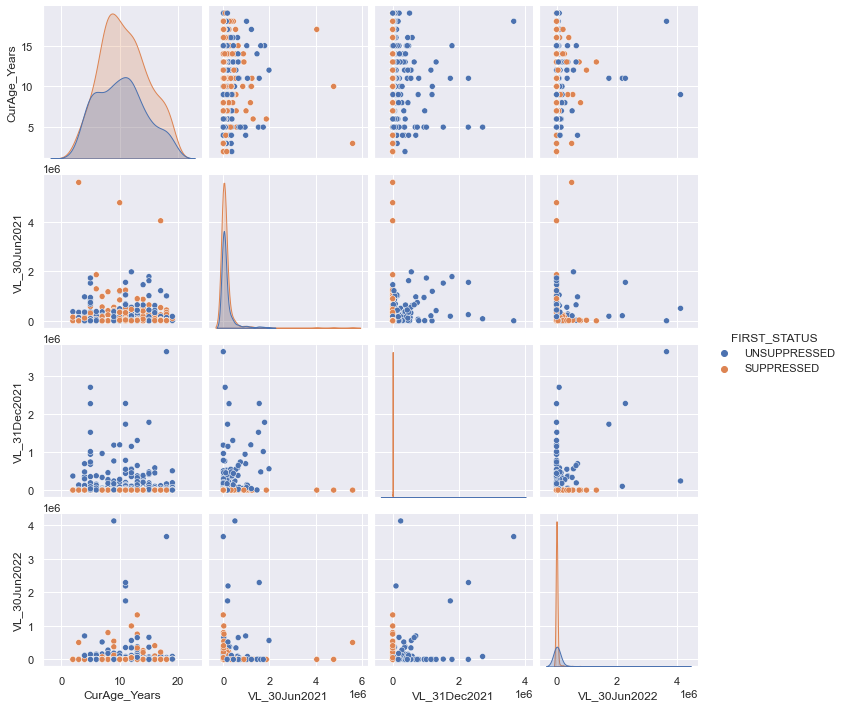

In [ ]:
sns.pairplot(df2, vars=['CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022'], hue = 'FIRST_STATUS')

In [ ]:
df2.columns

Index(['Sex', 'ARTStartDate', 'RegimenAtARTStart', 'FirstTLD_Pickup',
       'DateofFirstTLD_Pickup', 'CurAge_Years', 'VL_30Jun2021', 'VL_31Dec2021',
       'VL_30Jun2022', 'FIRST_STATUS', 'SECOND_STATUS', 'QStart', 'QTLD',
       'AgeGroup', 'DateDiff', 'FSR', 'SSR', 'SEXR', 'AGR'],
      dtype='object')

In [ ]:
df2[df2.FIRST_STATUS=='SUPPRESSED'][['Sex','AgeGroup']].agg('count')/len(df2)*100

Sex         62.278761
AgeGroup    62.278761
dtype: float64

<AxesSubplot:xlabel='DateofFirstTLD_Pickup', ylabel='Count'>

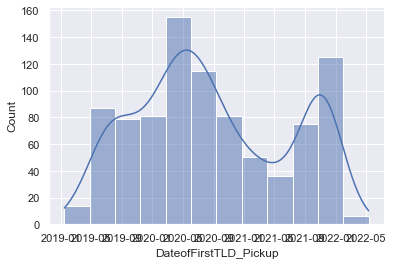

In [ ]:
sns.histplot(df2.DateofFirstTLD_Pickup,kde=True)

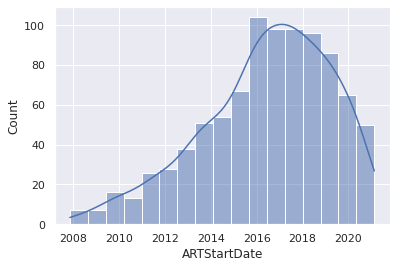

In [207]:
sns.histplot(df2.ARTStartDate,kde=True)

In [ ]:
df3.corr()

VL_30Jun2021  VL_31Dec2021  VL_30Jun2022  CurAge_Years  \
VL_30Jun2021      1.000000      0.213966      0.113755     -0.005104   
VL_31Dec2021      0.213966      1.000000      0.450820     -0.013260   
VL_30Jun2022      0.113755      0.450820      1.000000      0.037926   
CurAge_Years     -0.005104     -0.013260      0.037926      1.000000   
FSR               0.033456      0.297408      0.114010     -0.059407   
SSR               0.033456      0.297408      0.114010     -0.059407   
SEXR              0.021400      0.006446      0.050012     -0.071685   
AGR               0.048886      0.008634      0.033199      0.812099   

                   FSR       SSR      SEXR       AGR  
VL_30Jun2021  0.033456  0.033456  0.021400  0.048886  
VL_31Dec2021  0.297408  0.297408  0.006446  0.008634  
VL_30Jun2022  0.114010  0.114010  0.050012  0.033199  
CurAge_Years -0.059407 -0.059407 -0.071685  0.812099  
FSR           1.000000  1.000000  0.032597 -0.036345  
SSR           1.000000  1.000000  0.032597 -0.036345  
SEXR          0.032597  0.032597  1.000000 -0.058167  
AGR          -0.036345 -0.036345 -0.058167  1.000000

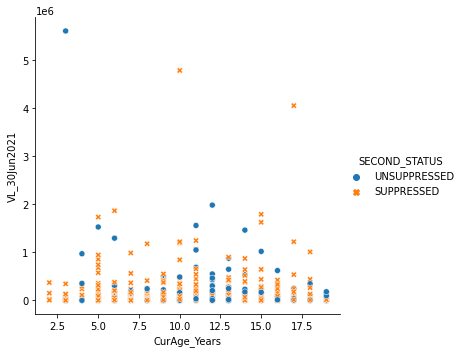

In [ ]:
sns.relplot(
    data=df2,
    x="CurAge_Years", y='VL_30Jun2021',
    hue="SECOND_STATUS", style="SECOND_STATUS"
)

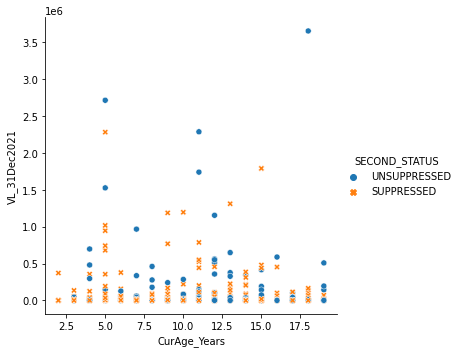

In [ ]:
sns.relplot(
    data=df2,
    x="CurAge_Years", y='VL_31Dec2021',
    hue="SECOND_STATUS", style="SECOND_STATUS"
)

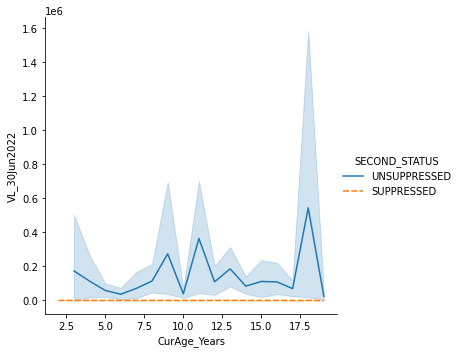

In [ ]:
sns.relplot(
    data=df2,
    x="CurAge_Years", y='VL_30Jun2022',
    hue="SECOND_STATUS", style="SECOND_STATUS",kind="line",
    facet_kws=dict(sharex=False))

In [ ]:
sns.relplot(
    data=df2,
    x="CurAge_Years", y='VL_30Jun2022',
    hue="SECOND_STATUS", style="SECOND_STATUS",kind="line",
    facet_kws=dict(sharex=False))

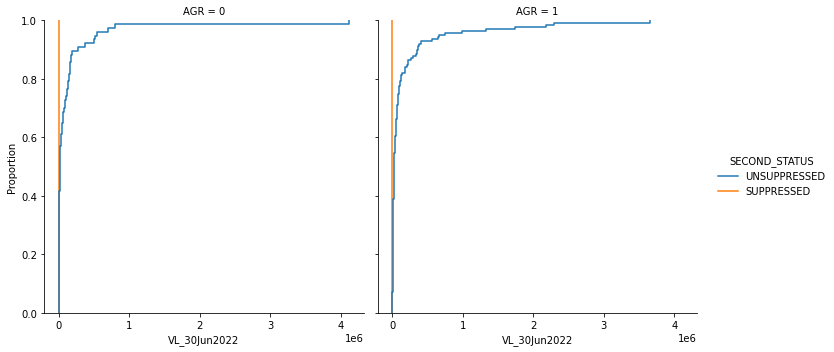

In [ ]:
sns.displot(data=df2, kind="ecdf", x="VL_30Jun2022", col="AGR", hue="SECOND_STATUS")


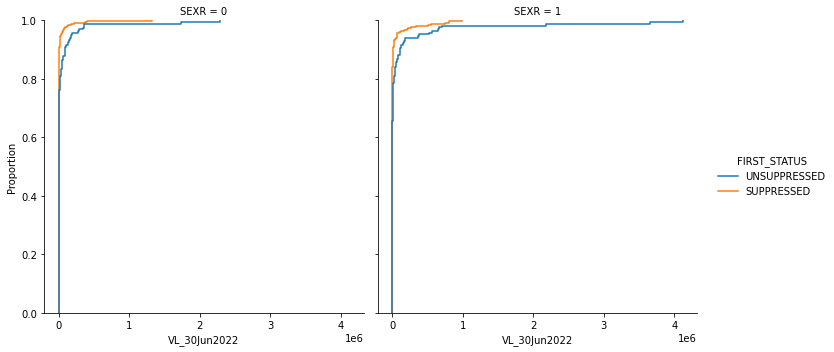

In [ ]:
sns.displot(data=df2, kind="ecdf", x="VL_30Jun2022", col="SEXR", hue="FIRST_STATUS")


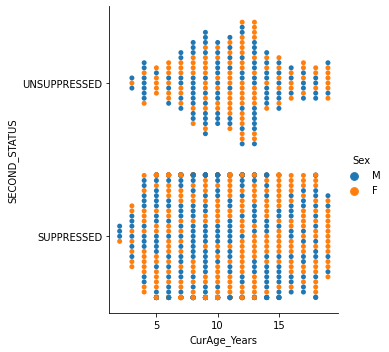

In [ ]:
sns.catplot(data=df2, kind="swarm", x="CurAge_Years", y="SECOND_STATUS", hue="Sex")



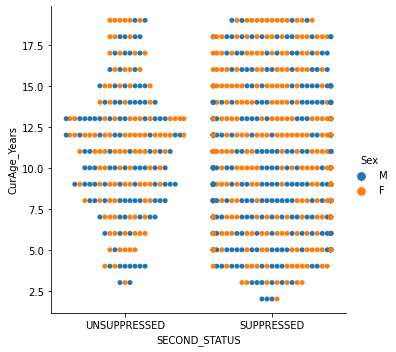

In [ ]:
sns.catplot(data=df2, kind="swarm", y="CurAge_Years", x="SECOND_STATUS", hue="Sex")



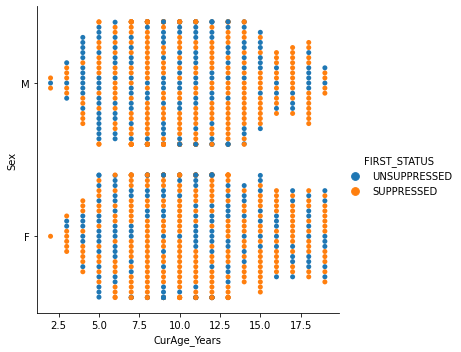

In [ ]:
sns.catplot(data=df2, kind="swarm", x="CurAge_Years", y="Sex", hue="FIRST_STATUS")



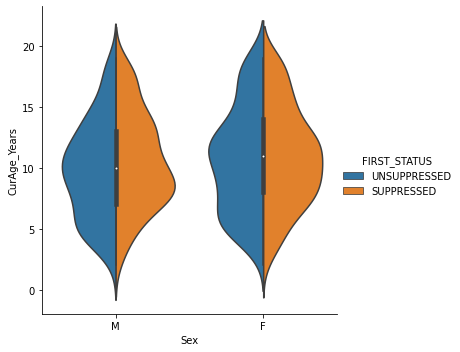

In [ ]:
sns.catplot(data=df2, kind="violin", y="CurAge_Years", x="Sex", hue="FIRST_STATUS", split=True)


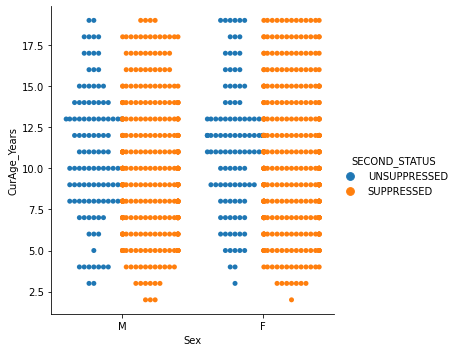

In [ ]:
sns.catplot(data=df2, kind="swarm",y="CurAge_Years", x="Sex", hue="SECOND_STATUS", split=True)


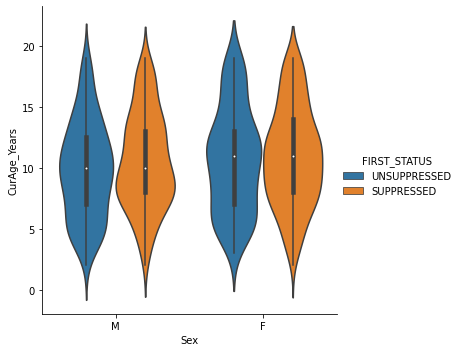

In [ ]:
sns.catplot(data=df2, kind="violin", y="CurAge_Years", x="Sex", hue="FIRST_STATUS")


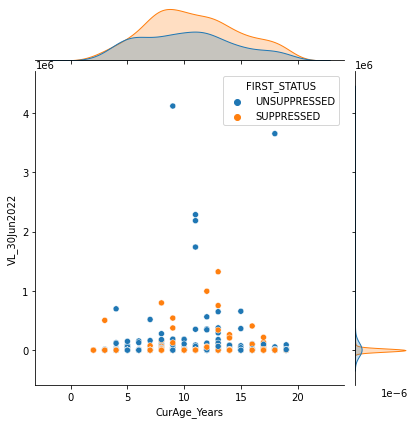

In [ ]:
sns.jointplot(data=df2, x="CurAge_Years", y="VL_30Jun2022", hue="FIRST_STATUS")


<AxesSubplot:xlabel='CurAge_Years', ylabel='Density'>

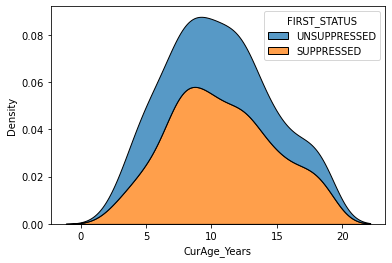

In [ ]:
sns.kdeplot(data=df2, x="CurAge_Years", hue="FIRST_STATUS", multiple="stack")


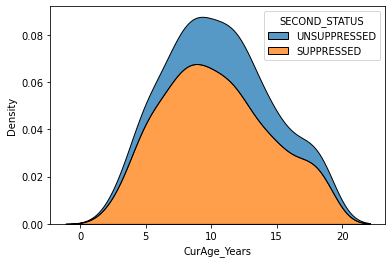

In [105]:
sns.kdeplot(data=df2, x="CurAge_Years", hue="SECOND_STATUS", multiple="stack")


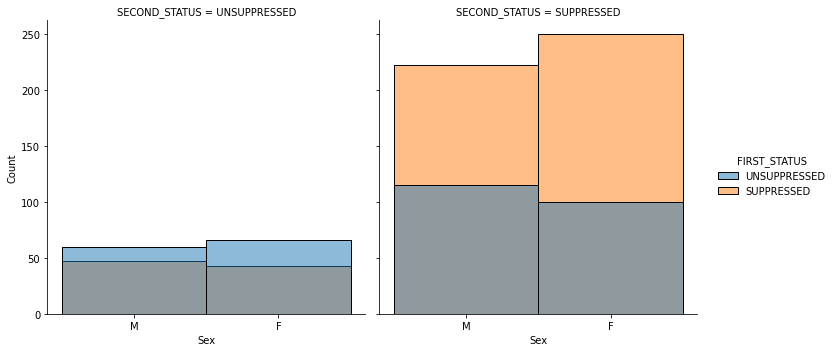

In [ ]:
sns.displot(data=df2, x="Sex", hue="FIRST_STATUS", col="SECOND_STATUS")


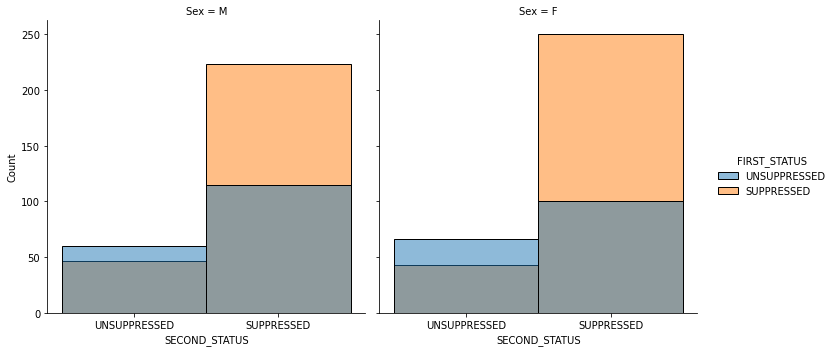

In [ ]:
sns.displot(data=df2, col="Sex", hue="FIRST_STATUS", x="SECOND_STATUS")


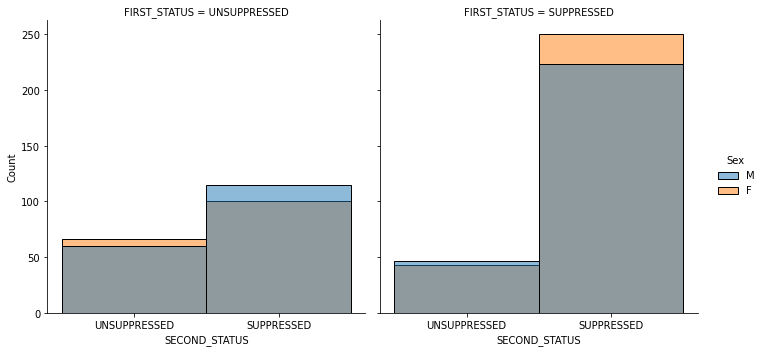

In [55]:
sns.displot(data=df2, hue="Sex", col="FIRST_STATUS", x="SECOND_STATUS")

In [90]:
df3

SEXR  AGR  CurAge_Years  FSR
4        1    0             9    1
5        0    1            10    0
6        1    0             4    1
7        0    1            11    0
12       1    0             6    0
...    ...  ...           ...  ...
6177     1    1            15    1
6178     1    0             7    0
6183     0    1            11    0
6188     1    1            12    0
6206     1    0             9    1

[904 rows x 4 columns]

In [132]:
import statsmodels.api as sm

#define response variable
y = df3['FSR']

#define predictor variables
x = df3[['AGR', 'SEXR', 'CurAge_Years' ]]

#add constant to predictor variables
x = sm.add_constant(x)

#fitting the regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FSR   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.432
Date:                Sun, 02 Oct 2022   Prob (F-statistic):              0.232
Time:                        23:45:07   Log-Likelihood:                -625.85
No. Observations:                 904   AIC:                             1260.
Df Residuals:                     900   BIC:                             1279.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4522      0.055      8.149   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [95]:
#define response variable
y = df4['SSR']

#define predictor variables
x = df4[['AGR', 'SEXR', 'CurAge_Years' ]]

#add constant to predictor variables
x = sm.add_constant(x)

#fitting the regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SSR   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.432
Date:                Sun, 02 Oct 2022   Prob (F-statistic):              0.232
Time:                        22:57:01   Log-Likelihood:                -625.85
No. Observations:                 904   AIC:                             1260.
Df Residuals:                     900   BIC:                             1279.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4522      0.055      8.149   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


R-squared: 0.005. This is known as the coefficient of determination. It is the proportion of the variance in the response variable that can be explained by the predictor variables. In this example, 5% of the variation in the First viral load can be explained by the Age, Sex, and age group


F-statistic: 1.43. This is the overall F-statistic for the regression model.

Prob (F-statistic): 0.232. This is the p-value associated with the overall F-statistic.  It tells us whether or not the regression model as a whole is statistically significant. In other words, it tells us if the predictor variables combined have a statistically significant association with the response variable. In this case the p-value is greater than 0.05, which indicates that the predictor variables  'Age', 'Sex', and 'age group' combined does not have a statistically significant association with the first viral load.

coef: The coefficients for each predictor variable tell us the average expected change in the response variable, assuming the other predictor variable remains constant. For example, the younger the age group, the more it is to achieve viral suppression assuming all other factors remain constant, so also, suppression is more likely in female than in males..

P>|t|. The individual p-values tell us whether or not each predictor variable is statistically significant. We can see that all our variables are not statistically significant. Since they are not statistically significant.

In [121]:
# from statsmodels.formula.api import ols

# #fit simple linear regression model
# model = ols('FSR ~ AGR', data=df2).fit()

# #view model summary
# print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FSR   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.193
Date:                Sun, 02 Oct 2022   Prob (F-statistic):              0.275
Time:                        18:37:01   Log-Likelihood:                -627.40
No. Observations:                 904   AIC:                             1259.
Df Residuals:                     902   BIC:                             1268.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3974      0.025     16.186      0.0

In [144]:
# xs = ('AGR', 'SEXR', 'CurAge_Years')
# for x in xs:
#     model = ols('SSR~ xs', data = df4).fit() #Oridnary least square method
#     result_anova = sm.stats.anova_lm(model) # ANOVA Test
#     print(result_anova)

    
#define response variable
y = df3['FSR']

#define predictor variables
x = df3[['AGR', 'SEXR', 'CurAge_Years' ]]

#add constant to predictor variables
x = sm.add_constant(x)

model = ols(x, y).fit()

result_anova = sm.stats.anova_lm(model) # ANOVA Test
print(result_anova)
   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


NameError: ignored

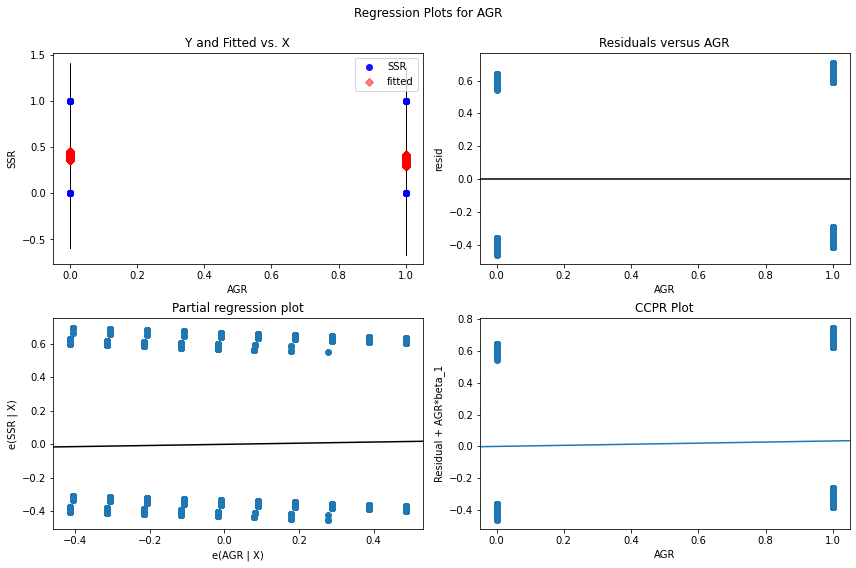

In [96]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'AGR', fig=fig)


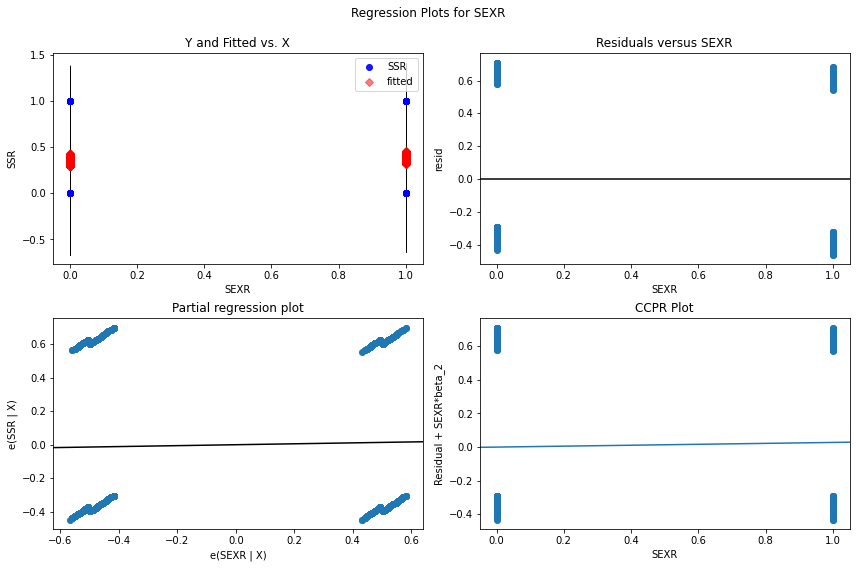

In [97]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'SEXR', fig=fig)


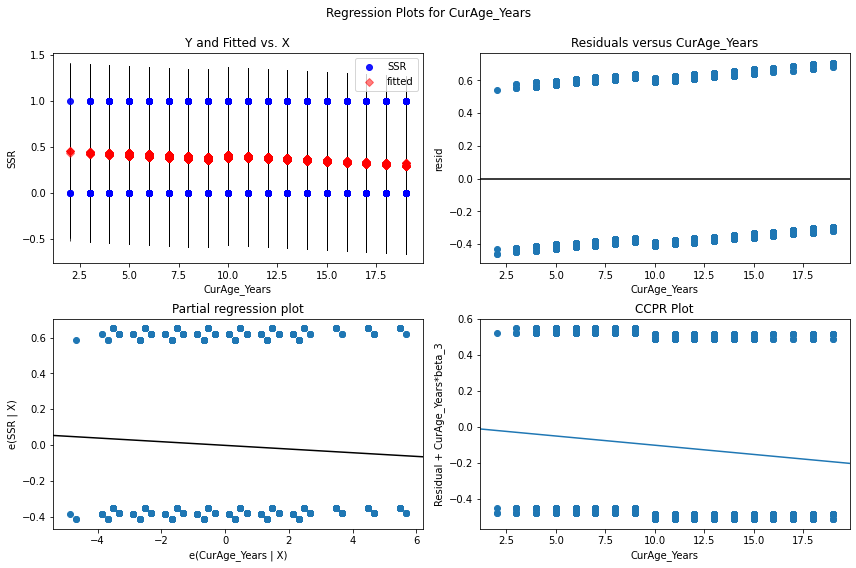

In [98]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'CurAge_Years', fig=fig)


In [110]:
x2 = df3.iloc[:, :-1].values  #extracts features from the dataset
y2 = df3.iloc[:, -1].values  #extracts the labels from the dataset


In [123]:
from sklearn.linear_model import LinearRegression # import the Linear Regression model
lin_reg = LinearRegression() # creat model object
lin_reg.fit(x2, y2) # fits the model to the training data

LinearRegression()

In [125]:
lin_reg.predict([[1,0,8]])

array([0.39794325])

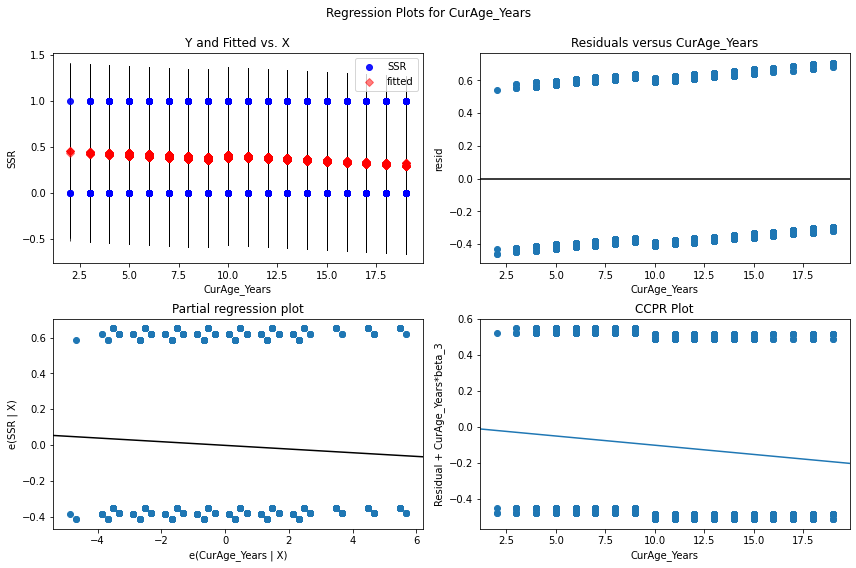

In [115]:
#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'CurAge_Years', fig=fig)



In [108]:
from sklearn.preprocessing import PolynomialFeatures # importing a class for Polynomial Regression
poly_regr = PolynomialFeatures(degree = 4) # our polynomial model is of order
X_poly = poly_regr.fit_transform(x) # transforms the features to the polynomial form
lin_reg_2 = LinearRegression() # creates a linear regression object
lin_reg_2.fit(X_poly, y)

LinearRegression()

In [130]:
lin_reg_2.predict(X_poly.fit_transform([[1,1,7]]))

AttributeError: ignored